# PCOS Detection

PCOS (Polycystic Ovary Syndrome) is the complication with females during reproductive years. This might be visible as no period or lengthy periods.

1. The fluid filled cysts develop outside the ovaries.
2. Follicles won't release eggs due to the cysts.

The project has taken the dataset collected from 10 hospitals in Kerala, India through Kaggle account of Prasoon Kottarathil, Machine Learning Engineer at TZ, Kerala, India.

In [1]:
# check versions of other libraries
import numpy, pandas, sklearn, matplotlib, seaborn, tpot

print(f"Numpy {numpy.__version__}")
print(f"Pandas {pandas.__version__}")
print(f"Sklearn {sklearn.__version__}")
print(f"Matplotlib {matplotlib.__version__}")
print(f"Seaborn {seaborn.__version__}")
print(f"Tpot {tpot.__version__}")

Numpy 1.26.4
Pandas 2.1.3
Sklearn 1.4.1.post1
Matplotlib 3.8.2
Seaborn 0.13.0
Tpot 0.12.2


## Importing Necessary Libraries and Dataset

In [2]:
# basic libraries
import numpy as np
import pandas as pd

In [3]:
# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# warnings removal
import warnings
warnings.filterwarnings('ignore')

In [5]:
# importing data from csv file
df = pd.read_csv('dataset.csv')

# **Step 1: Data Collection**

The dataset was collected from Kaggle website, an online platform for Artificial Intelligence, Machine Learning and Data Science practitioners and experts.

# **Step 2: Data Preprocessing**

After gathering the important libraries and dataset,
* feature names were changed after finding feature names had unwanted spaces
* missing values were dealt by finding rows and columns with null values
* exploratory data analysis was performed twice before and after data conversion
* outliers were dealt using box plots and distribution curves

## 1. Changing Feature Names

1. few feature names like "I   beta-HCG(mIU/mL)" have unwanted spaces that were removed



In [ ]:
# checking features
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
# removing non-required spaces in column headers
columns = [' '.join(col.strip().split()) for col in df.columns]

print(columns)

['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Unnamed: 44']


In [ ]:
# applying headers from columns list
df.columns = columns

print(df.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


## 2. Dealing with Missing Values

1. "Unwanted: 44" had only 2 non-null values that was removed
2. some rows had all features with null values because of which those rows were removed
3. "Marraige Status (Yrs)" and "Fast Food (Y/N)" both had 1 missing values that were resolved by filling with mean and mode respectively



In [ ]:
# getting non-null value counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    float64
 1   Patient File No.       541 non-null    float64
 2   PCOS (Y/N)             541 non-null    float64
 3   Age (yrs)              541 non-null    float64
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    float64
 8   Pulse rate(bpm)        541 non-null    float64
 9   RR (breaths/min)       541 non-null    float64
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    float64
 12  Cycle length(days)     541 non-null    float64
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    float64
 15  No. of

In [ ]:
# deleting 'Unnamed: 44' column
df.drop('Unnamed: 44', axis=1, inplace=True)

In [ ]:
# checking null values
df.isna().sum()

Sl. No                   458
Patient File No.         458
PCOS (Y/N)               458
Age (yrs)                458
Weight (Kg)              458
Height(Cm)               458
BMI                      458
Blood Group              458
Pulse rate(bpm)          458
RR (breaths/min)         458
Hb(g/dl)                 458
Cycle(R/I)               458
Cycle length(days)       458
Marraige Status (Yrs)    459
Pregnant(Y/N)            458
No. of aborptions        458
I beta-HCG(mIU/mL)       458
II beta-HCG(mIU/mL)      458
FSH(mIU/mL)              458
LH(mIU/mL)               458
FSH/LH                   458
Hip(inch)                458
Waist(inch)              458
Waist:Hip Ratio          458
TSH (mIU/L)              458
AMH(ng/mL)               458
PRL(ng/mL)               458
Vit D3 (ng/mL)           458
PRG(ng/mL)               458
RBS(mg/dl)               458
Weight gain(Y/N)         458
hair growth(Y/N)         458
Skin darkening (Y/N)     458
Hair loss(Y/N)           458
Pimples(Y/N)  

In [ ]:
# checking top 10 rows
df.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,19.30,15.0,78.0,22.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,24.92,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,25.27,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,29.67,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,20.06,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0
5,6.0,6.0,0.0,36.0,74.1,165.0,27.22,15.0,78.0,28.0,...,0.0,0.0,0.0,110.0,70.0,9.0,6.0,16.0,20.0,8.0
6,7.0,7.0,0.0,34.0,64.0,156.0,26.30,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,6.0,6.0,15.0,16.0,6.8
7,8.0,8.0,0.0,33.0,58.5,159.0,23.14,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,80.0,7.0,6.0,15.0,18.0,7.1
8,9.0,9.0,0.0,32.0,40.0,158.0,16.02,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,5.0,7.0,17.0,17.0,4.2
9,10.0,10.0,0.0,36.0,52.0,150.0,23.11,15.0,80.0,20.0,...,0.0,0.0,0.0,110.0,80.0,1.0,1.0,14.0,17.0,2.5


In [ ]:

# checking bottom 10 rows
df.tail(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# removing null values rows
df.dropna(how='all', inplace=True)

In [ ]:
# checking null values
df.isna().sum()

Sl. No                   0
Patient File No.         0
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of aborptions        0
I beta-HCG(mIU/mL)       0
II beta-HCG(mIU/mL)      0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
B

In [ ]:
# checking value counts of Marraige Status (Yrs)
df['Marraige Status (Yrs)'].value_counts()

4.0     52
3.0     51
8.0     48
5.0     47
10.0    44
7.0     43
6.0     38
2.0     29
12.0    29
13.0    24
9.0     17
11.0    16
15.0    14
1.0     13
14.0    12
16.0     8
18.0     7
2.5      7
3.5      7
17.0     6
1.5      5
6.5      4
22.0     2
19.0     2
20.0     2
4.5      2
30.0     2
25.0     2
23.0     2
0.0      1
8.5      1
7.5      1
24.0     1
2.2      1
Name: Marraige Status (Yrs), dtype: int64

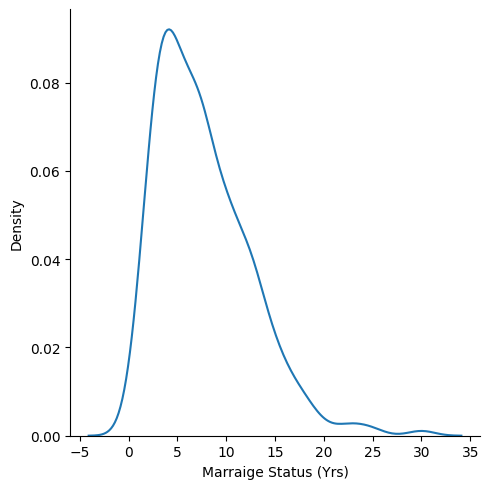

In [ ]:
# checking distribution of 'Marraige Status (Yrs)'
sns.displot(df['Marraige Status (Yrs)'], kind='kde')

In [ ]:
# filling missing value by median
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(), inplace=True)

In [ ]:
# checking value counts of Fast food (Y/N)
df['Fast food (Y/N)'].value_counts()

1.0    278
0.0    262
Name: Fast food (Y/N), dtype: int64

In [ ]:
# filling missing value by mode
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)

In [ ]:
# checking null values
df.isna().sum()

Sl. No                   0
Patient File No.         0
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
I beta-HCG(mIU/mL)       0
II beta-HCG(mIU/mL)      0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
B

## 3. Exploratory Data Analysis I

1. 541 rows and 44 columns are present on the dataset
2. out of 44 features, "II beta-HCG(mIU/mL)" and "AMH(ng/mL)" are only object data types. Other all are floats because pandas convert all numeric data in csv file to float
3. "PCOS (Y/N)" is output and rest except "SI. No" and "Patient File No." are inputs. These two features are unique and don't provide enough information in relationship to target variable

In [ ]:
# checking number of rows and columns
df.shape

(541, 44)

In [ ]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    float64
 1   Patient File No.       541 non-null    float64
 2   PCOS (Y/N)             541 non-null    float64
 3   Age (yrs)              541 non-null    float64
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    float64
 8   Pulse rate(bpm)        541 non-null    float64
 9   RR (breaths/min)       541 non-null    float64
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    float64
 12  Cycle length(days)     541 non-null    float64
 13  Marraige Status (Yrs)  541 non-null    float64
 14  Pregnant(Y/N)          541 non-null    float64
 15  No. of

In [ ]:
# description of each numeric dataset
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.319501,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.050901,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.420000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.710000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.240000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.640000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
# all columns except output and two serial numbers
unimp_cols = ['Sl. No', 'Patient File No.']
output_cols = ['PCOS (Y/N)']
imp_cols = [col for col in df.columns if col not in unimp_cols+output_cols]

## 4. Data Conversion

1. "1.99." was found to be invalid in "II beta-HCG(mIU/mL)"
2. "a" was found to be invalid in "AMH(ng/mL)"
3. invalid values were replaced and two features were converted to float values
4. integers in csv were also converted to 'int64'

In [ ]:
# finding unique values of "II beta-HCG(mIU/mL)" column
df["II beta-HCG(mIU/mL)"].unique()

array(['1.99', '494.08', '801.45', '100.51', '158.51', '1214.23', '91.55',
       '749.98', '218.65', '13', '610.63', '4490.18', '11.24', '15',
       '768.03', '12', '10', '20', '30.66', '1455', '497.41', '167',
       '9.83', '141.06', '528.5', '177.57', '65.03', '173.66', '161.49',
       '3.98', '756.61', '255.02', '273.7', '14.46', '145.89', '100.09',
       '110.17', '174.37', '75.51', '3893.06', '600.23', '3350.19',
       '97.63', '14.4', '2', '177.58', '12.17', '25.3', '100.2', '479.66',
       '1.9', '586.06', '1.99.', '2.8', '15.36', '54.08', '152.13',
       '3.05', '201.36', '16069.69', '57.08', '232.71', '23.5', '180.3',
       '102.3', '481.3', '563.8', '4.32', '230.5', '155.3', '3.888',
       '523.6', '1.65', '3.83', '569.1', '236.5', '896.6', '2.58',
       '569.3', '108.66', '3.99', '121.8', '122.58', '355.28', '122.3',
       '596.2', '588.7', '147.6', '12.37', '144.63', '475.04', '515.53',
       '99.69', '70.42', '342.91', '148.52', '272.78', '355.51', '150.91',
 

In [ ]:
# replacing "1.99." by "1.99"
df["II beta-HCG(mIU/mL)"] = df["II beta-HCG(mIU/mL)"].replace("1.99.", "1.99")

In [ ]:
# conversion to float
df["II beta-HCG(mIU/mL)"] = df["II beta-HCG(mIU/mL)"].astype(np.float64)

In [ ]:
# finding unique values of "AMH(ng/mL)" column
df["AMH(ng/mL)"].unique()

array(['2.07', '1.53', '6.63', '1.22', '2.26', '6.74', '3.05', '1.54',
       '1', '1.61', '4.47', '1.67', '7.94', '2.38', '0.88', '0.69',
       '3.78', '1.92', '2.85', '2.13', '4.13', '2.5', '1.89', '0.26',
       '3.84', '3.56', '1.56', '1.69', '2.34', '1.58', '2.36', '3.64',
       '2.78', '0.33', '2.35', '3.88', '3.55', '4.33', '3.66', '4.5',
       '3.2', '2.1', '6.55', '1.2', '2.33', '3.22', '2.333', '2.31',
       '4.2', '3.21', '2.14', '2.3', '4.6', '5.8', '5.2', '4.63', '1.01',
       '2.58', '0.35', '5.23', '3.68', '2.55', '4.91', '1.03', '6.56',
       '3.91', '5.42', '1.65', '2.06', '1.81', '3.81', '3.65', '8.98',
       '1.7', '3.18', '2.75', '0.86', '2.29', '2.19', '8.46', '4.59',
       '1.04', '4.27', '3.86', '1.42', '10.07', '0.98', '4.07', '3.9',
       '10', '16.9', '17', '21.9', '1.6', '3.3', '21', '12.7', '1.8',
       '3.6', '15', '5', '17.9', '19.8', '9.2', '2.4', '5.14', '0.3',
       '11.48', '19.3', '8.8', '19', '4.3', '1.4', '12.6', '4.8', '17.1',
       '11

In [ ]:
# replacing "a" by "None"
df["AMH(ng/mL)"] = df["AMH(ng/mL)"].replace("a", np.NaN)

In [ ]:
# conversion to float except null values
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype(np.float64)

In [ ]:
# replacement of null value by median
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(), inplace=True)

In [ ]:
# datatypes of all important features
df.drop(['Sl. No','Patient File No.'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    float64
 1   Age (yrs)              541 non-null    float64
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    float64
 6   Pulse rate(bpm)        541 non-null    float64
 7   RR (breaths/min)       541 non-null    float64
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    float64
 10  Cycle length(days)     541 non-null    float64
 11  Marraige Status (Yrs)  541 non-null    float64
 12  Pregnant(Y/N)          541 non-null    float64
 13  No. of aborptions      541 non-null    float64
 14  I beta-HCG(mIU/mL)     541 non-null    float64
 15  II bet

In [ ]:
# converting values that could be changed to int
for col in df.columns:
  if (df[col]%1 == 0.0).all():
    df[col] = df[col].astype(np.int64)

## 5. Exploratory Data Analysis II

1. important features' data types were identified

In [ ]:
# PCOS (Y/N) is binary data and doesn't come under imp cols
binary_data = ['Reg.Exercise(Y/N)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Hair loss(Y/N)', 'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Pregnant(Y/N)']
nominal_data = ['Blood Group']
numeric_discrete_data = ['Avg. F size (R) (mm)', 'Avg. F size (L) (mm)', 'Follicle No. (R)', 'Follicle No. (L)', 'BP _Diastolic (mmHg)', 'BP _Systolic (mmHg)', 'RBS(mg/dl)', 'Hip(inch)', 'No. of aborptions', 'Marraige Status (Yrs)', 'Cycle length(days)', 'Cycle(R/I)', 'RR (breaths/min)', 'Pulse rate(bpm)', 'Age (yrs)']
numeric_continuous_data = ['Endometrium (mm)', 'PRG(ng/mL)', 'Vit D3 (ng/mL)', 'PRL(ng/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'Waist:Hip Ratio', 'FSH/LH', 'LH(mIU/mL)', 'FSH(mIU/mL)', 'II beta-HCG(mIU/mL)', 'I beta-HCG(mIU/mL)', 'Hb(g/dl)', 'BMI', 'Height(Cm)', 'Weight (Kg)']

In [ ]:
# different data types
print("Binary data types:")
print(binary_data)
print("===========================")
print("Nominal data types:")
print(nominal_data)
print("===========================")
print("Numeric discrete data types:")
print(numeric_discrete_data)
print("===========================")
print("Numeric continuous data types:")
print(numeric_continuous_data)
print("===========================")

Binary data types:
['Reg.Exercise(Y/N)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'Hair loss(Y/N)', 'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Pregnant(Y/N)']
Nominal data types:
['Blood Group']
Numeric discrete data types:
['Avg. F size (R) (mm)', 'Avg. F size (L) (mm)', 'Follicle No. (R)', 'Follicle No. (L)', 'BP _Diastolic (mmHg)', 'BP _Systolic (mmHg)', 'RBS(mg/dl)', 'Hip(inch)', 'No. of aborptions', 'Marraige Status (Yrs)', 'Cycle length(days)', 'Cycle(R/I)', 'RR (breaths/min)', 'Pulse rate(bpm)', 'Age (yrs)']
Numeric continuous data types:
['Endometrium (mm)', 'PRG(ng/mL)', 'Vit D3 (ng/mL)', 'PRL(ng/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'Waist:Hip Ratio', 'FSH/LH', 'LH(mIU/mL)', 'FSH(mIU/mL)', 'II beta-HCG(mIU/mL)', 'I beta-HCG(mIU/mL)', 'Hb(g/dl)', 'BMI', 'Height(Cm)', 'Weight (Kg)']


In [ ]:
# number of binary_data
len(binary_data)

8

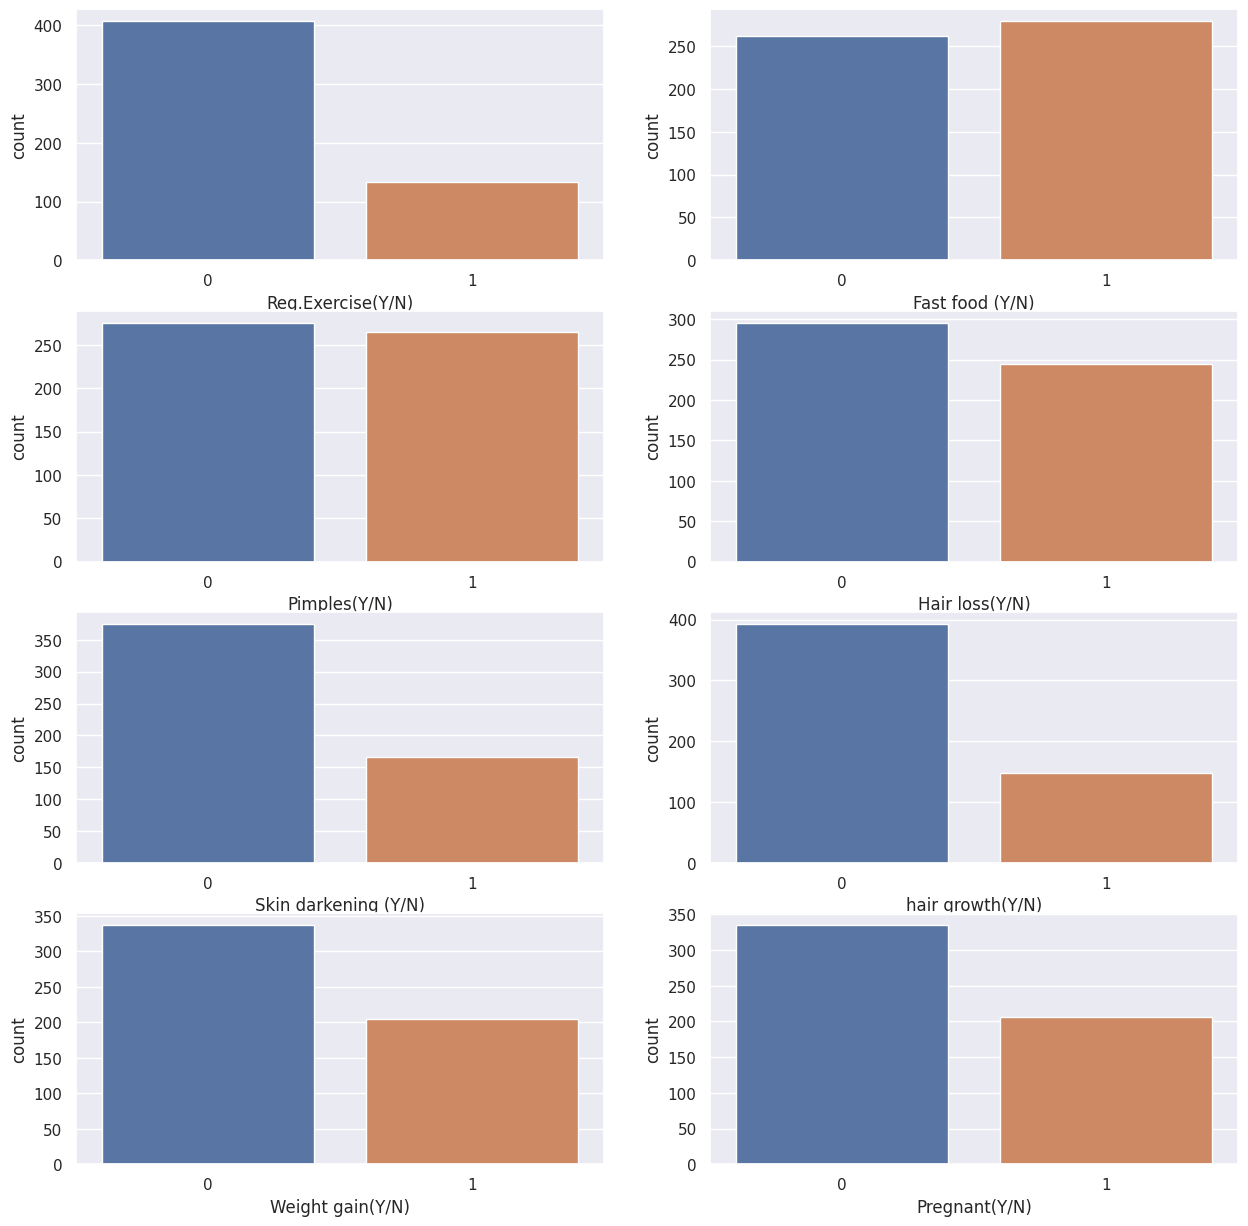

In [ ]:
# checking frequency of binary data
sns.set(rc={'figure.figsize':(15,15)})
fig, ax =plt.subplots(4, 2)
for i in range(8):
  sns.countplot(x=df[binary_data[i]], ax=ax[i//2,i%2])
fig.show()

In [ ]:
# convert blood group to dict
keys = df['Blood Group'].value_counts().keys().tolist()
values = df['Blood Group'].value_counts().tolist()
blood_group_dict = dict(zip(keys, values))

print(keys, values, blood_group_dict)

[15, 13, 11, 17, 16, 14, 12, 18] [206, 135, 108, 42, 19, 16, 13, 2] {15: 206, 13: 135, 11: 108, 17: 42, 16: 19, 14: 16, 12: 13, 18: 2}


In [ ]:
# sort dict by keys
keys.sort()

blood_group_dict = {key:blood_group_dict[key] for key in keys}
print(blood_group_dict)

{11: 108, 12: 13, 13: 135, 14: 16, 15: 206, 16: 19, 17: 42, 18: 2}


In [ ]:
# convert blood group
keys = ['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-']
values = list(blood_group_dict.values())

blood_group_dict = dict(zip(keys, values))
print(blood_group_dict)

{'A+': 108, 'A-': 13, 'B+': 135, 'B-': 16, 'O+': 206, 'O-': 19, 'AB+': 42, 'AB-': 2}


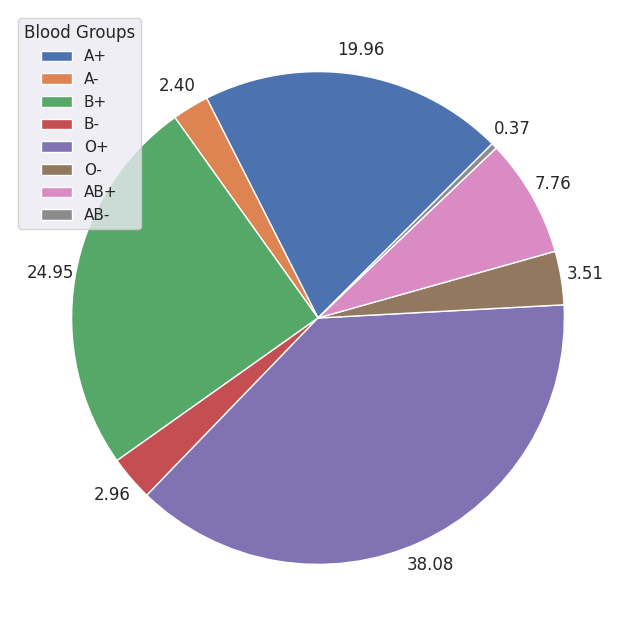

In [ ]:
# checking frequency of nominal data
plt.figure(figsize=(8,8))
plt.pie(blood_group_dict.values(), labels=None, autopct="%.2f", pctdistance=1.1, startangle=45)
plt.legend(title="Blood Groups", labels=blood_group_dict.keys(),loc="best")
plt.show()

In [ ]:
# counting number of values per column
for col in imp_cols:
  print(f"{col}: {len(df[col].value_counts())}")

Age (yrs): 29
Weight (Kg): 117
Height(Cm): 50
BMI: 336
Blood Group: 8
Pulse rate(bpm): 11
RR (breaths/min): 8
Hb(g/dl): 46
Cycle(R/I): 3
Cycle length(days): 12
Marraige Status (Yrs): 34
Pregnant(Y/N): 2
No. of aborptions: 6
I beta-HCG(mIU/mL): 307
II beta-HCG(mIU/mL): 202
FSH(mIU/mL): 371
LH(mIU/mL): 342
FSH/LH: 339
Hip(inch): 19
Waist(inch): 23
Waist:Hip Ratio: 22
TSH (mIU/L): 308
AMH(ng/mL): 300
PRL(ng/mL): 481
Vit D3 (ng/mL): 331
PRG(ng/mL): 89
RBS(mg/dl): 55
Weight gain(Y/N): 2
hair growth(Y/N): 2
Skin darkening (Y/N): 2
Hair loss(Y/N): 2
Pimples(Y/N): 2
Fast food (Y/N): 2
Reg.Exercise(Y/N): 2
BP _Systolic (mmHg): 6
BP _Diastolic (mmHg): 5
Follicle No. (L): 21
Follicle No. (R): 20
Avg. F size (L) (mm): 31
Avg. F size (R) (mm): 32
Endometrium (mm): 91


## 6. Dealing with Outliers

Any point outside the upper bound and lower bound is known as outlier.

*   inter_quartile_range = 3rd_quartile - 1st_quartile
*   lower_bound = 1st_quartile - (1.5 * inter_quartile_range)
*   upper_bound = 3rd_quartile + (1.5 * inter_quartile_range)

1. distribution curves and box plots were created for outlier detection and replacement

* Mean is used for normal distribution and without outliers.
* Median is used for normal distribution and with outliers.
* Mode is used for nominal data.

2. median was chosen as it is less affected by outliers and skewness.

In [ ]:
# count outliers
def count_outliers(feature):
  number_of_outliers = 0
  q1 = np.quantile(df[feature], 0.25)
  q3 = np.quantile(df[feature], 0.75)
  iqr = q3 - q1
  lower_limit = q1 - 1.5*iqr
  upper_limit = q3 + 1.5*iqr
  outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
  return len(outliers)

In [ ]:
# check which feature has how many outliers
col_with_outliers = []
for col in numeric_discrete_data+numeric_continuous_data:
  answer = count_outliers(col)
  if answer > 0:
    print(f'{col}: {answer}')
    col_with_outliers.append(col)

Avg. F size (R) (mm): 5
Avg. F size (L) (mm): 9
Follicle No. (L): 6
BP _Diastolic (mmHg): 2
BP _Systolic (mmHg): 3
RBS(mg/dl): 30
Hip(inch): 21
No. of aborptions: 104
Marraige Status (Yrs): 11
Cycle length(days): 77
RR (breaths/min): 14
Pulse rate(bpm): 94
Age (yrs): 5
Endometrium (mm): 8
PRG(ng/mL): 39
Vit D3 (ng/mL): 31
PRL(ng/mL): 21
TSH (mIU/L): 27
AMH(ng/mL): 52
FSH/LH: 48
LH(mIU/mL): 24
FSH(mIU/mL): 12
II beta-HCG(mIU/mL): 78
I beta-HCG(mIU/mL): 46
Hb(g/dl): 8
BMI: 13
Height(Cm): 6
Weight (Kg): 18


In [ ]:
# check out col with outliers
print(len(col_with_outliers))
print(col_with_outliers)

28
['Avg. F size (R) (mm)', 'Avg. F size (L) (mm)', 'Follicle No. (L)', 'BP _Diastolic (mmHg)', 'BP _Systolic (mmHg)', 'RBS(mg/dl)', 'Hip(inch)', 'No. of aborptions', 'Marraige Status (Yrs)', 'Cycle length(days)', 'RR (breaths/min)', 'Pulse rate(bpm)', 'Age (yrs)', 'Endometrium (mm)', 'PRG(ng/mL)', 'Vit D3 (ng/mL)', 'PRL(ng/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'FSH/LH', 'LH(mIU/mL)', 'FSH(mIU/mL)', 'II beta-HCG(mIU/mL)', 'I beta-HCG(mIU/mL)', 'Hb(g/dl)', 'BMI', 'Height(Cm)', 'Weight (Kg)']


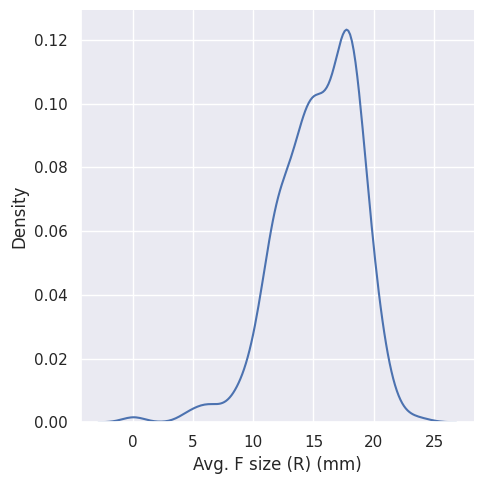

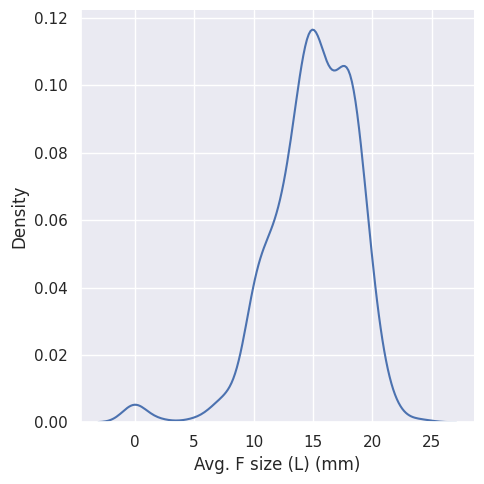

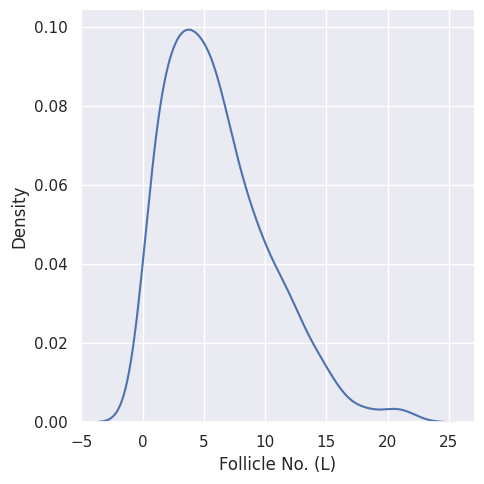

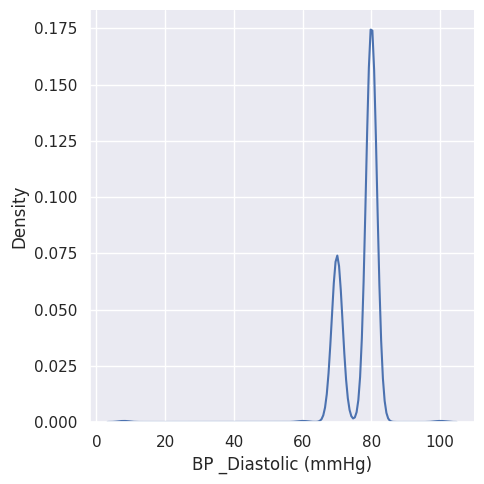

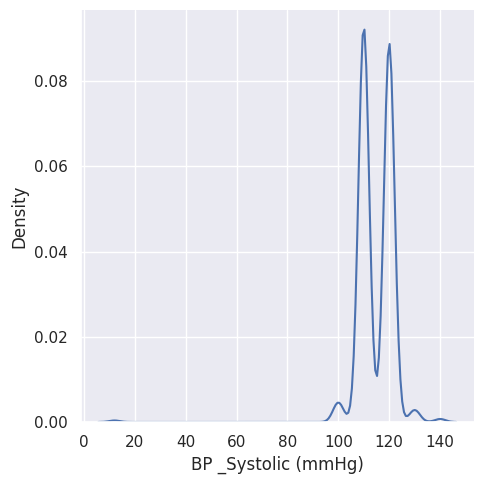

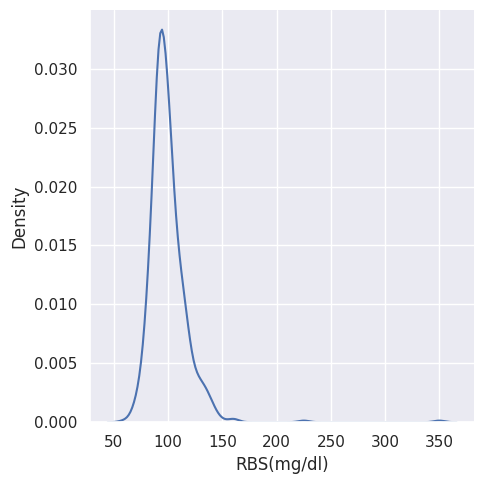

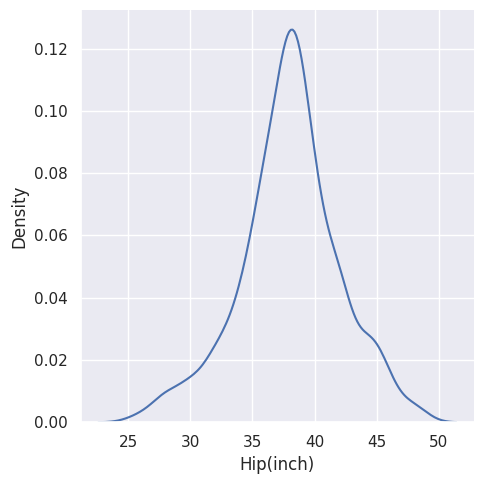

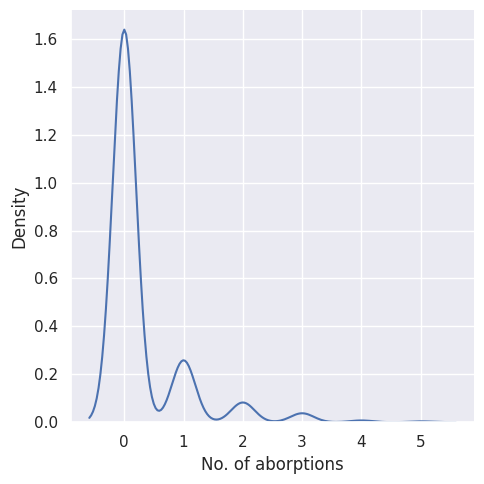

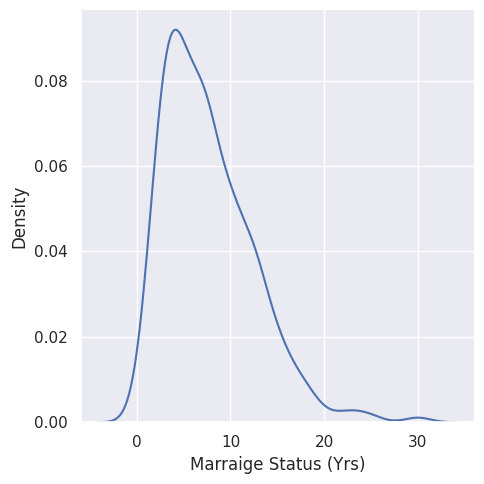

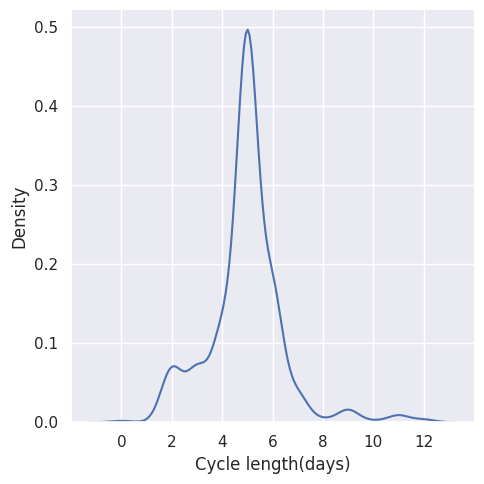

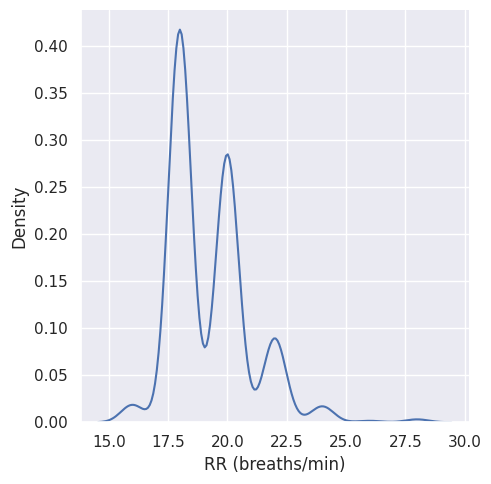

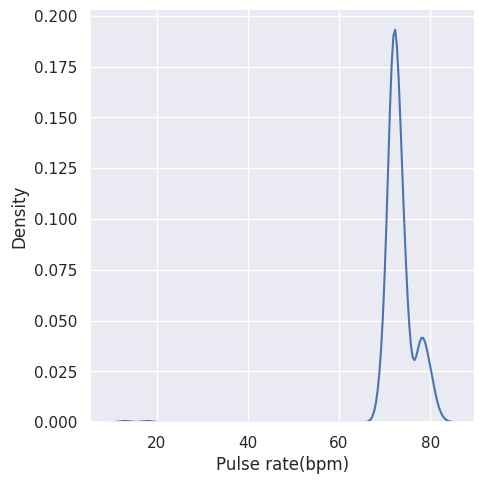

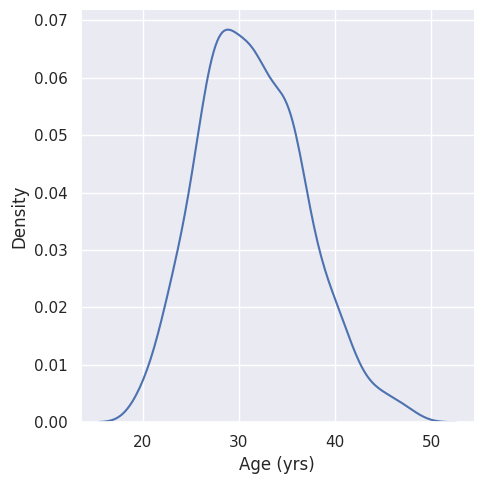

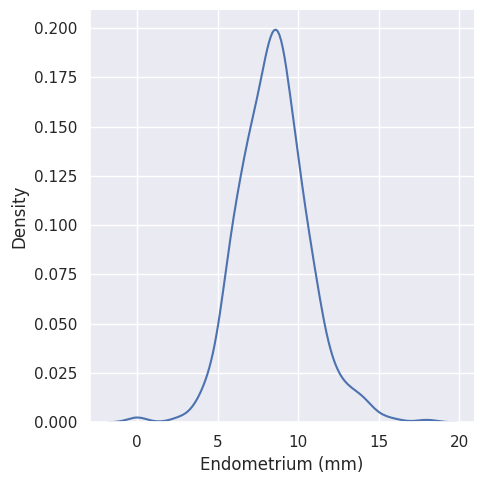

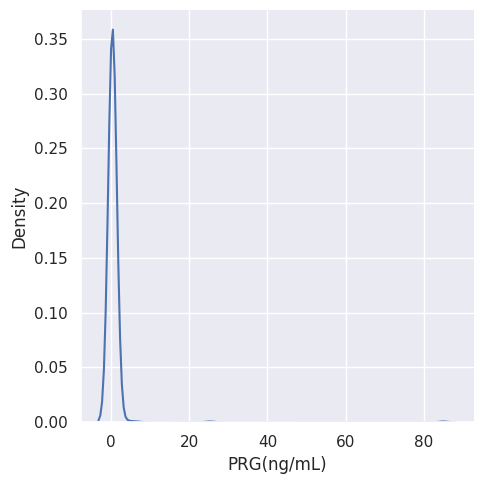

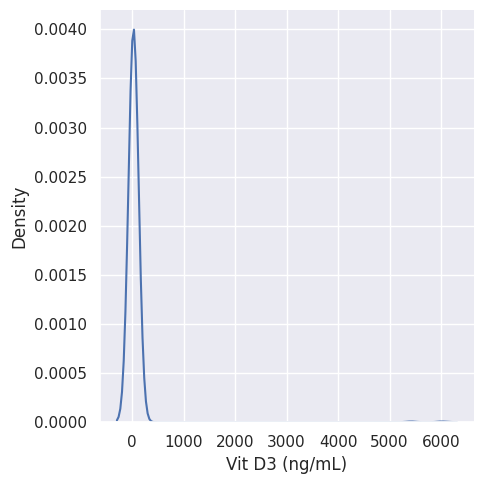

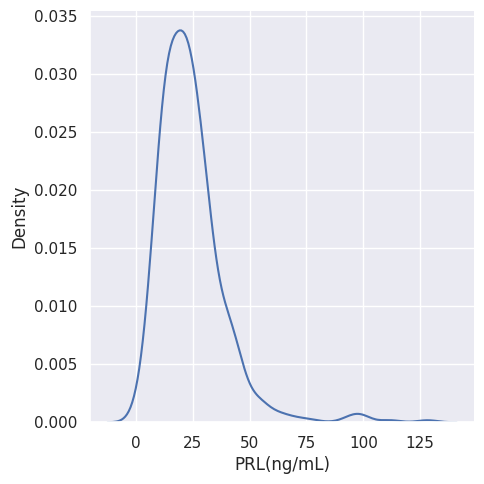

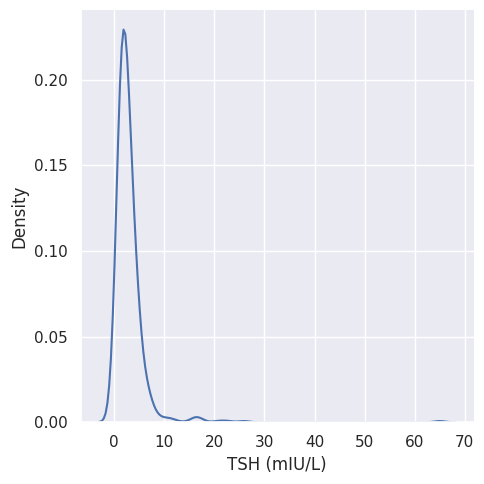

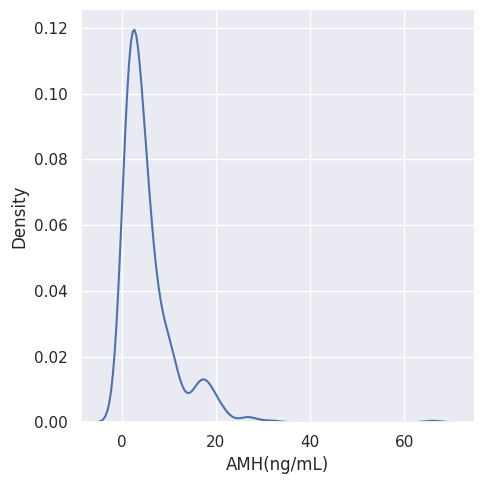

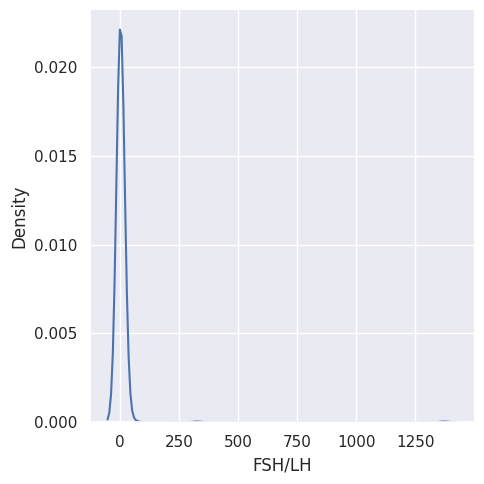

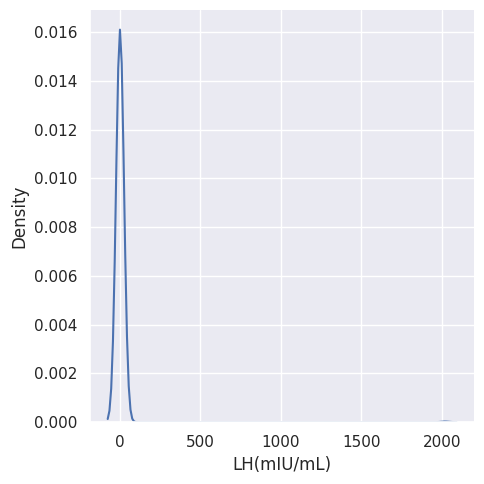

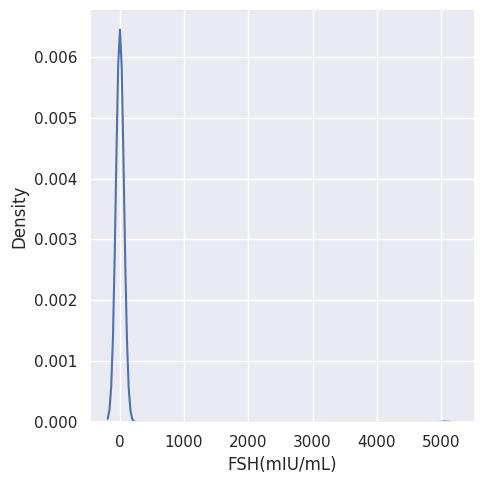

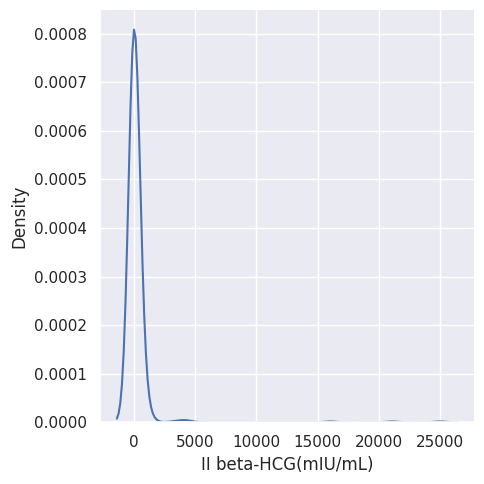

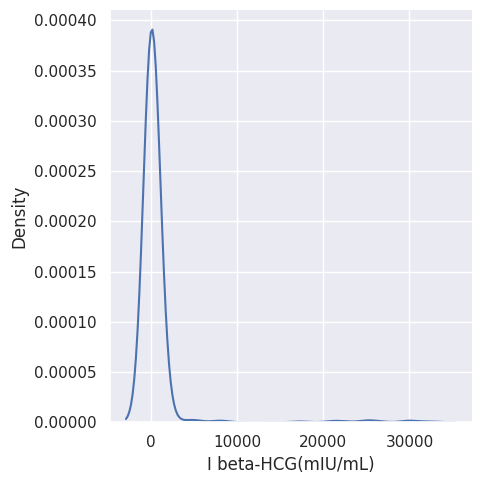

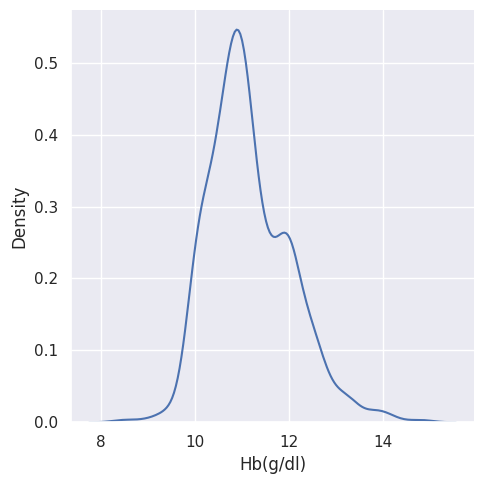

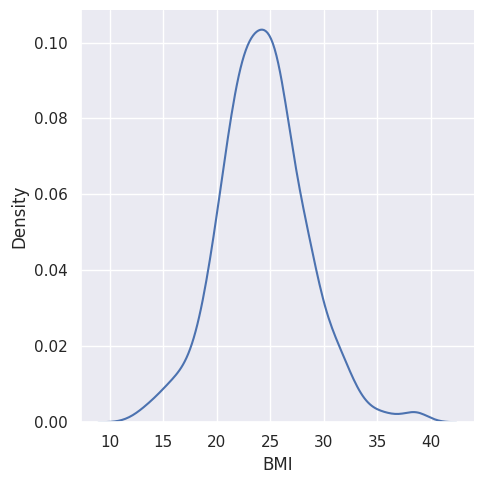

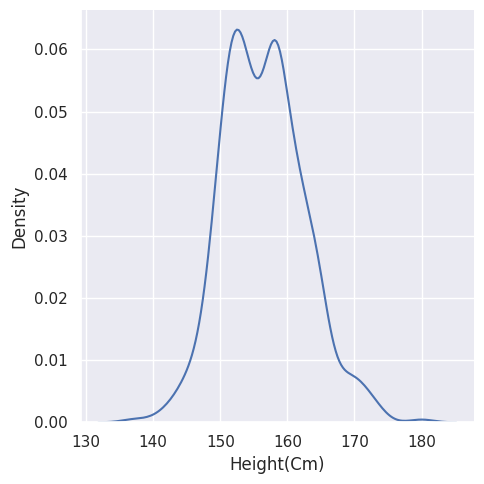

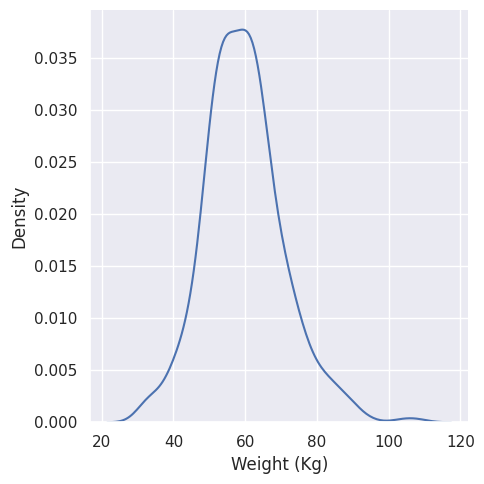

In [ ]:
# distribution curves
for col in col_with_outliers:
  sns.displot(df, x=col, kind="kde")
  plt.show()

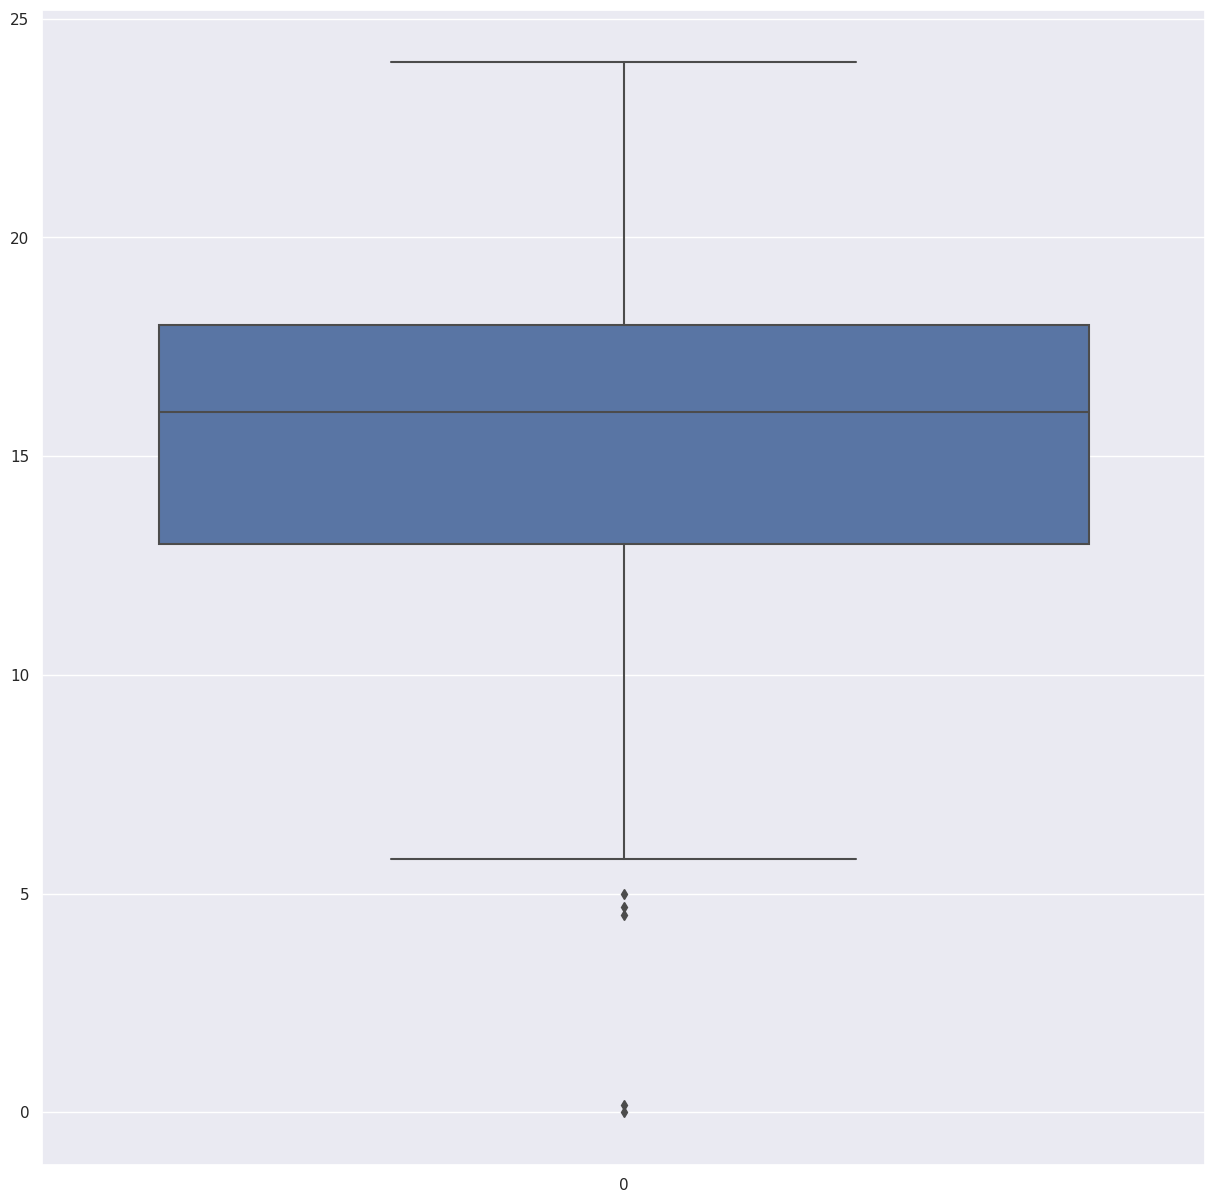

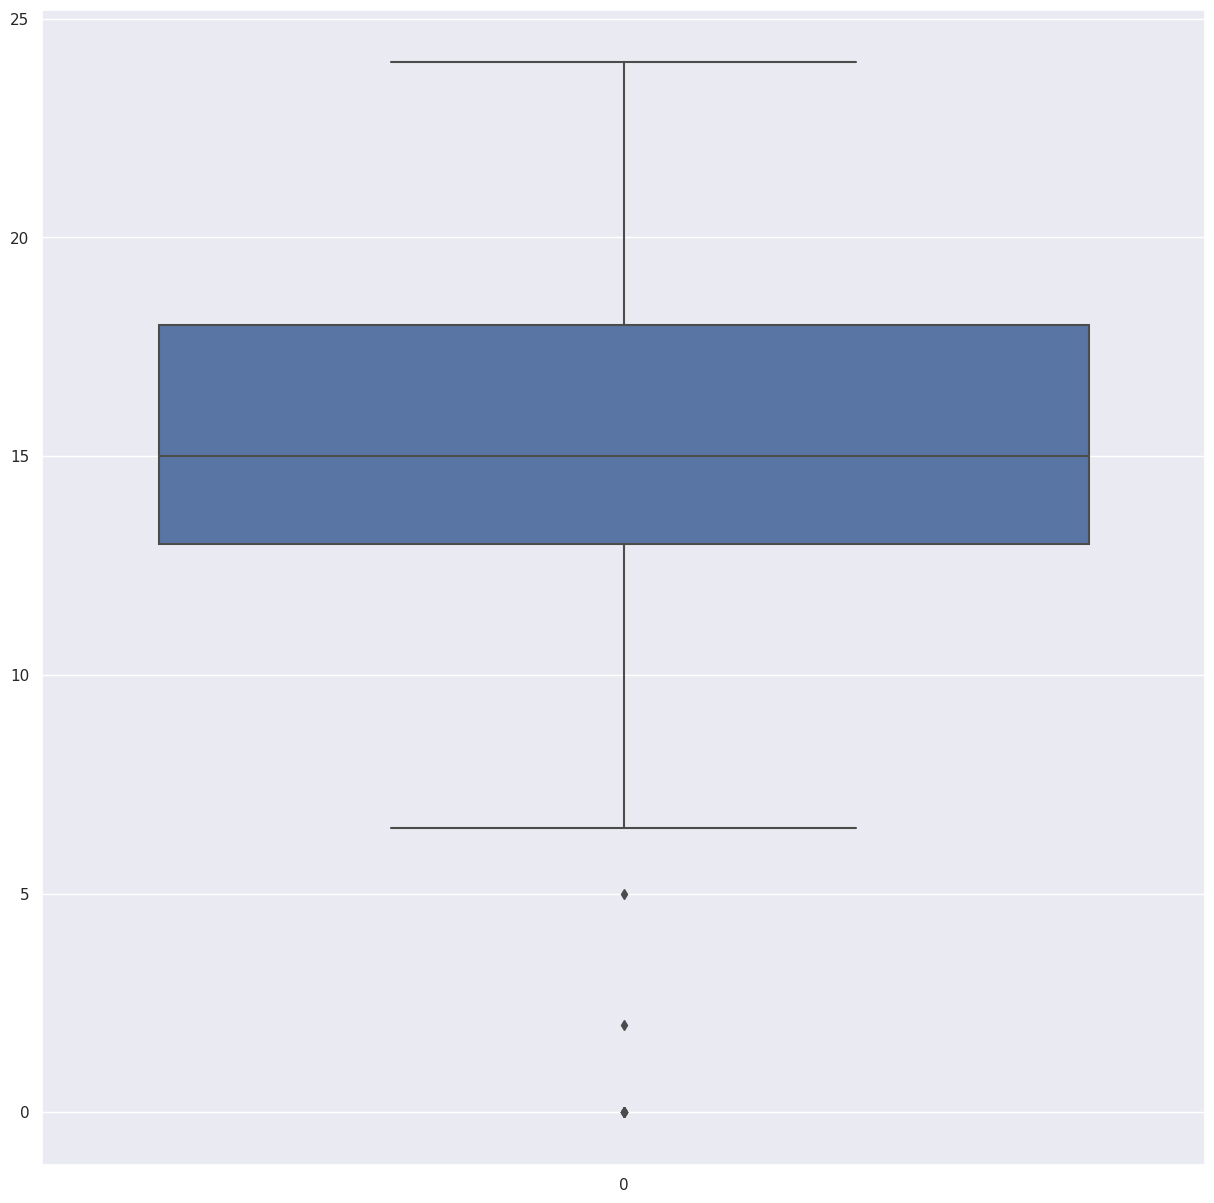

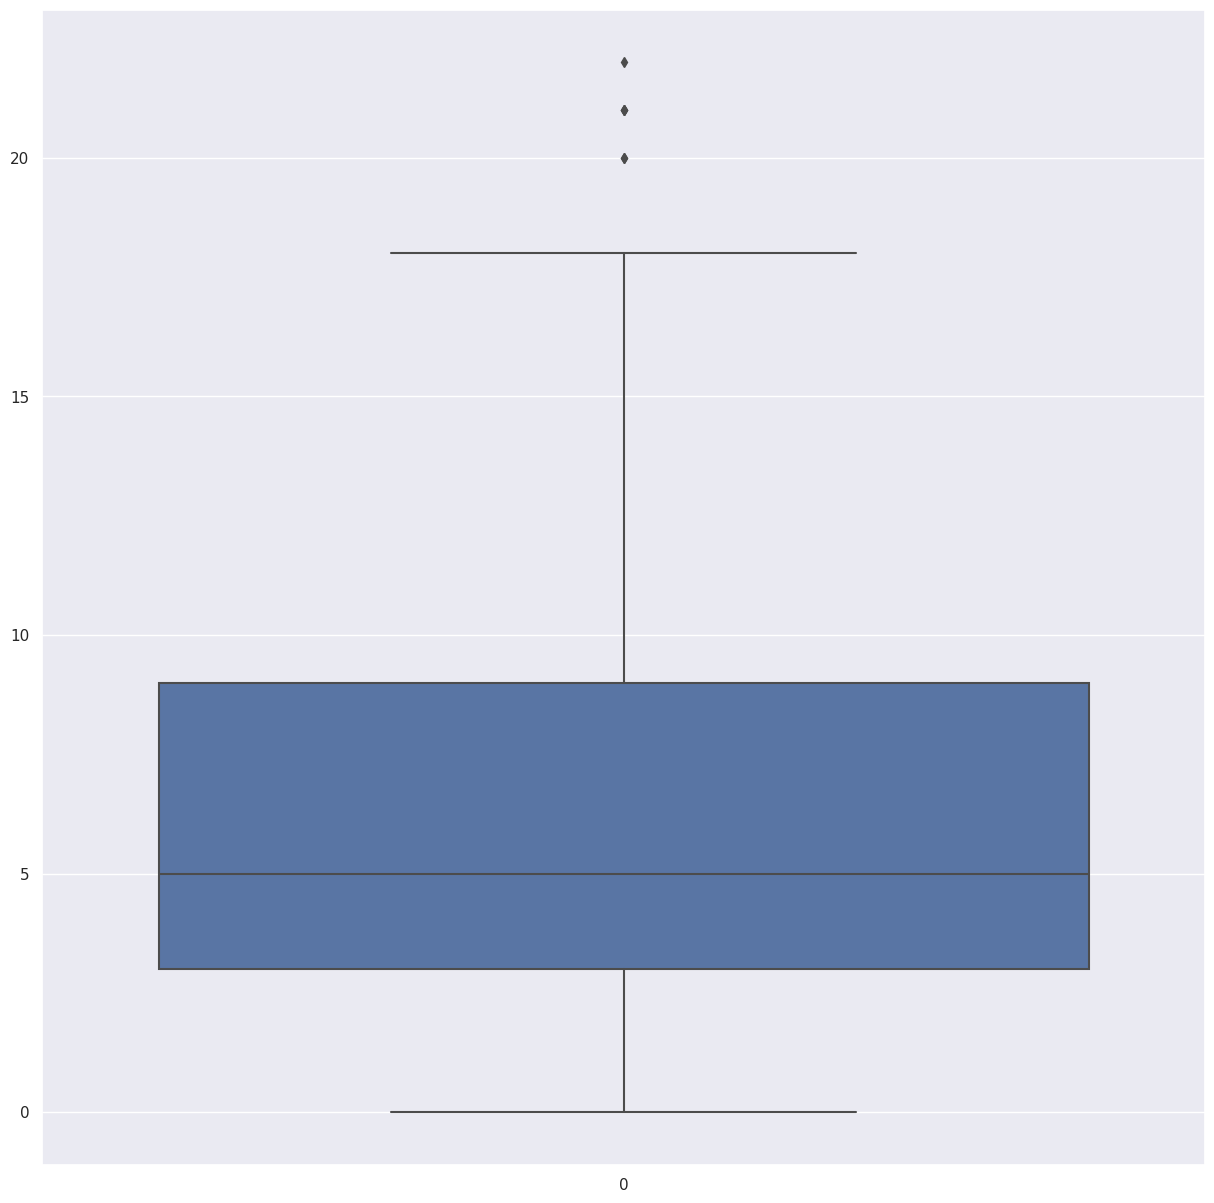

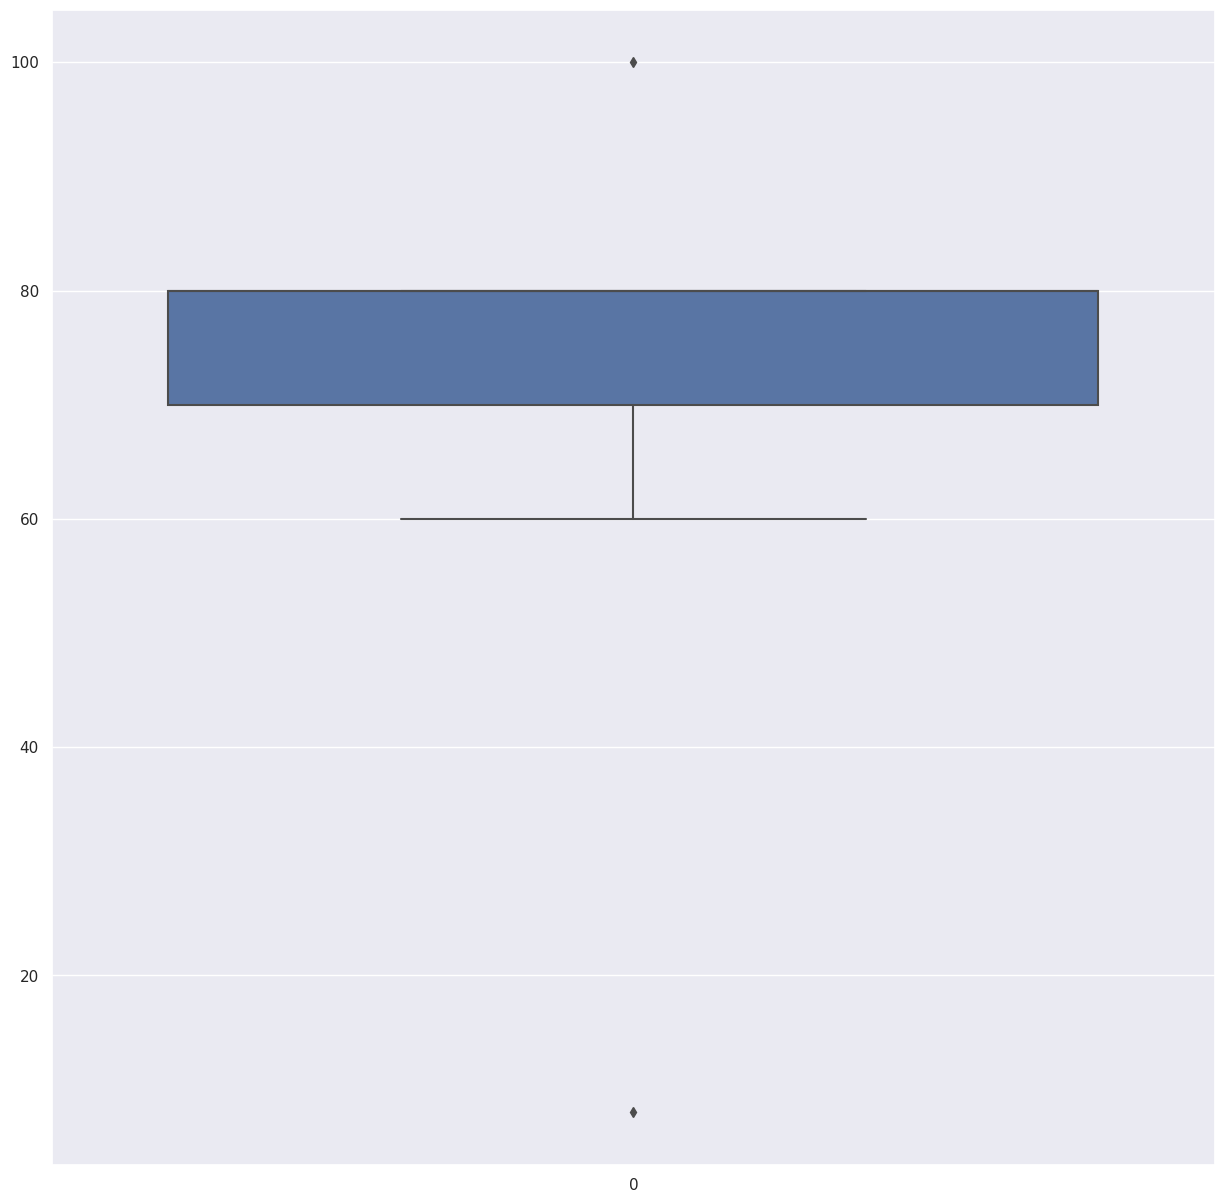

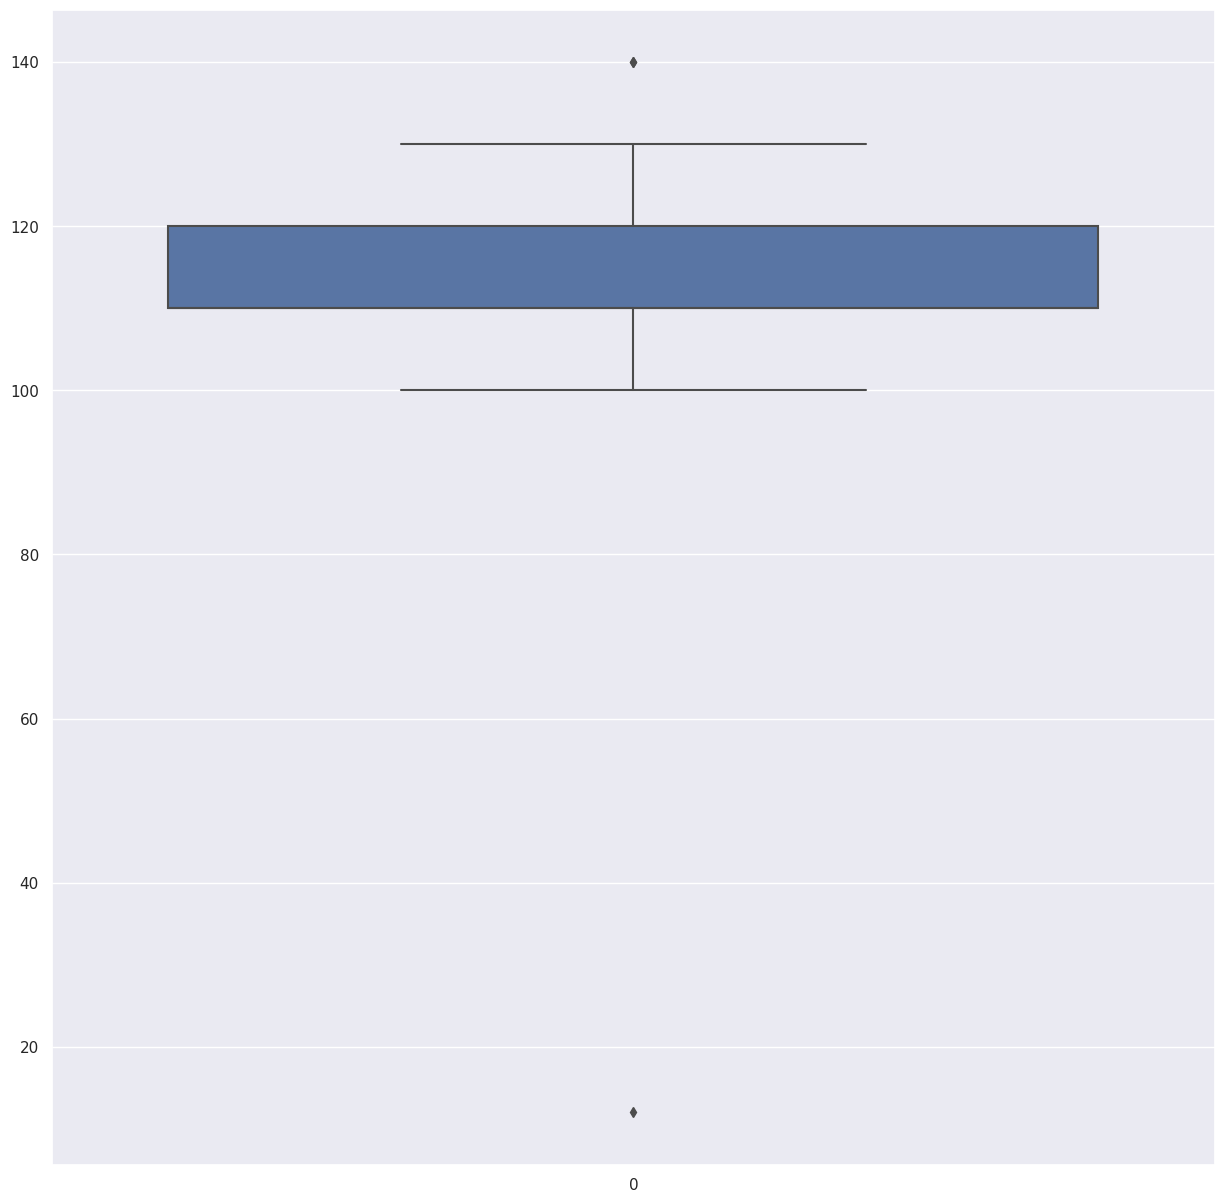

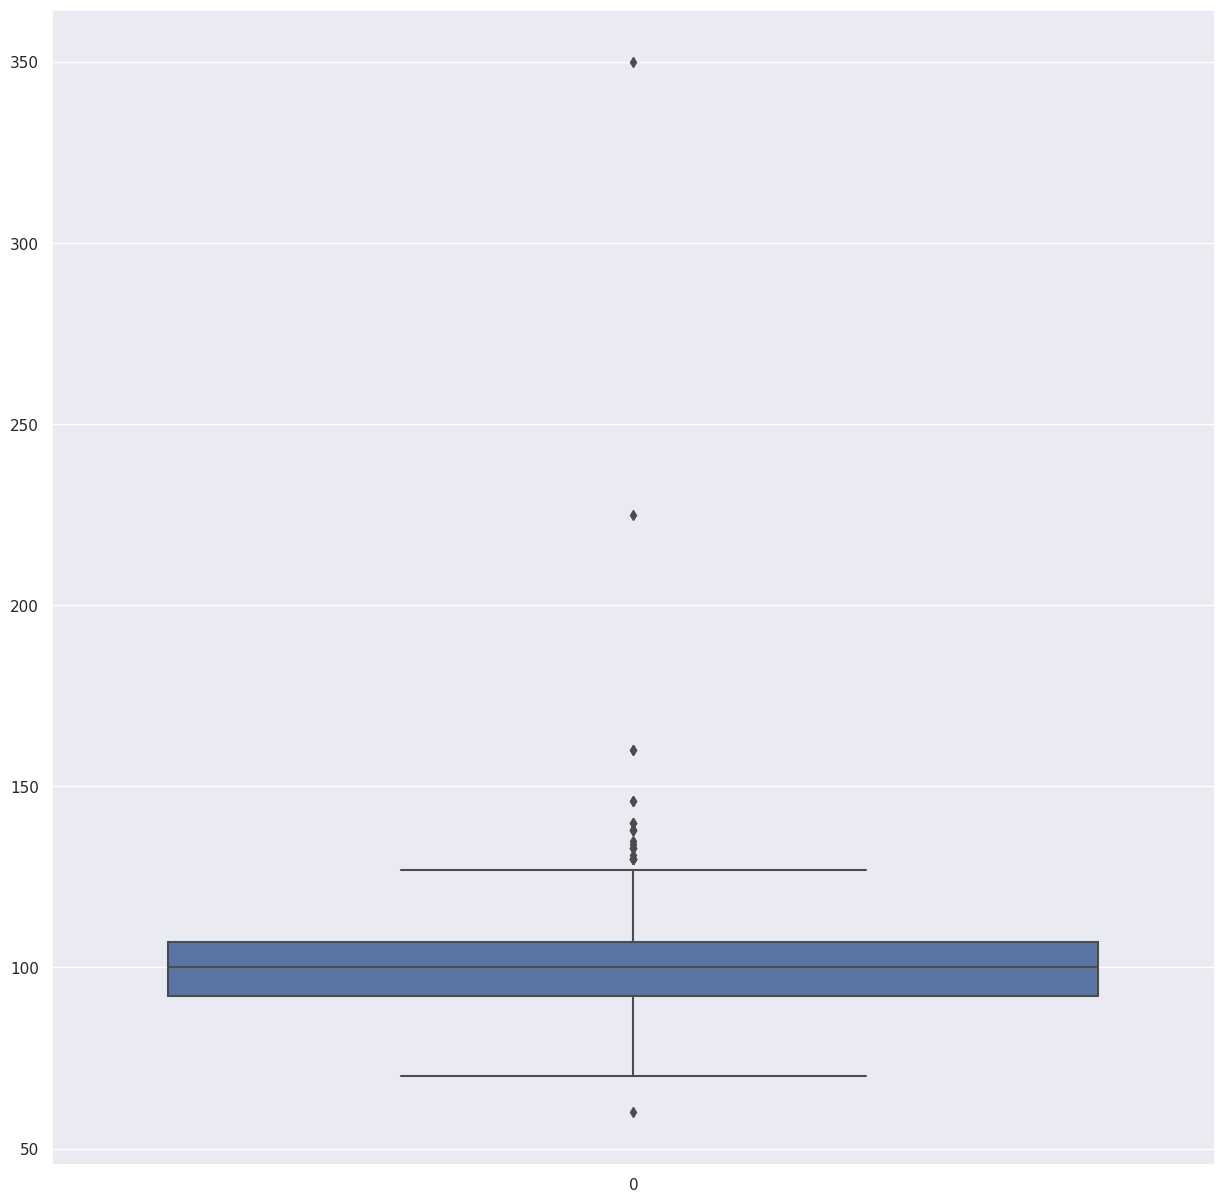

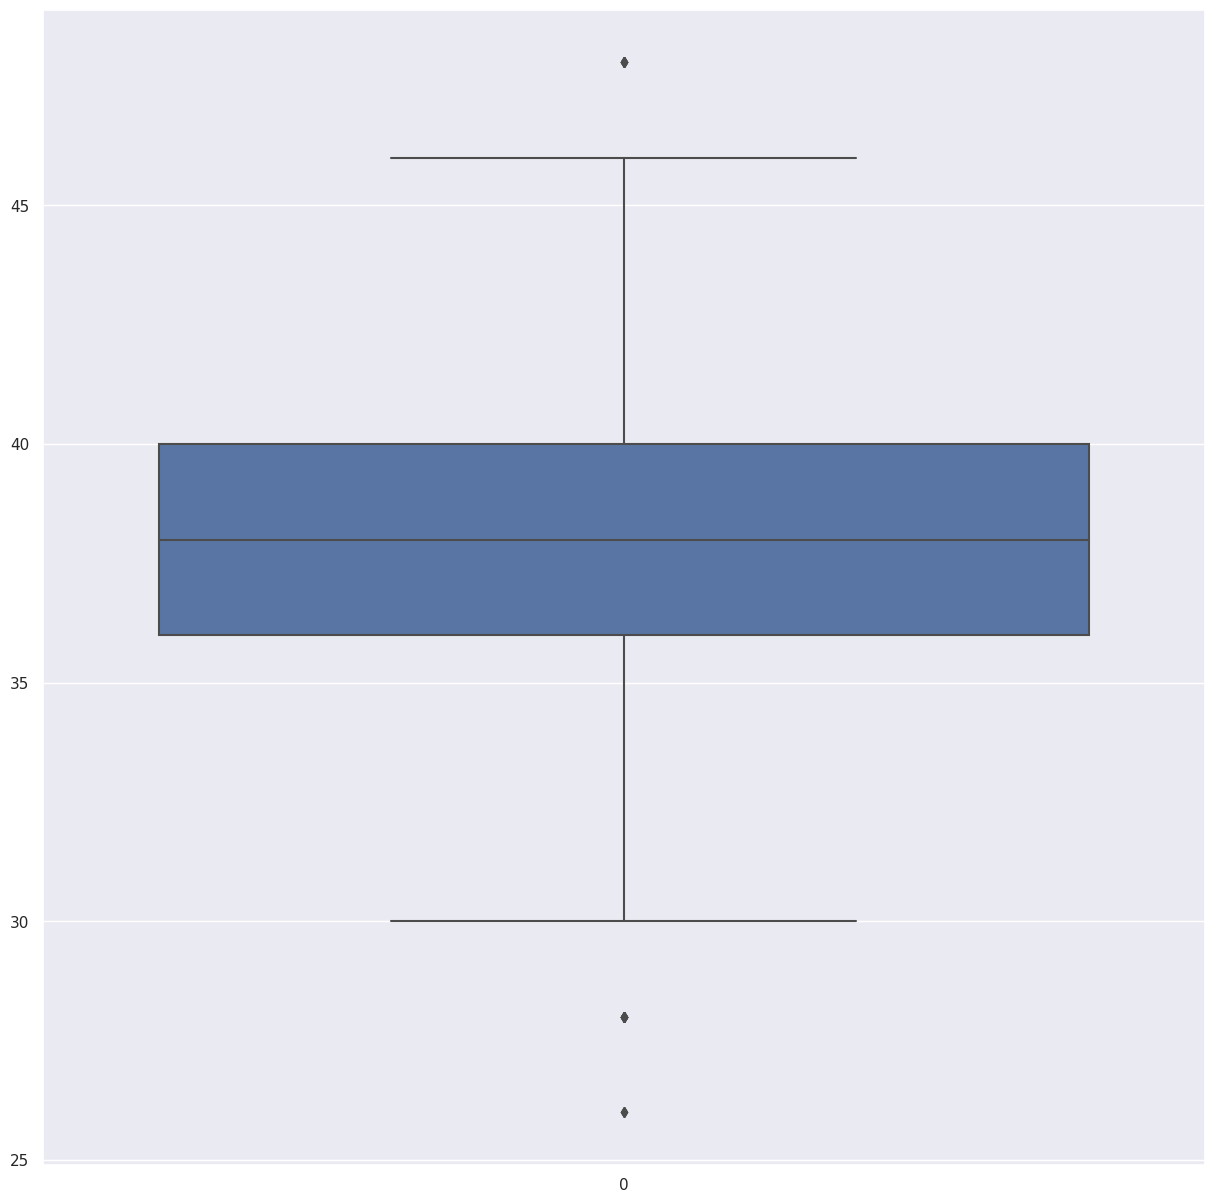

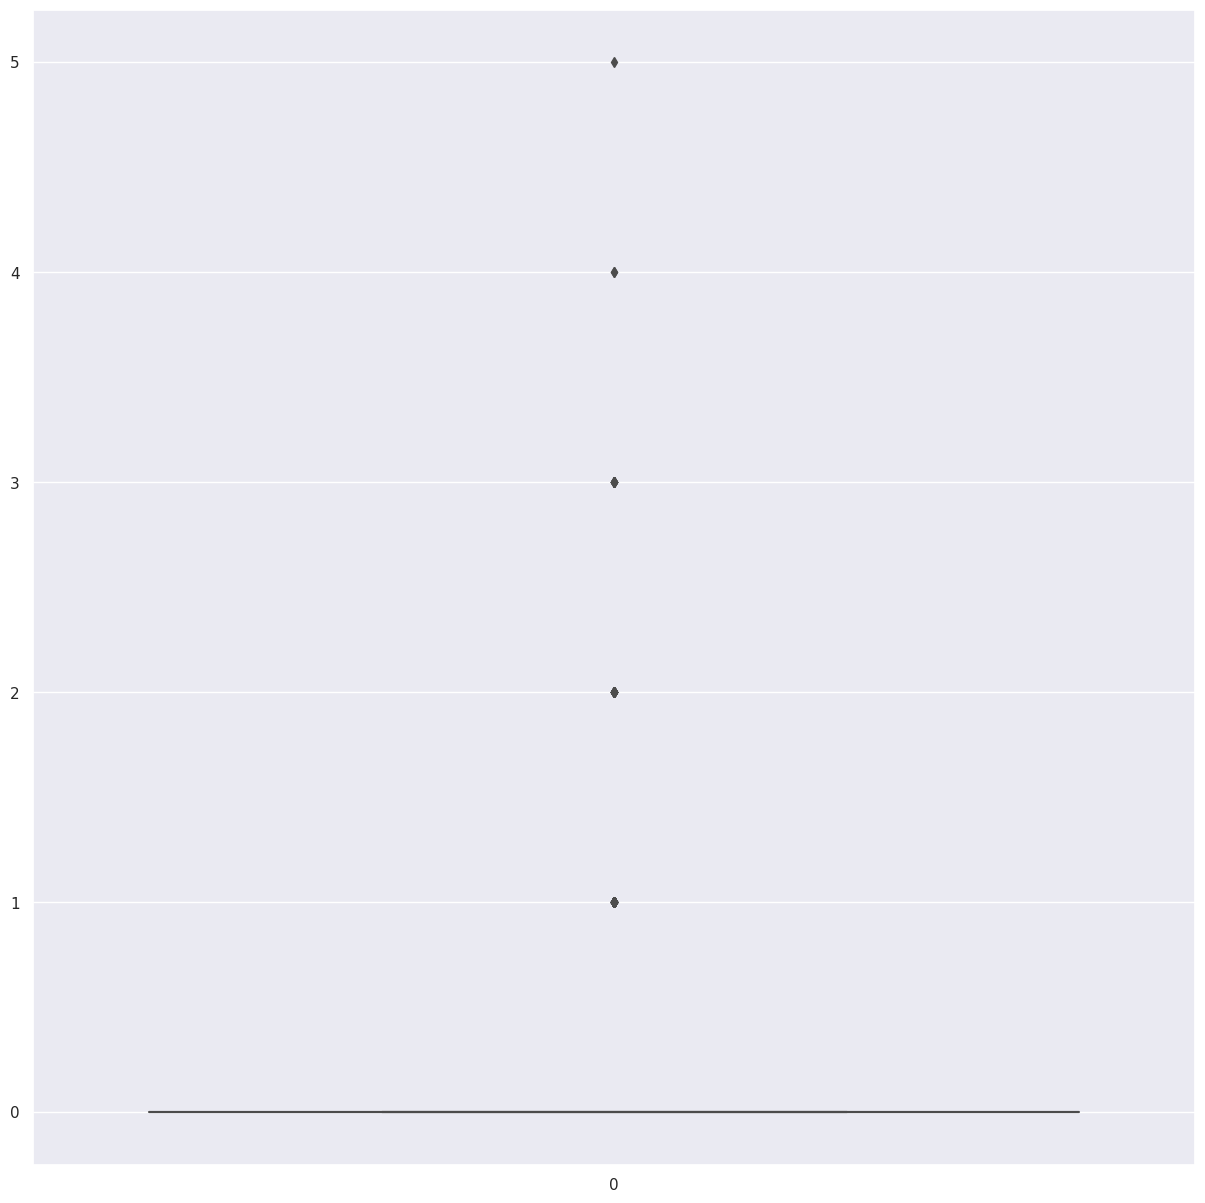

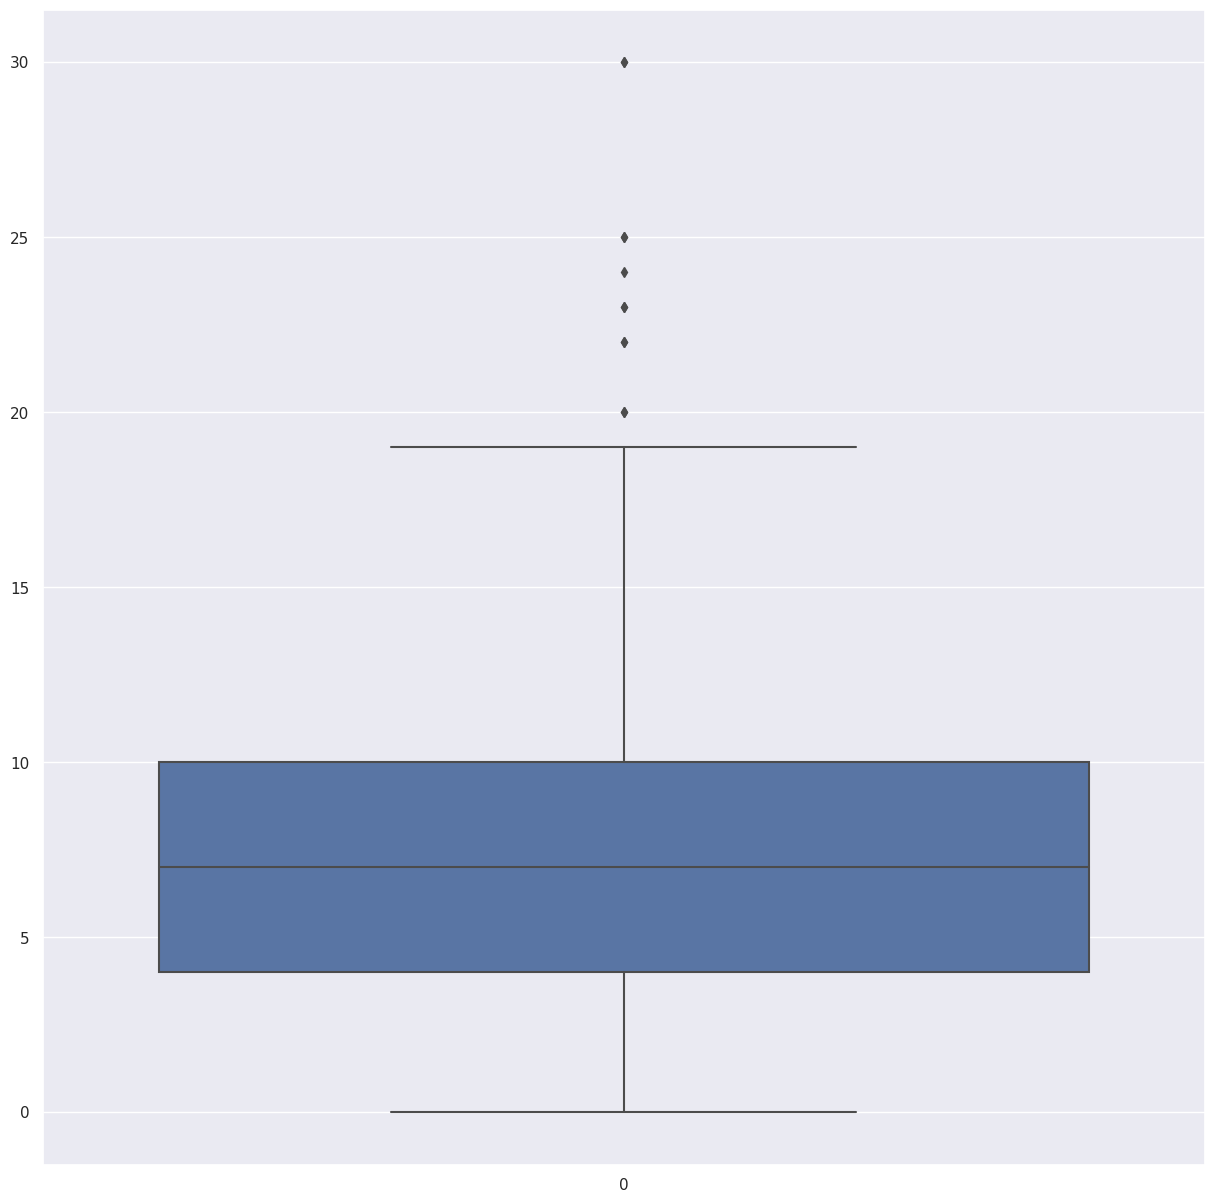

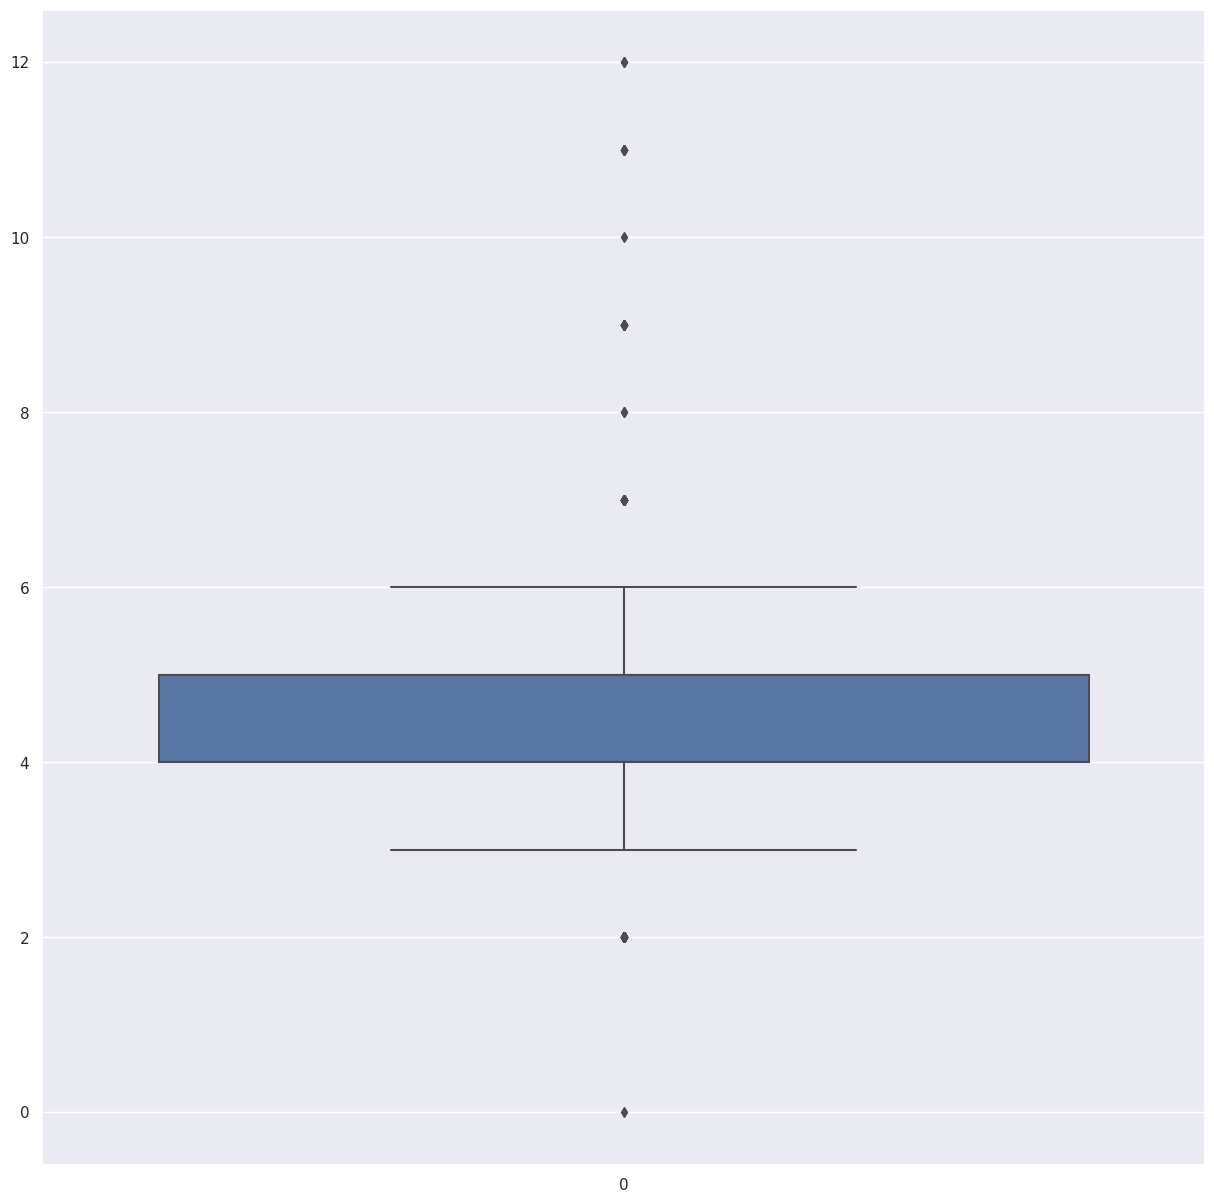

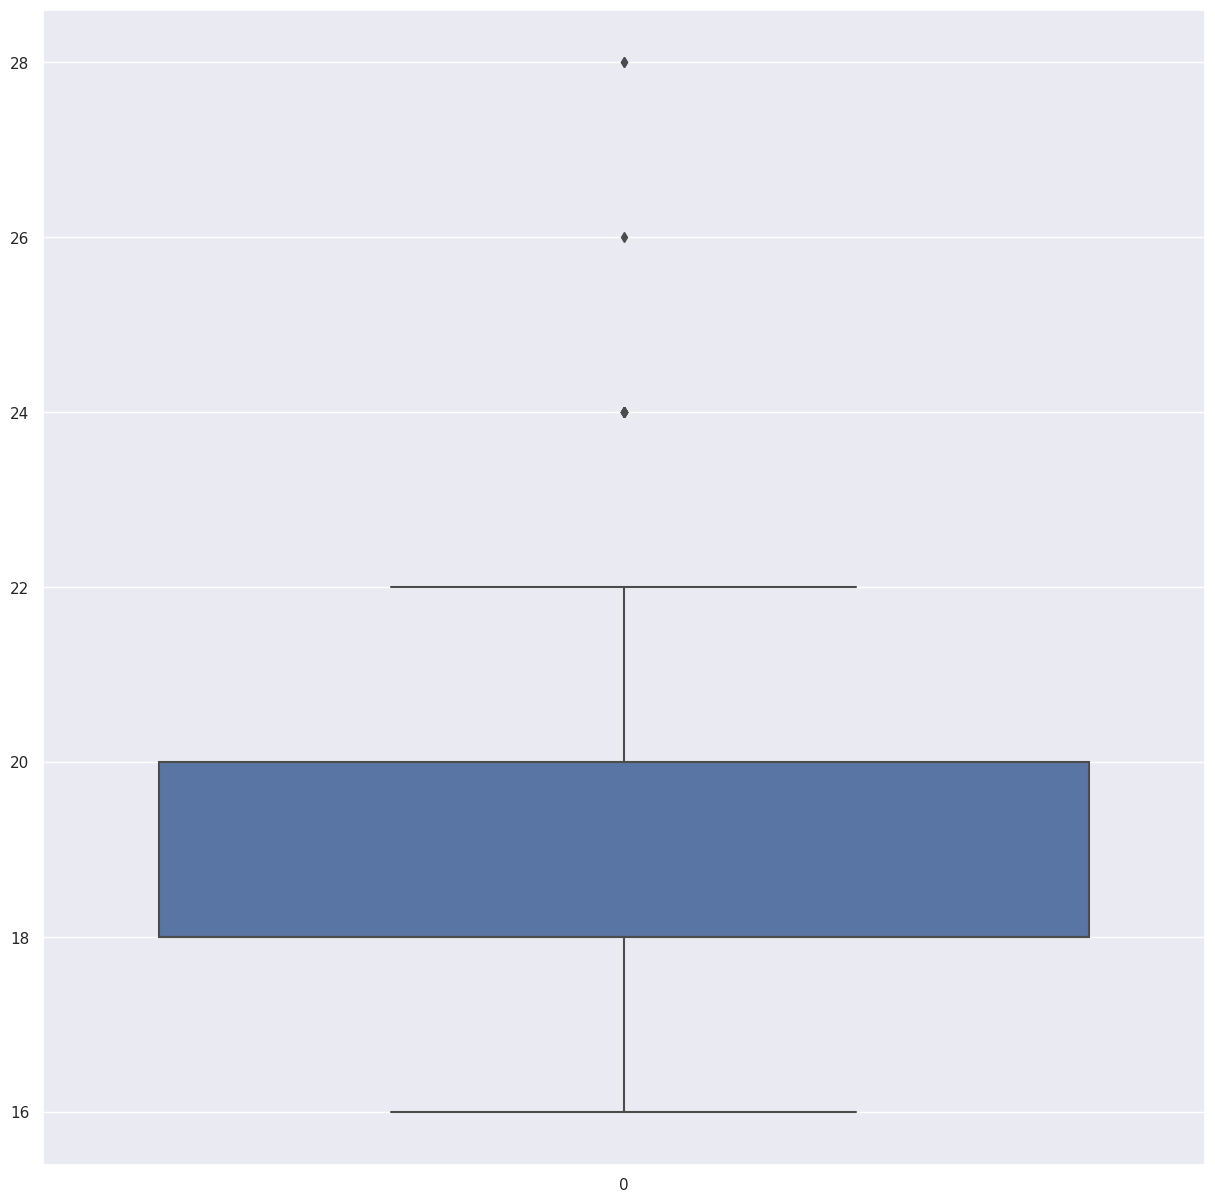

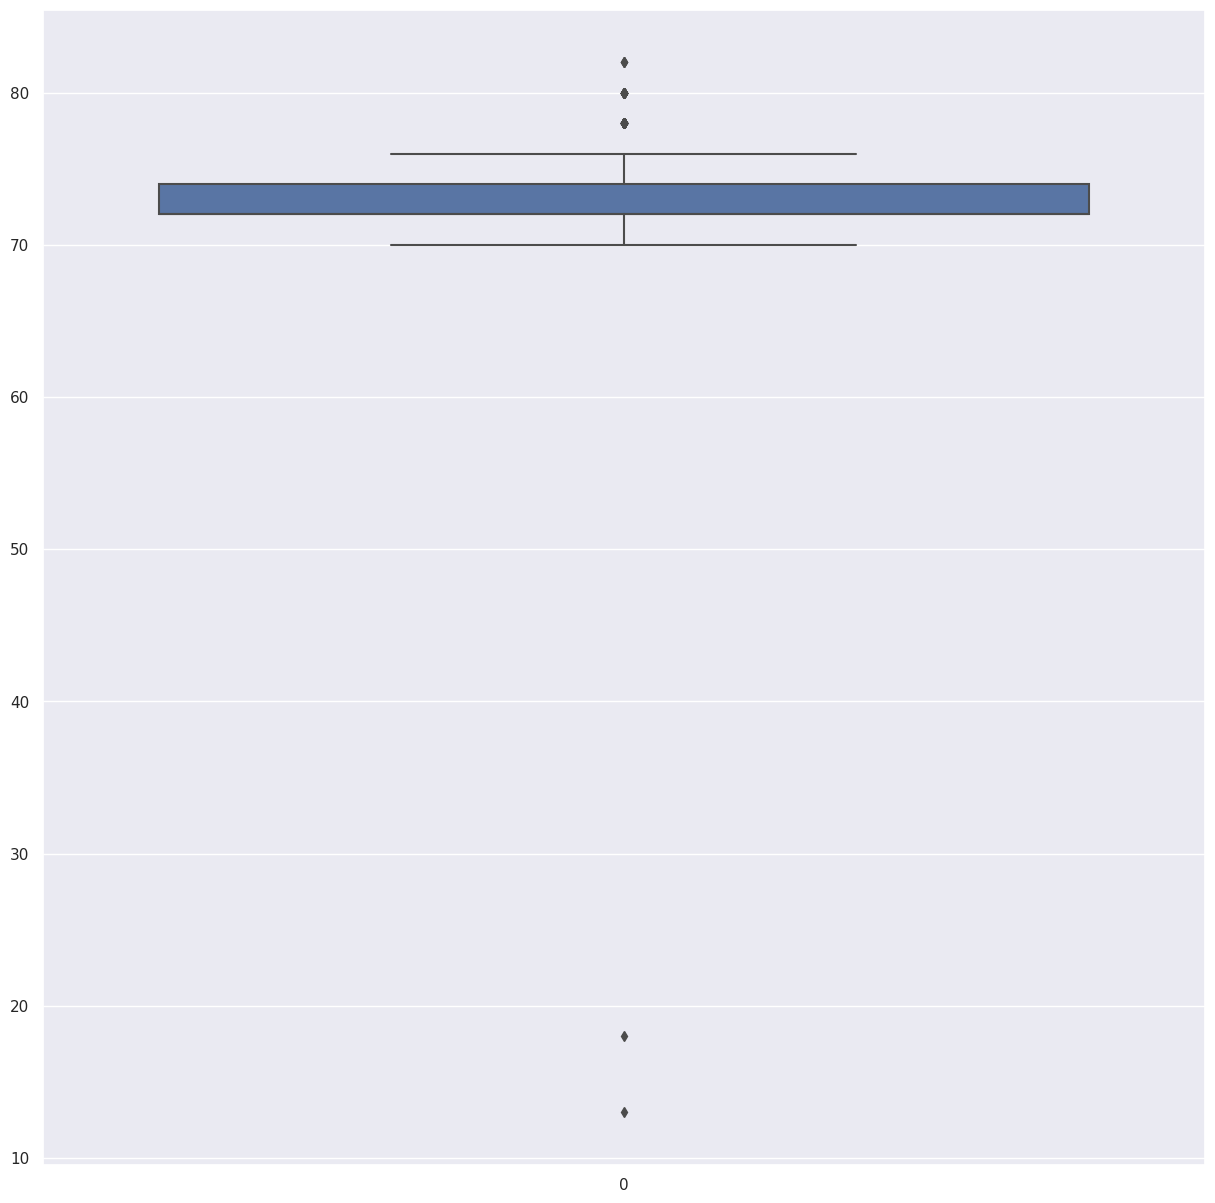

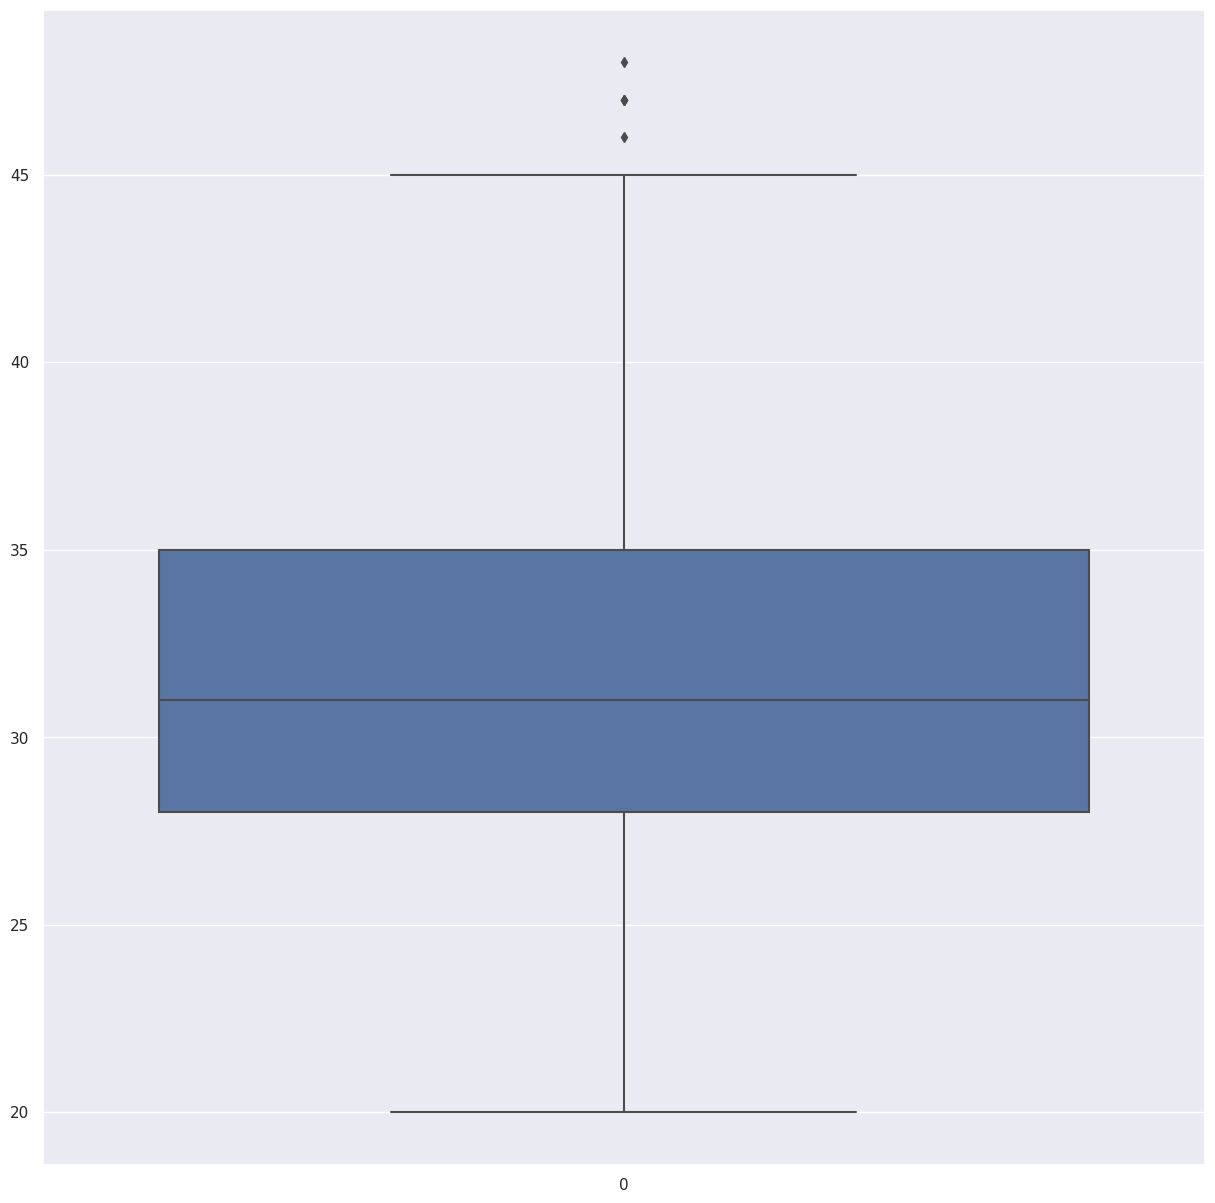

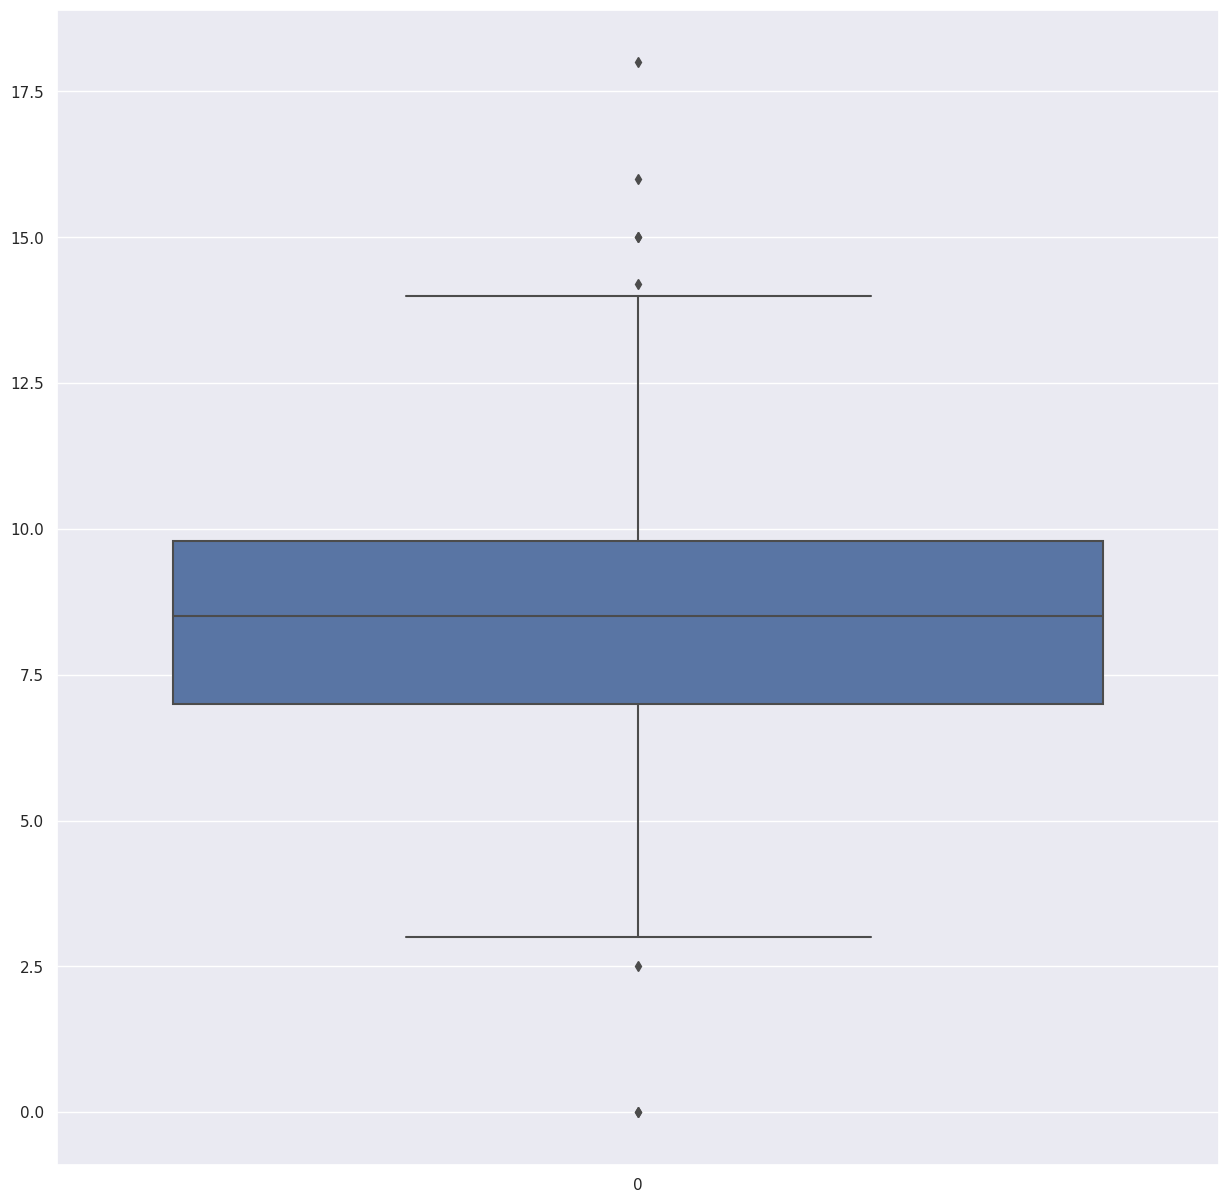

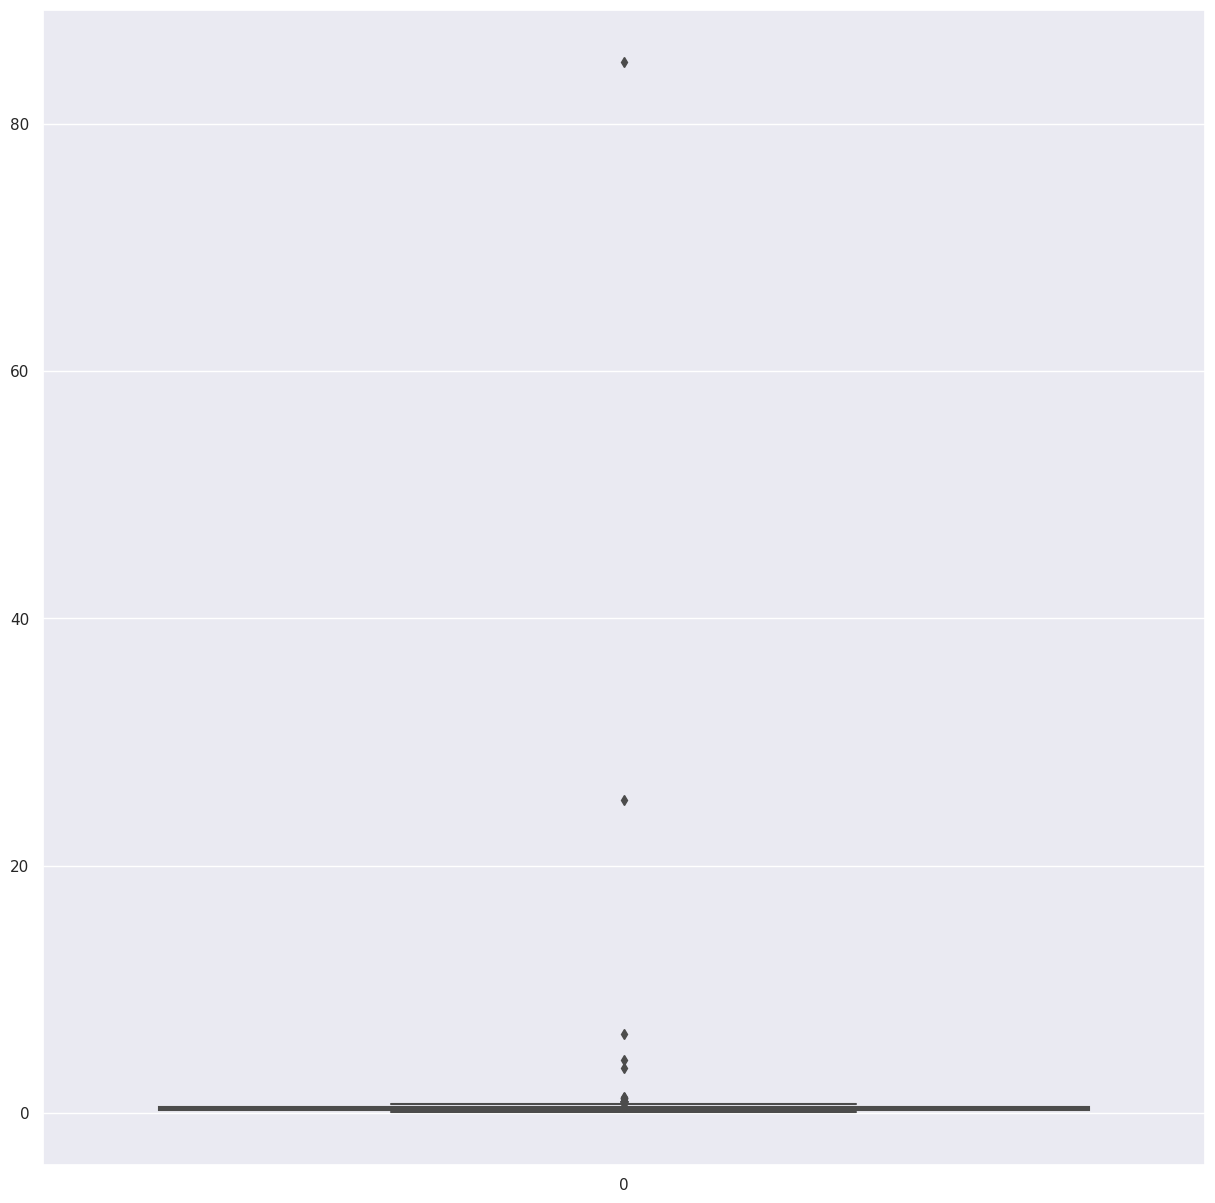

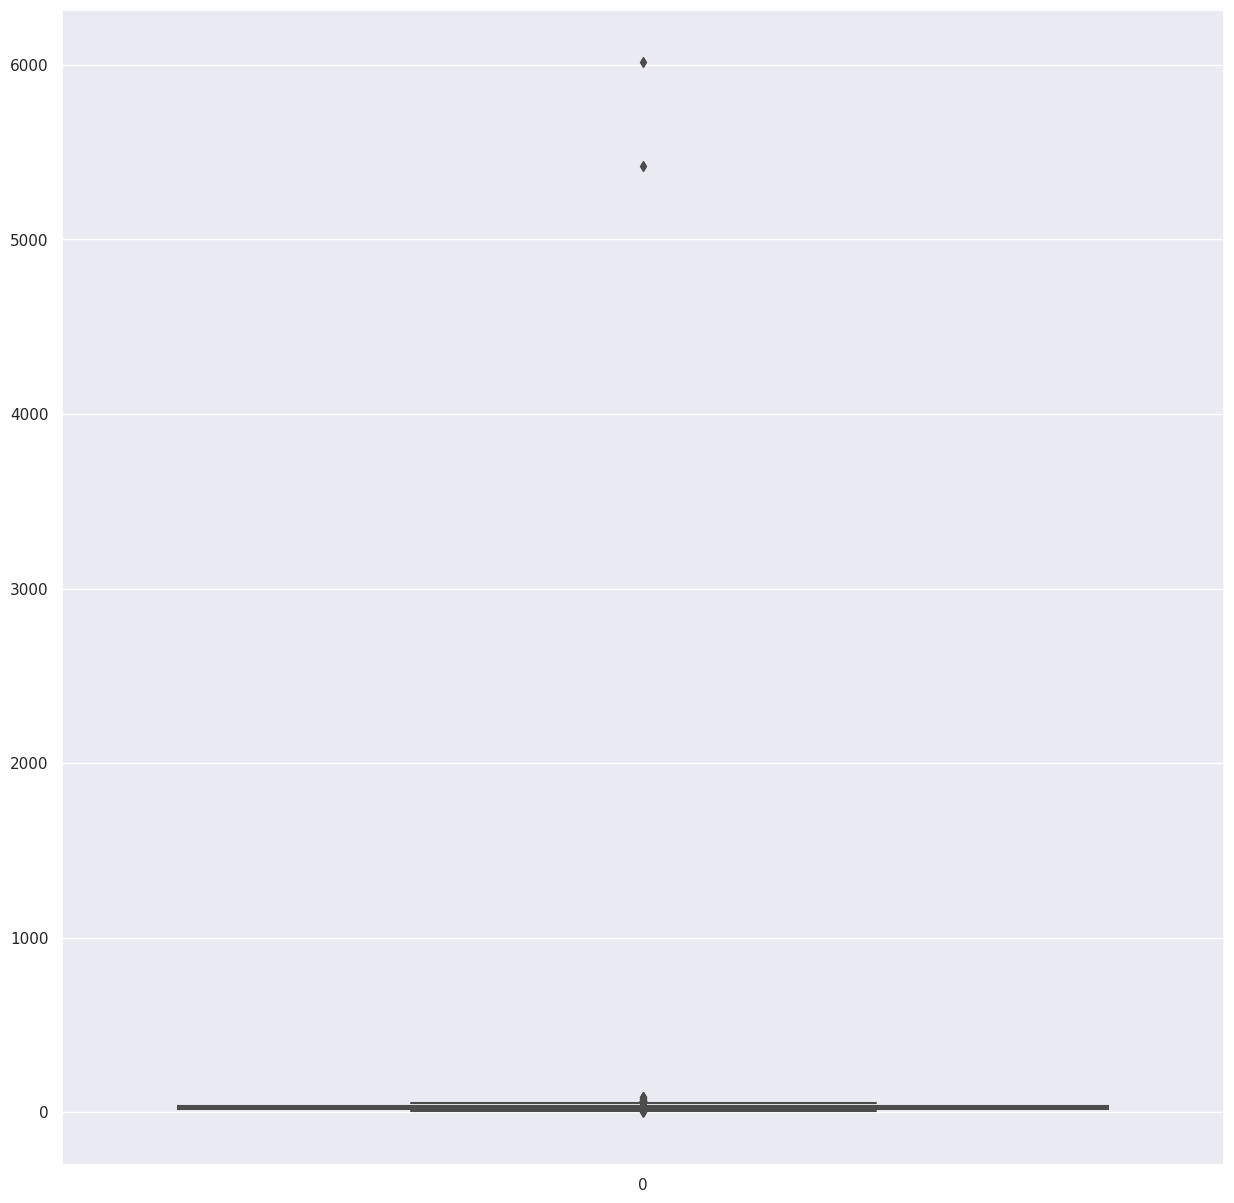

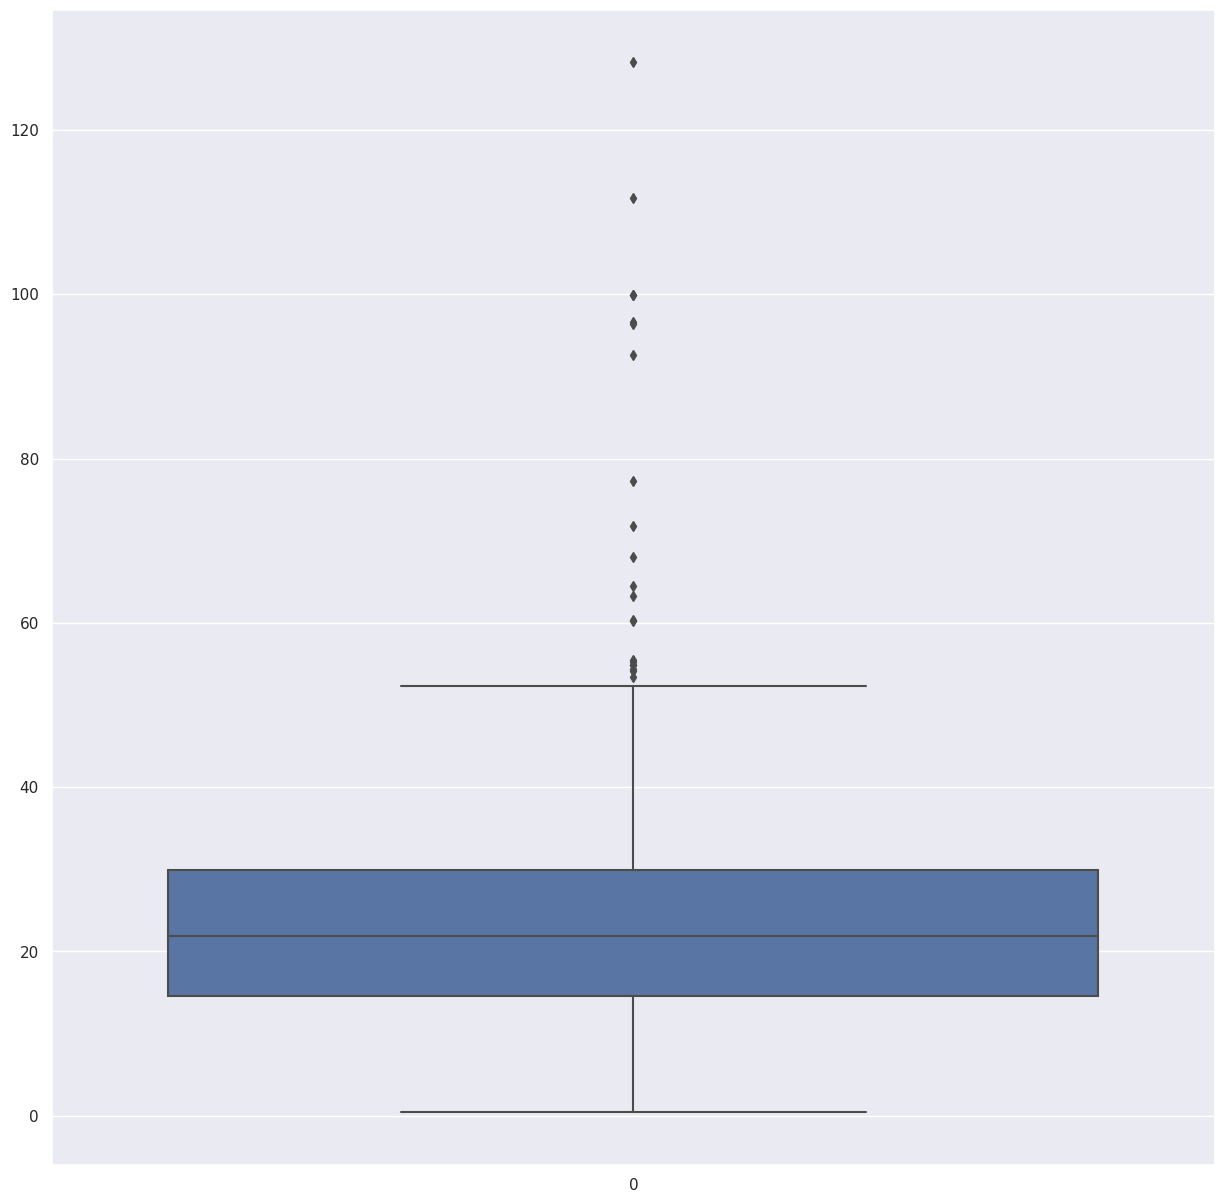

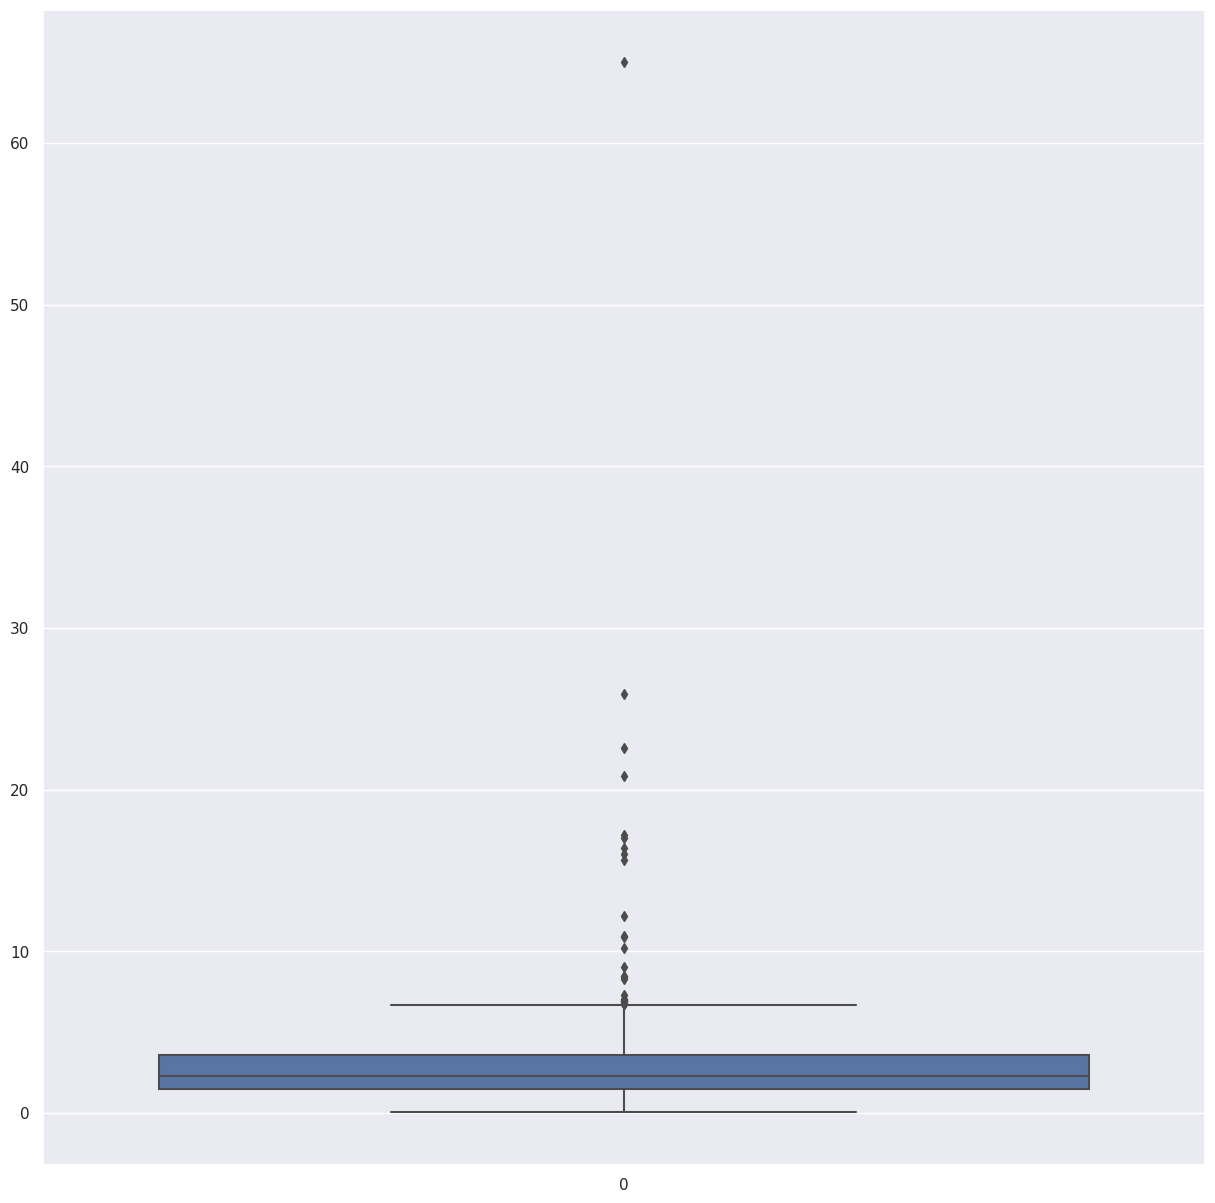

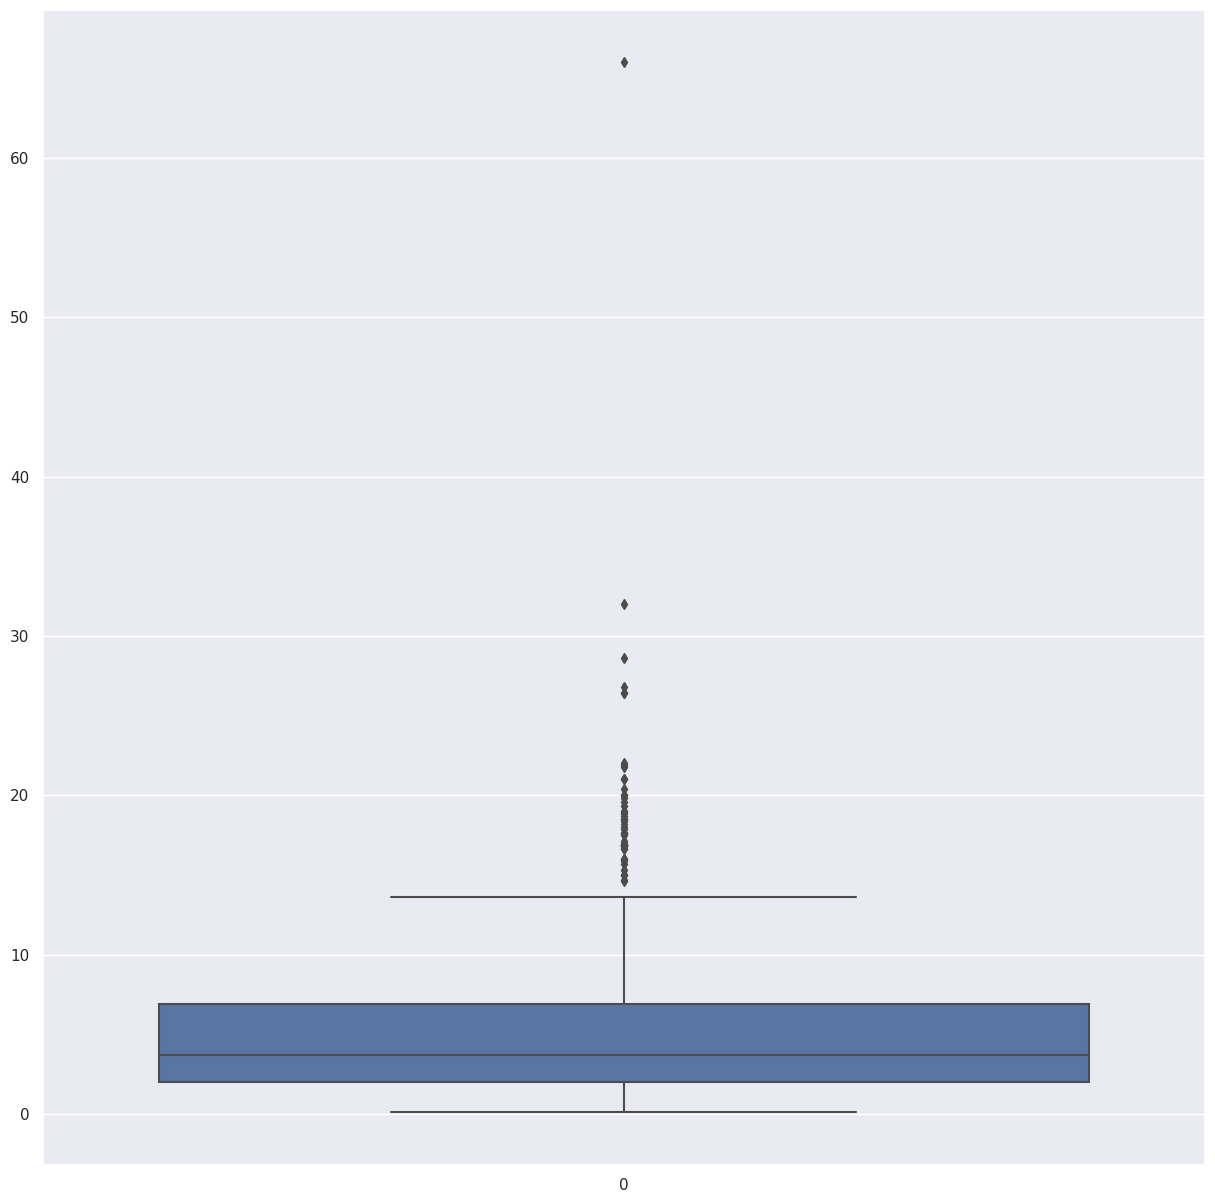

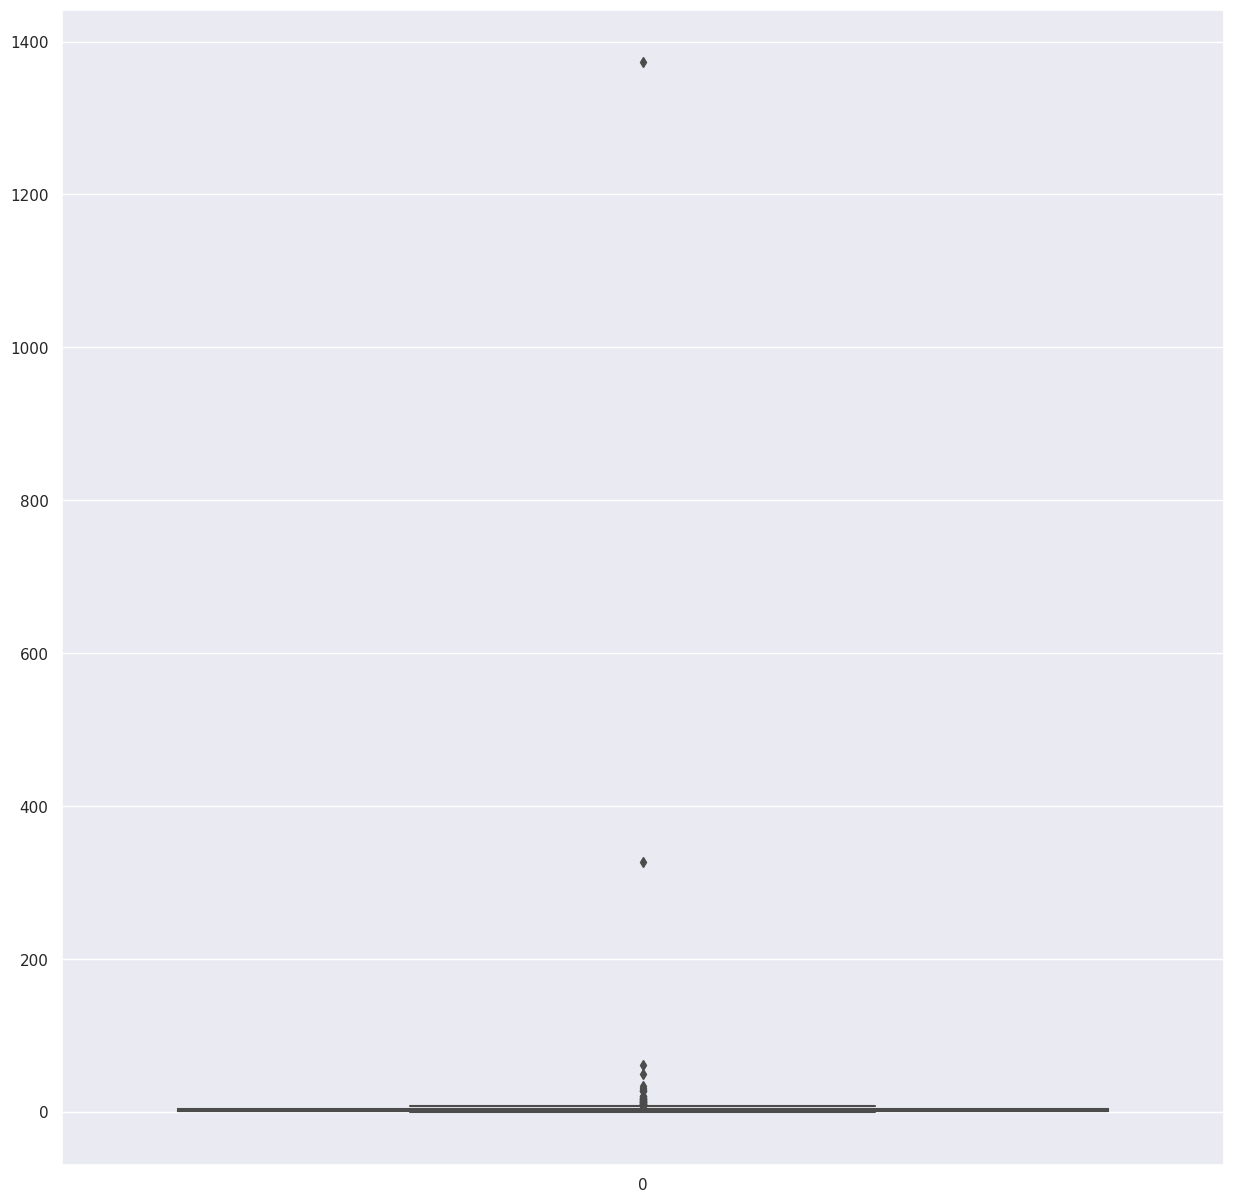

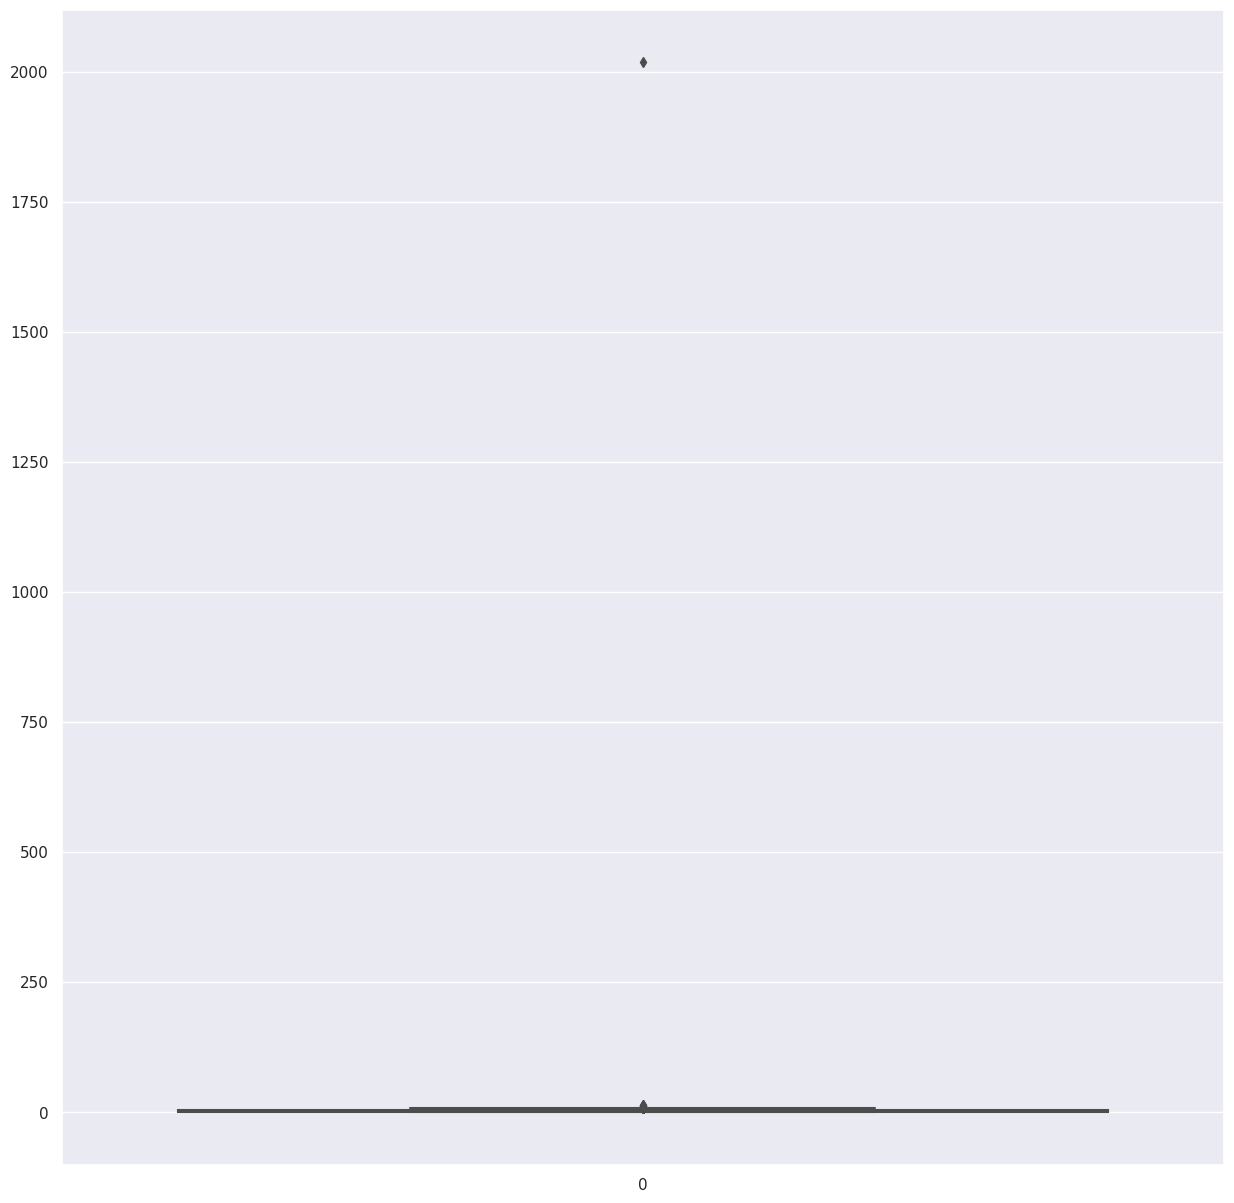

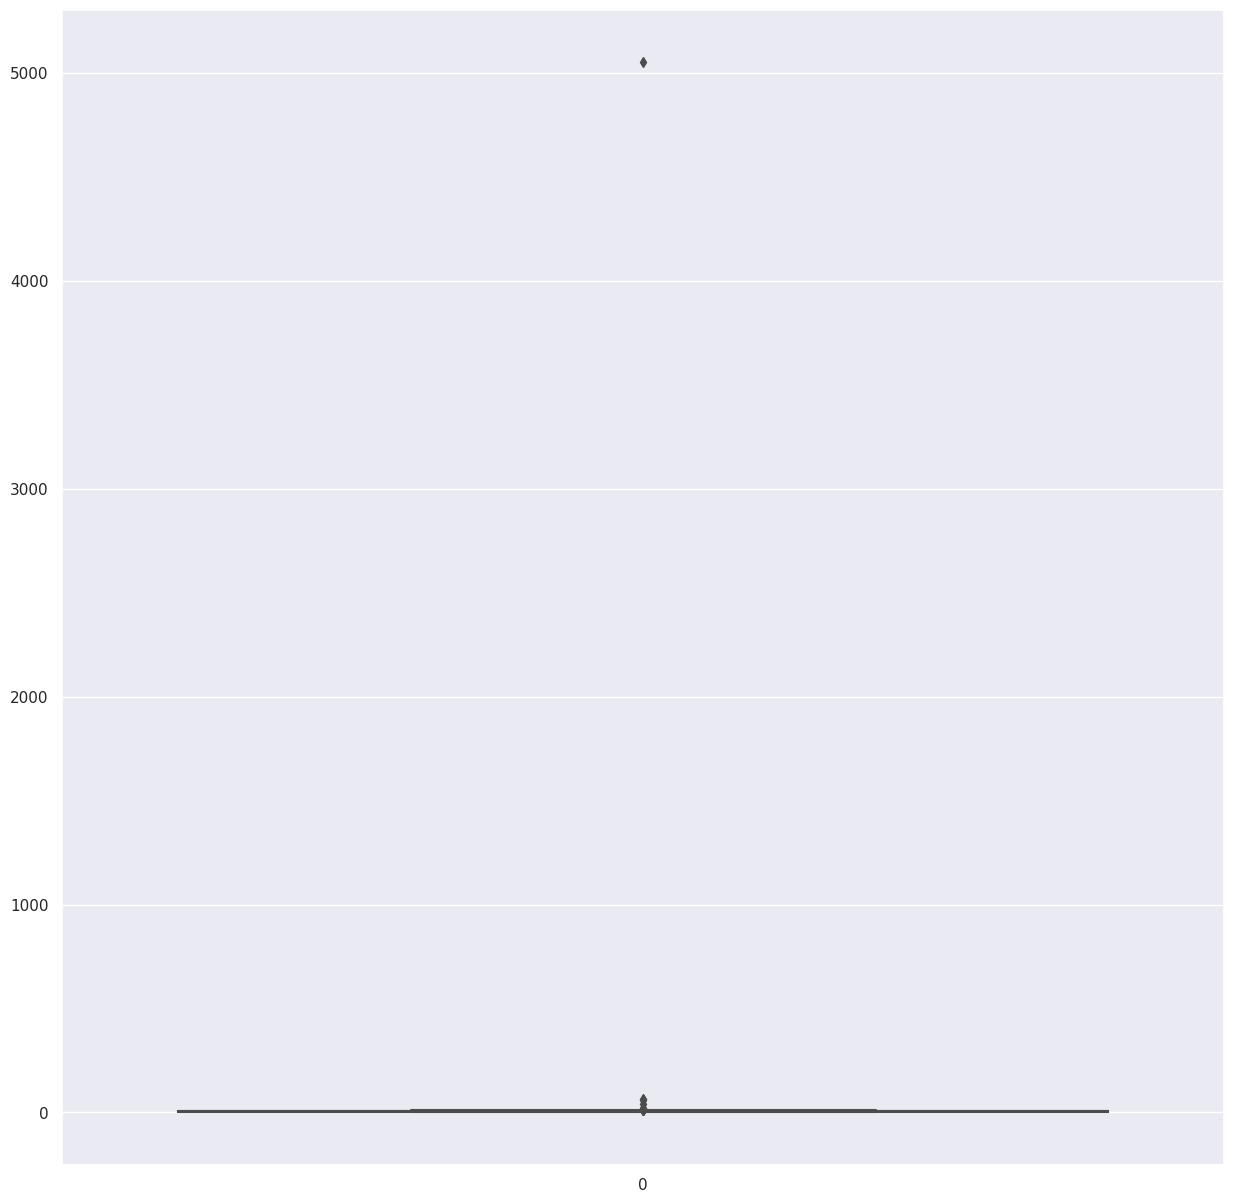

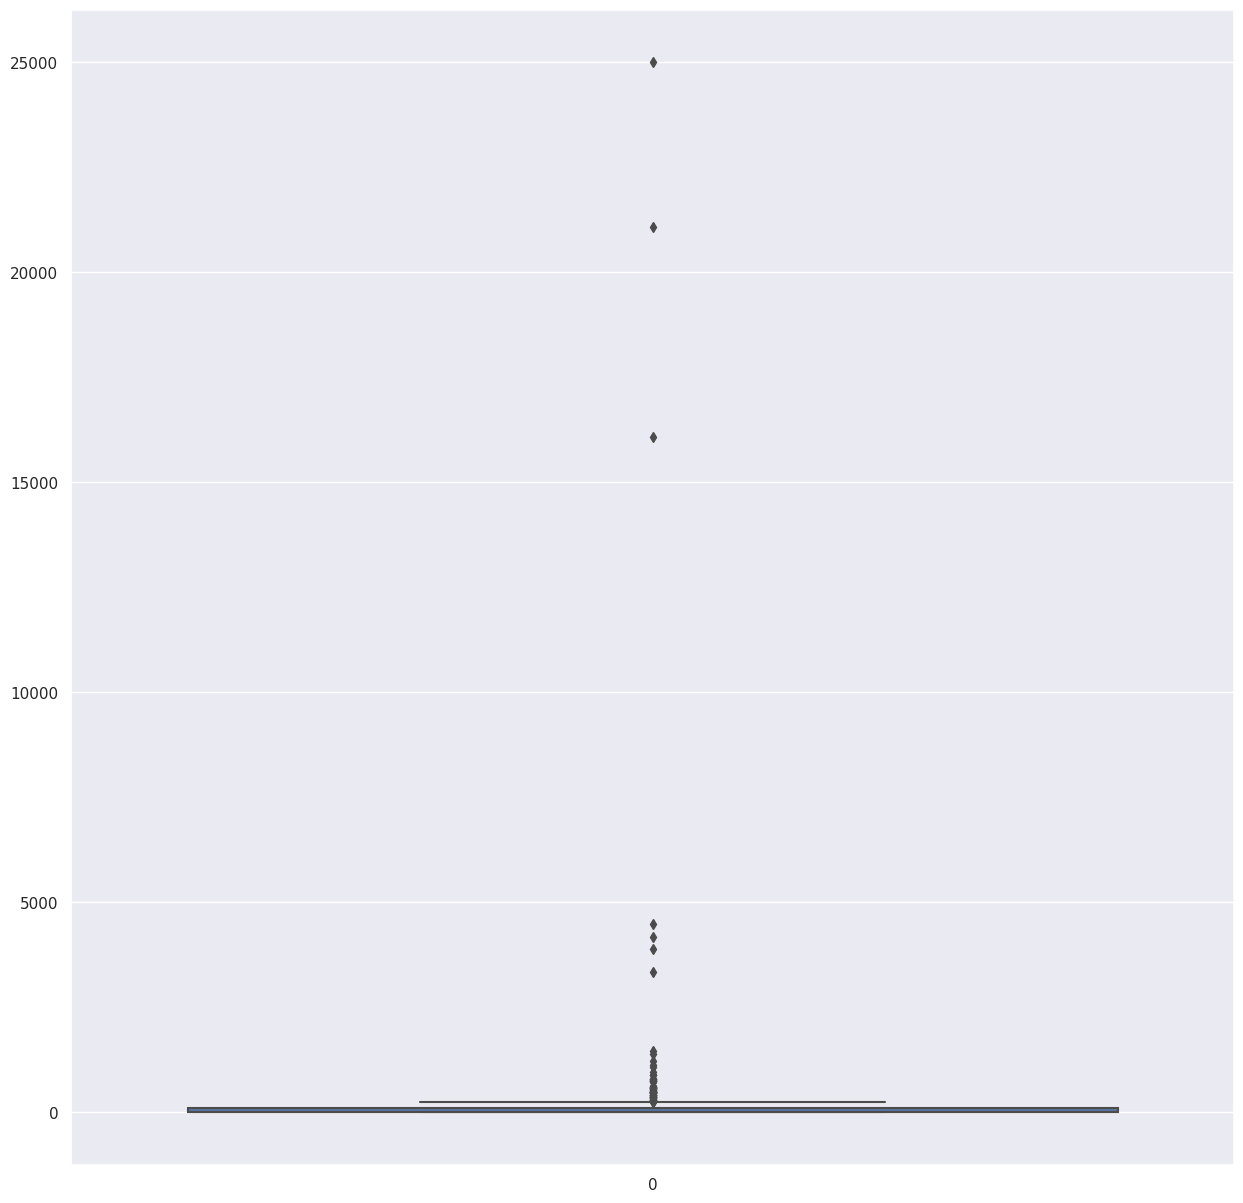

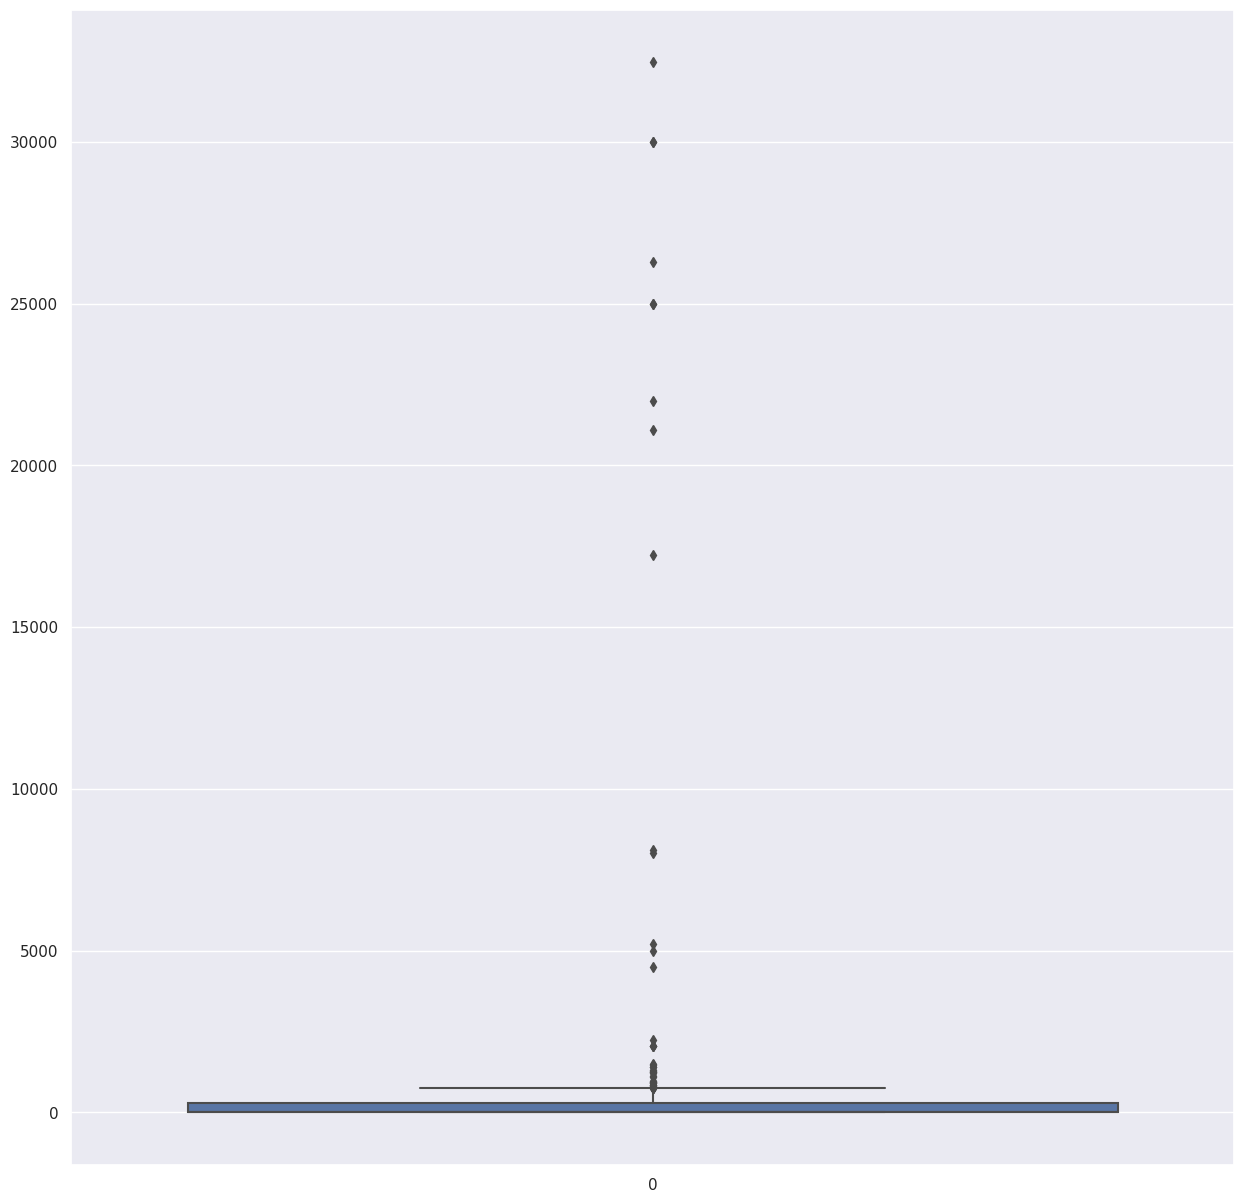

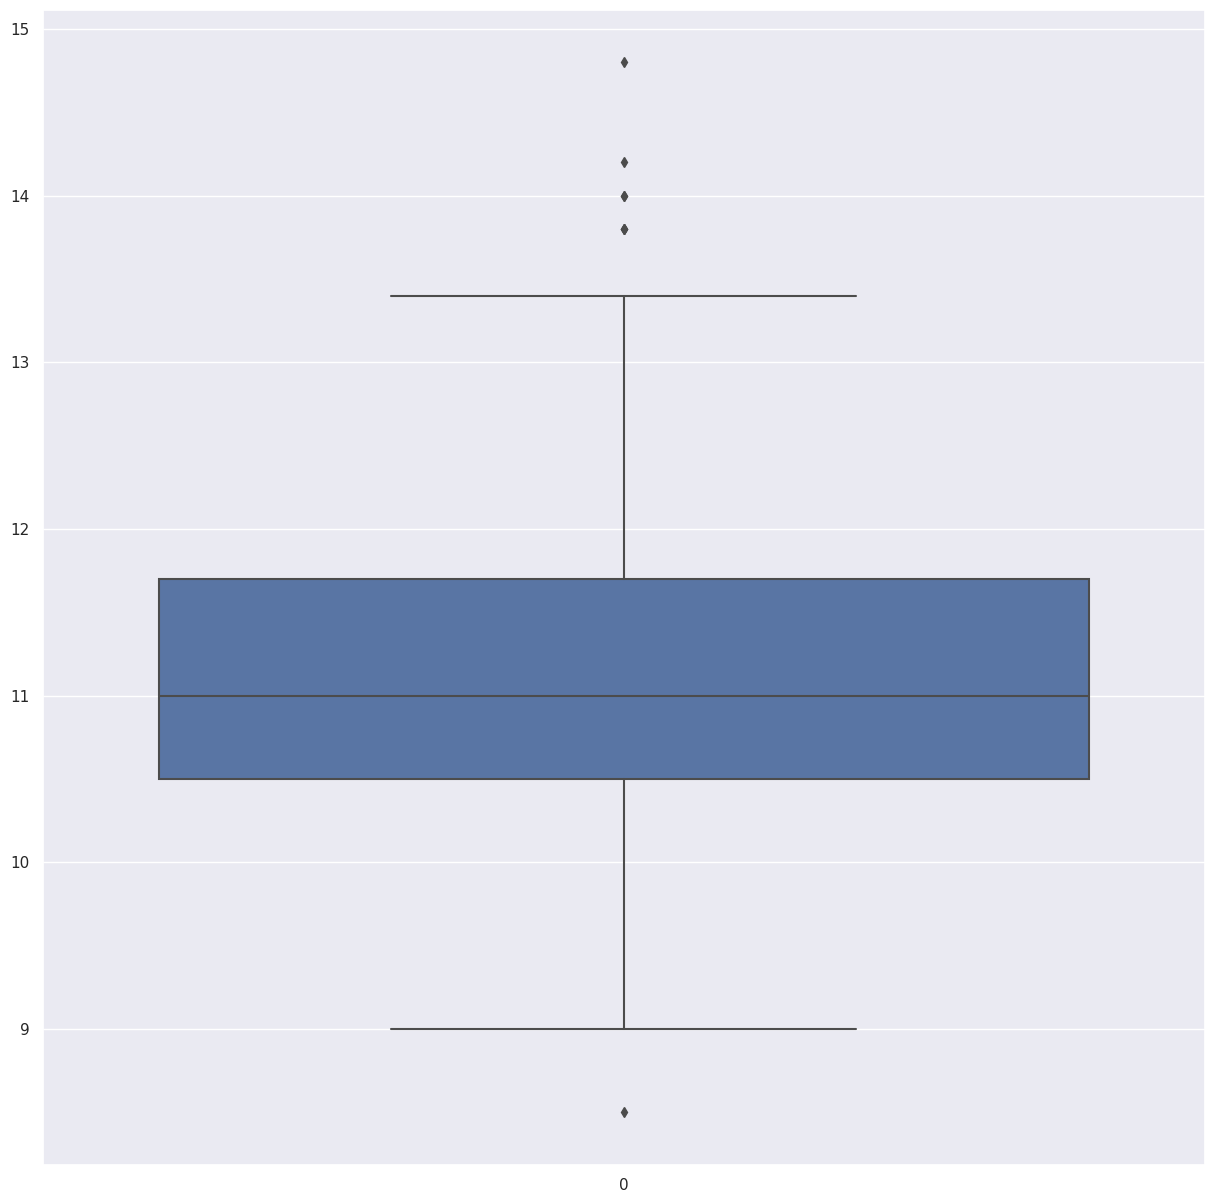

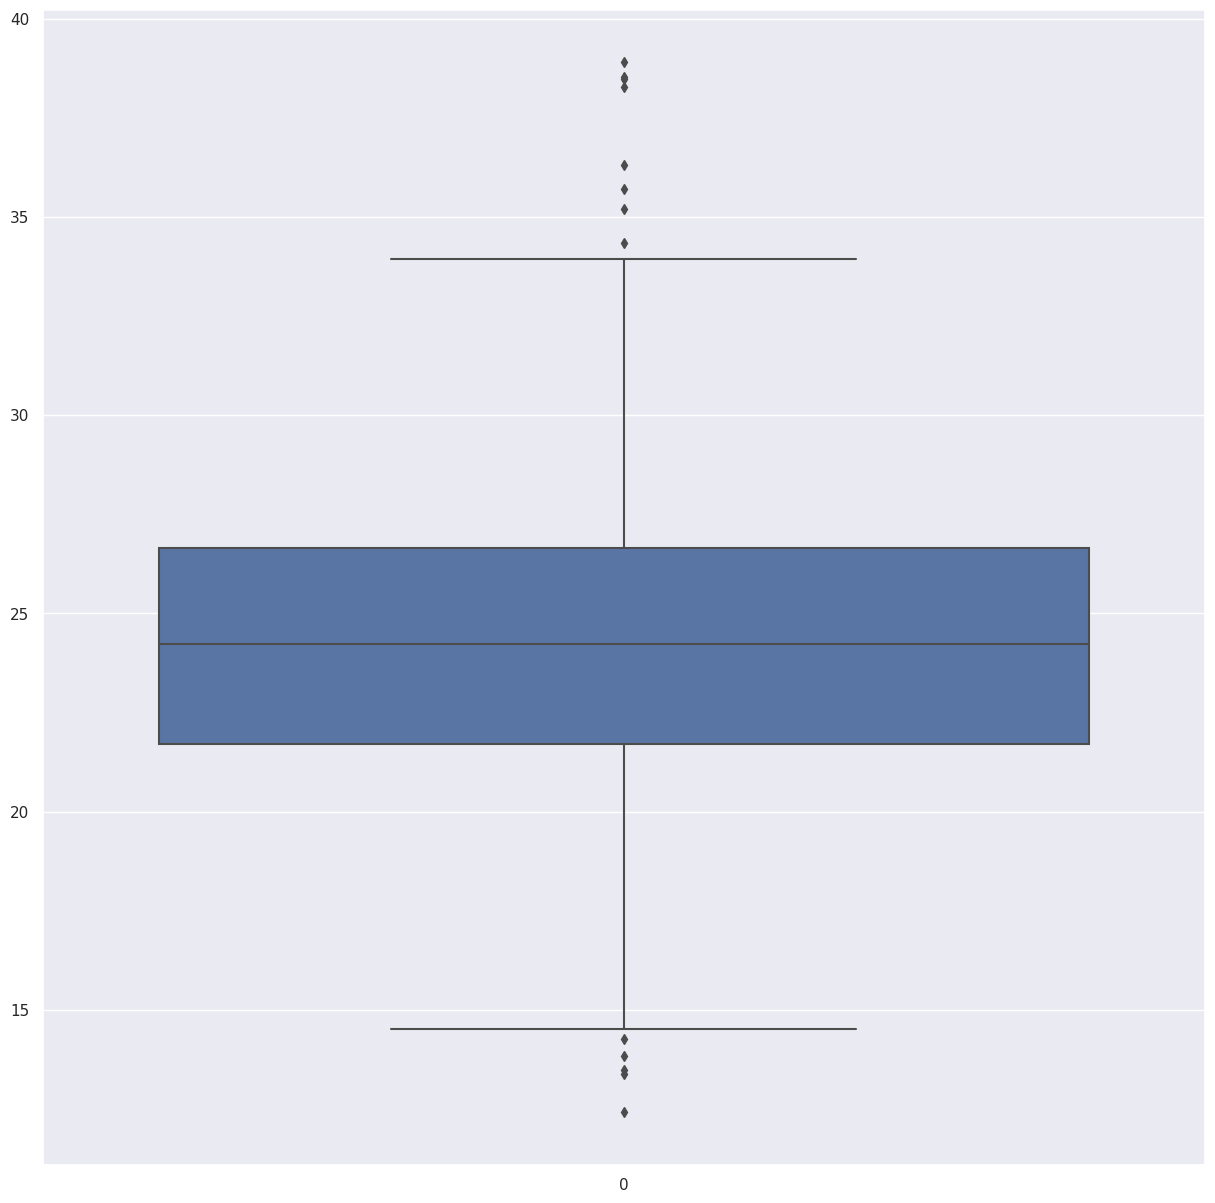

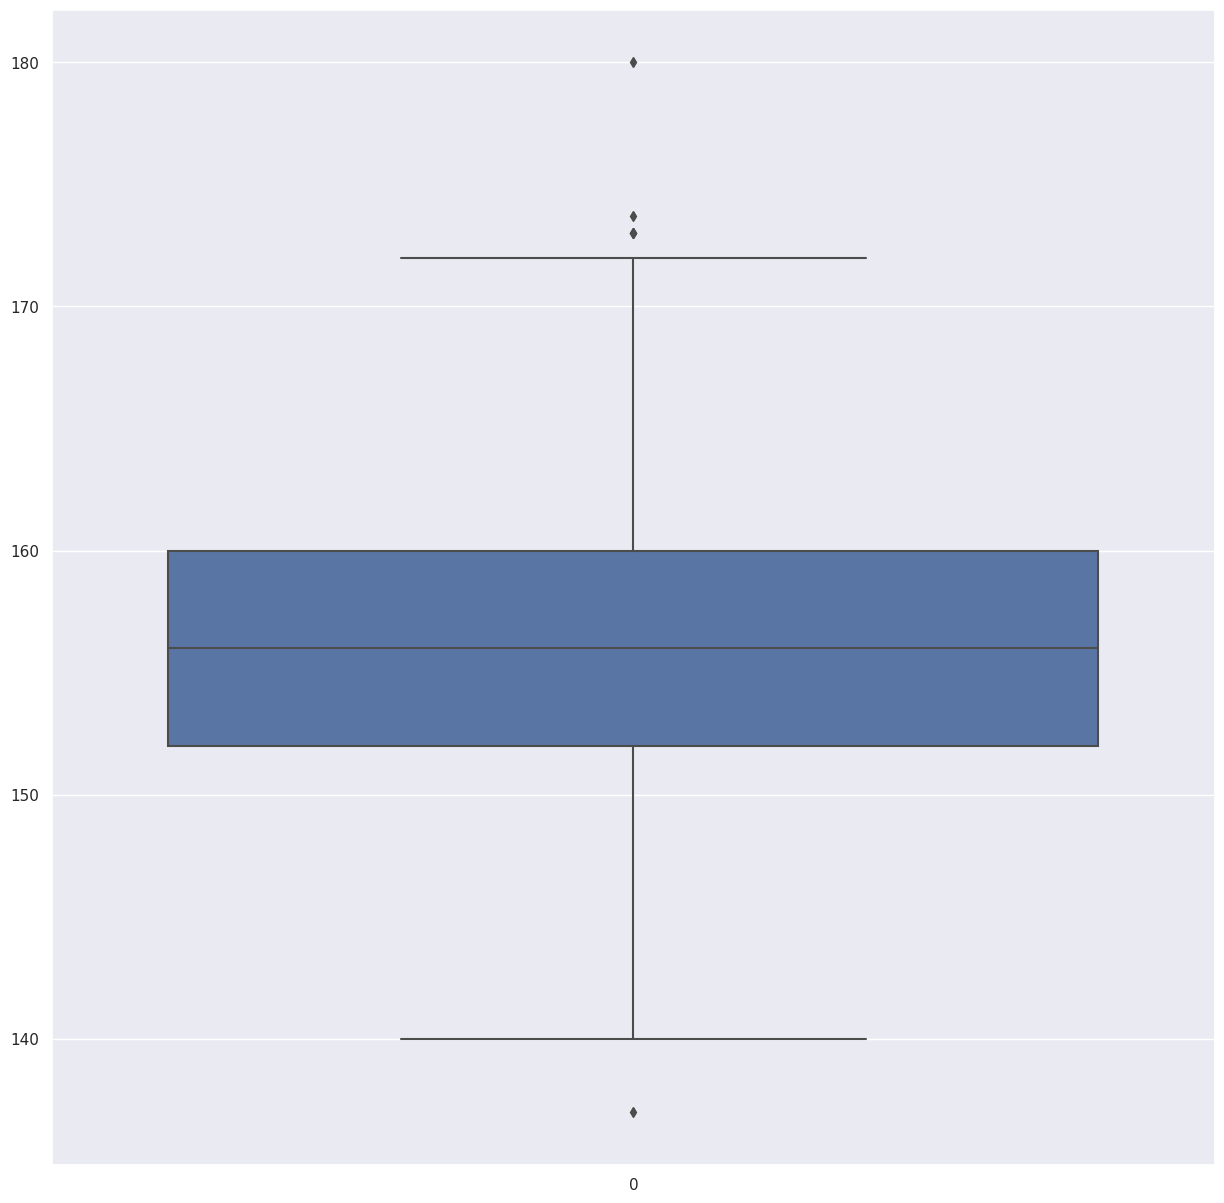

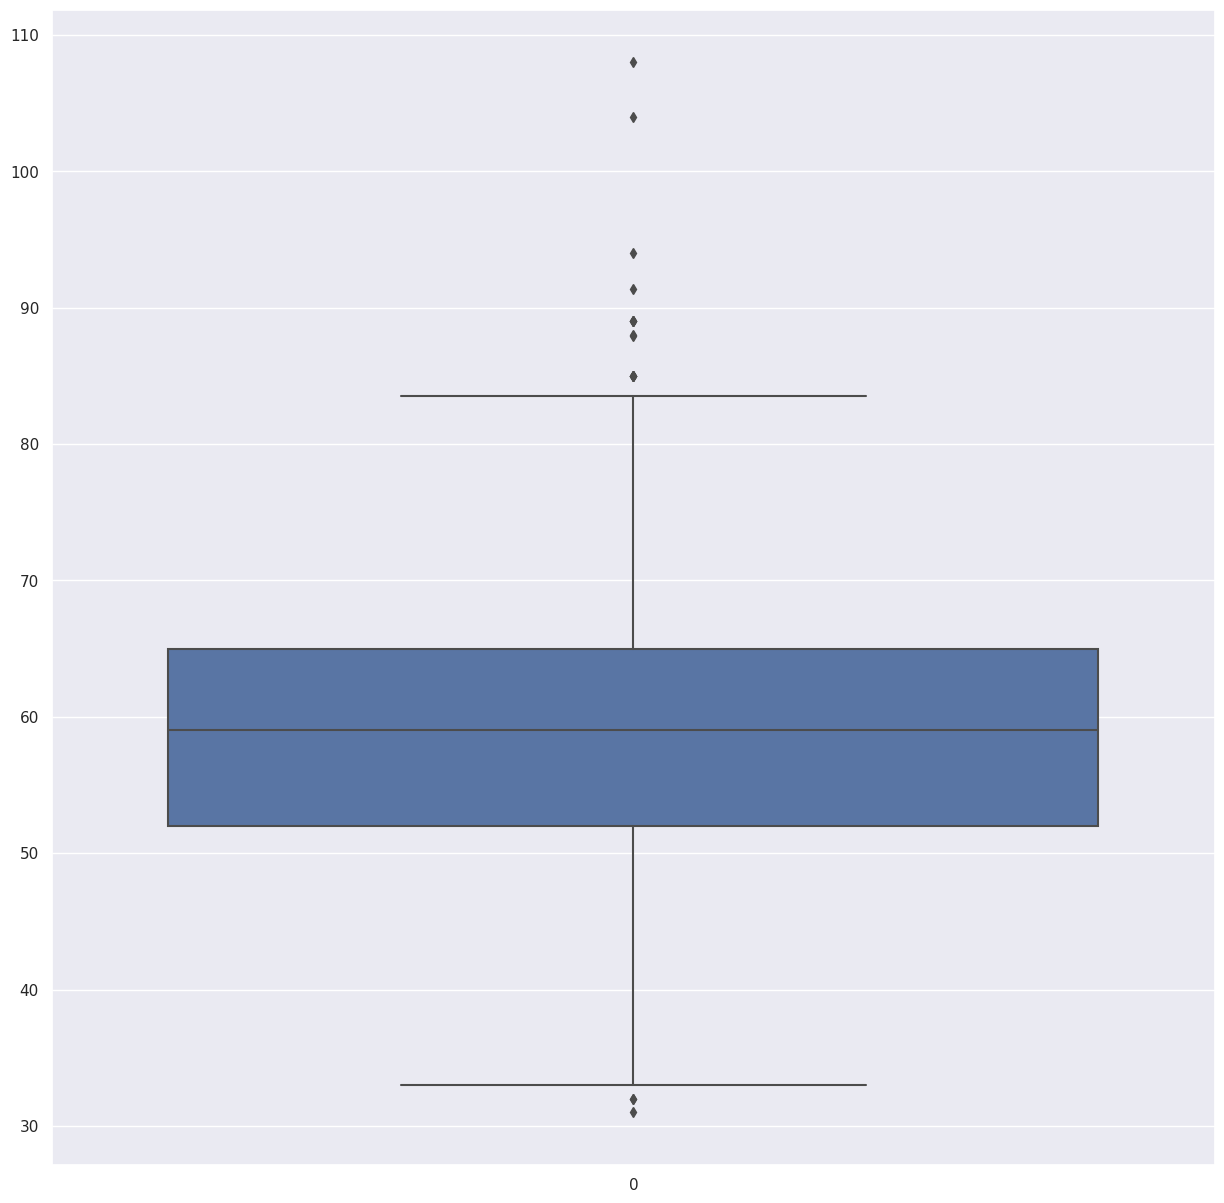

In [ ]:
# box plots
for col in col_with_outliers:
  sns.boxplot(df[col])
  plt.show()

The code is run until all outliers are zeros.
1. replace outliers by None
2. replace all null values by median
3. checking number of outliers after replacement

In [ ]:
removal = True

while removal:
  # replace outliers by None
  for col in col_with_outliers:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    df[col] = df[col].mask(((df[col] < lower_limit) | (df[col] > upper_limit)), np.nan)

  # replace all null values by median
  for col in col_with_outliers:
    df[col] = df[col].fillna(df[col].median())

  # checking number of outliers after replacement
  outliers_in_col = dict()
  for col in col_with_outliers:
    outliers_in_col[col] = count_outliers(col)
  print(outliers_in_col.values())

  # if all(value==0 for value in outliers_in_col.values()):
  removal = False

dict_values([0, 0, 10, 0, 0, 75, 0, 0, 0, 188, 0, 174, 0, 6, 22, 11, 2, 13, 24, 49, 10, 0, 127, 48, 0, 4, 0, 0])


# **Step 3: Feature Engineering**

After the data was preprocessed,
* features selection was performed
* feature scaling was done

## 1. Features Selection

1. heatmap was used to select most important features related to target variable

In [ ]:
# checking important features
print(imp_cols)
print(len(imp_cols))

['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
41


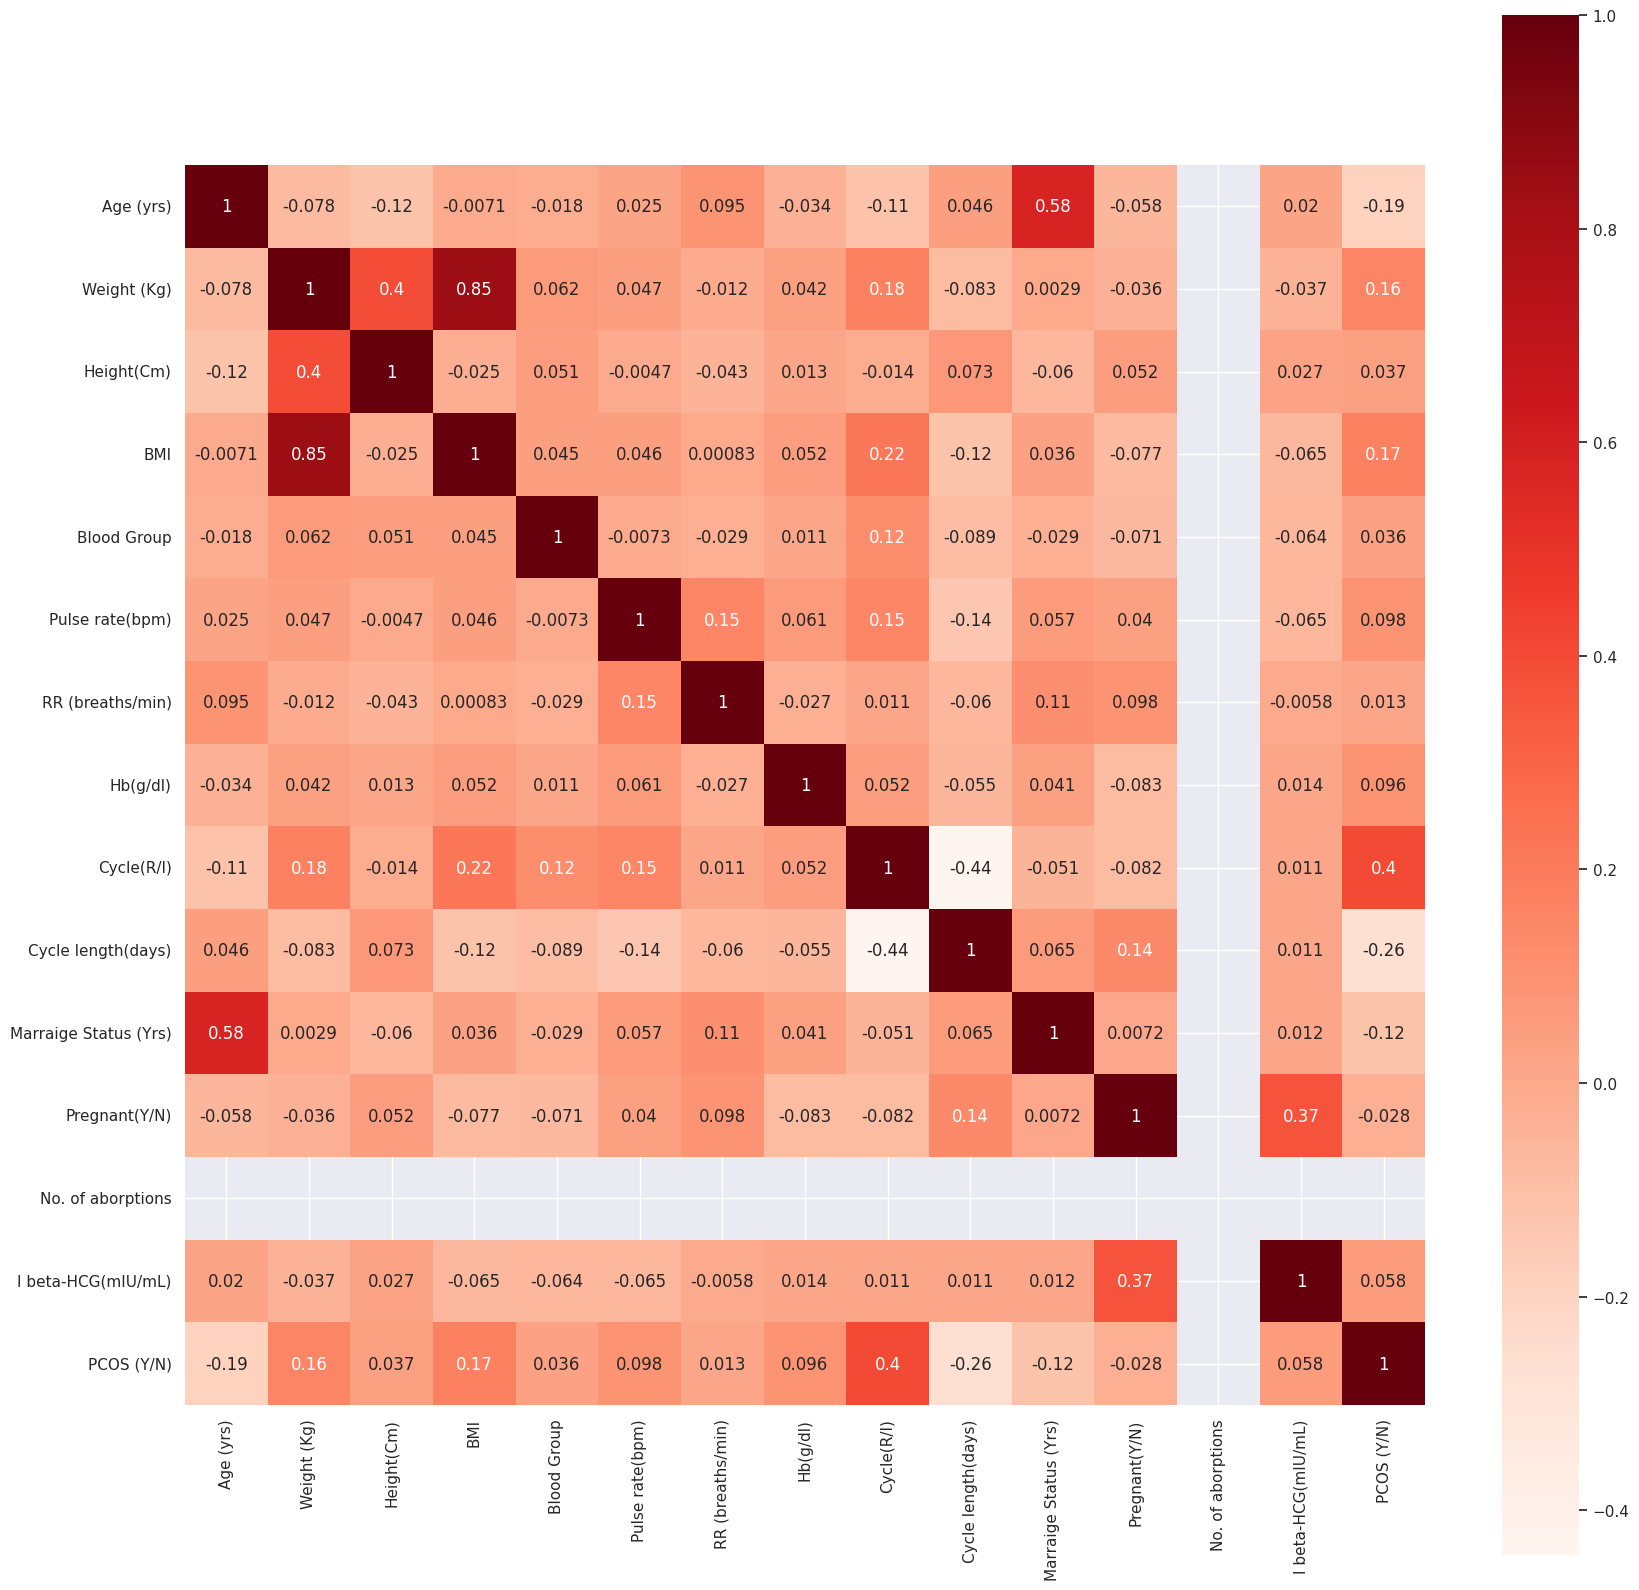

In [ ]:
# heatmap to find correlation with first 14 features
df_corr = df[imp_cols[:14]+output_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, square=True, cmap='Reds')
plt.show()

Features with correlation coefficient with PCOS (Y/N) greater than or equal to 0.3

*   Cycle(R/I) 0.4



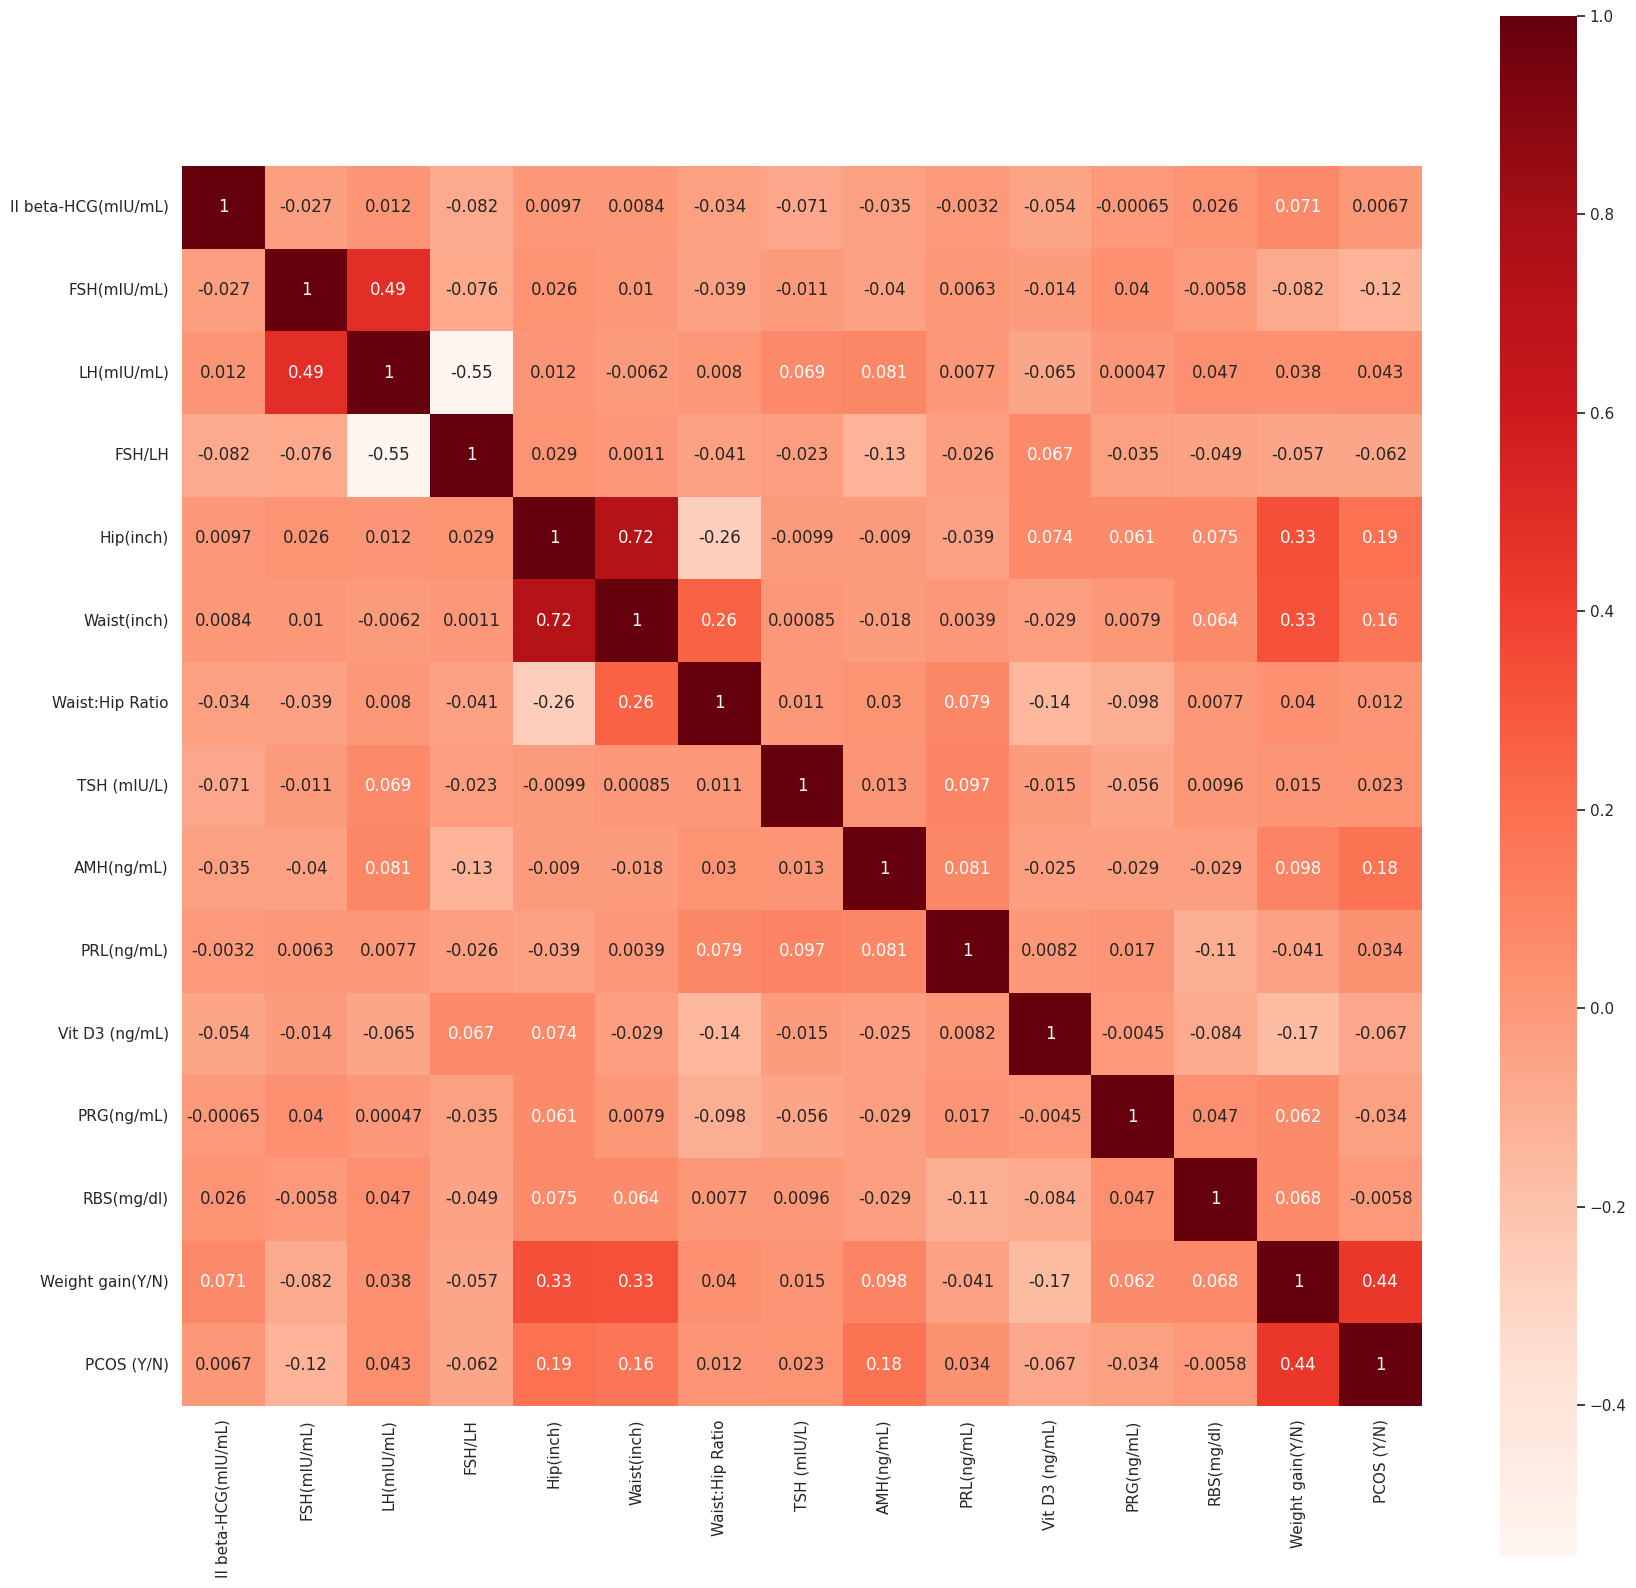

In [ ]:
# heatmap to find correlation with next 14 features
df_corr = df[imp_cols[14:28]+output_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, square=True, cmap='Reds')
plt.show()

Features with correlation coefficient with PCOS (Y/N) greater than or equal to 0.3

*   Weight gain(Y/N) 0.44

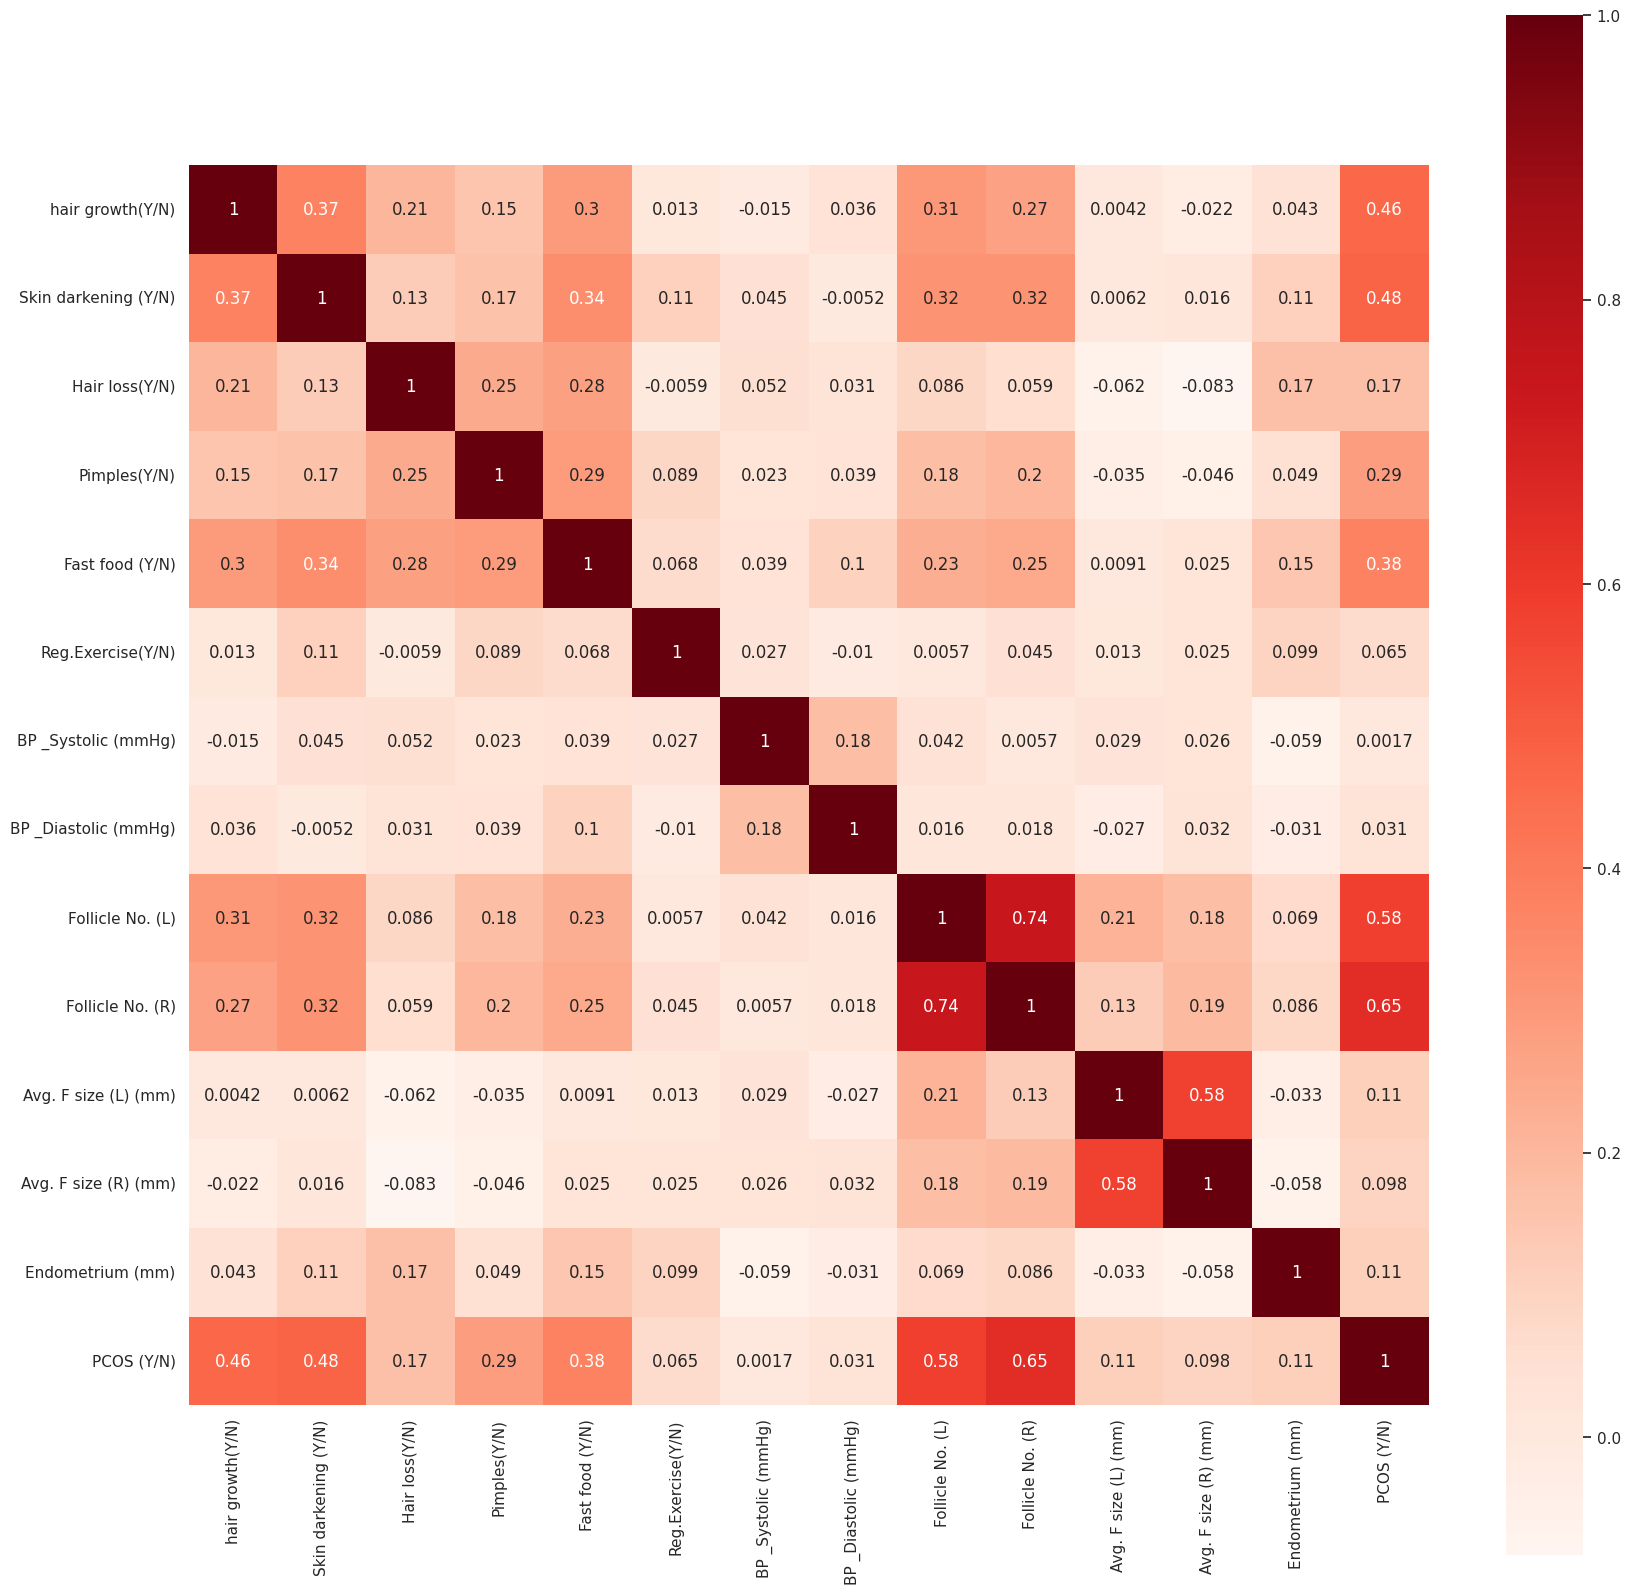

In [ ]:
# heatmap to find correlation with next 14 features
df_corr = df[imp_cols[28:]+output_cols].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, square=True, cmap='Reds')
plt.show()

Features with correlation coefficient with PCOS (Y/N) greater than or equal to 0.3

*   hair growth(Y/N) 0.46
*   Skin darkening (Y/N) 0.48
*   Fast food (Y/N) 0.38
*   Follicle No. (L) 0.55
*   Follicle No. (R) 0.65

In [ ]:
# features and output were selected
features = ['Cycle(R/I)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)']
output = output_cols[0]

## 2. Feature Scaling

1. features with value outside the range of 0 and 1 were found
2. MinMaxScaler was used to limit the values from 0 to 1 so in some formulas, some features have higher magnitude to effect the outcome

In [ ]:
# importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# defining scaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
# scaler of 0 to 1 could be used only to non-binary values
for feature in features:
  print(feature)
  print(df[feature].value_counts())

Cycle(R/I)
2    390
4    150
5      1
Name: Cycle(R/I), dtype: int64
Weight gain(Y/N)
0    337
1    204
Name: Weight gain(Y/N), dtype: int64
hair growth(Y/N)
0    393
1    148
Name: hair growth(Y/N), dtype: int64
Skin darkening (Y/N)
0    375
1    166
Name: Skin darkening (Y/N), dtype: int64
Fast food (Y/N)
1    279
0    262
Name: Fast food (Y/N), dtype: int64
Follicle No. (L)
3.0     61
1.0     59
5.0     58
6.0     54
4.0     53
2.0     42
7.0     38
8.0     35
9.0     27
10.0    26
12.0    23
11.0    17
14.0    13
0.0     10
13.0     9
16.0     6
15.0     6
18.0     4
Name: Follicle No. (L), dtype: int64
Follicle No. (R)
5     57
7     55
2     54
3     49
4     46
1     41
10    40
6     36
12    30
9     29
8     23
11    18
15    13
0     11
14    10
13     7
16     7
20     6
18     5
19     4
Name: Follicle No. (R), dtype: int64


In [ ]:
# Cycle (R/I), Follicle No. (L) and Follicle No. (R) are only taken into consideration
df[['Cycle(R/I)', 'Follicle No. (L)', 'Follicle No. (R)']] = scaler.fit_transform(df[['Cycle(R/I)', 'Follicle No. (L)', 'Follicle No. (R)']])

In [ ]:
# checking all features
df[features].describe()

,Cycle(R/I),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.186691,0.377079,0.273567,0.306839,0.515712,0.330766,0.332070
std,0.300650,0.485104,0.446202,0.461609,0.500216,0.218459,0.221844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.150000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.277778,0.300000
75%,0.666667,1.000000,1.000000,1.000000,1.000000,0.444444,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Step 4: Model Training and Validation**

After features and output were selected,
* train test split was performed
* Logistic regression was used for model training
* validations were performed by confusion matrix and accuracy score

## 1. Train Test Split

1. Train and Test data were separated with stratification

In [ ]:
# train_test_split library
from sklearn.model_selection import train_test_split

In [ ]:
# define X and y
X = df[features]
y = df[output]

In [ ]:
# splitting data after stratification into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## 2. Algorithms

In [ ]:
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# hyperparameter tuning algorithm
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score

## 2.1. Logistic Regression

1. LogisticRegression model was created
2. hyperparameter tuning was performed
3. validation metrics were analyzed

In [ ]:
# model defining
model_log = LogisticRegression(random_state=42)

In [ ]:
# hyperparameter tuning
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 5000]
    }

model_log = GridSearchCV(estimator=model_log, param_grid=param_grid_lr, cv=10)

In [ ]:
# model fitting
model_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
# optimum hyperparameters
print("Best params:")
print(model_log.best_params_)
print("Best score:")
print(model_log.best_score_)

Best params:
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best score:
0.9049786628733998


In [ ]:
# prepare dataset of hyperparameters
df_log = pd.concat([pd.DataFrame(model_log.cv_results_["params"]),pd.DataFrame(model_log.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
df_log = df_log[(df_log['penalty']=='l1') & (df_log['solver']=='liblinear')]
df_log = df_log[['C', 'max_iter', 'Accuracy']]

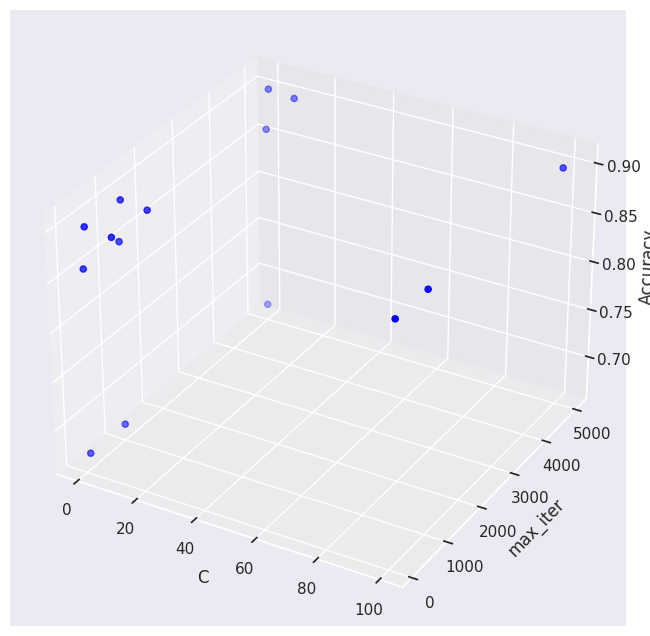

In [ ]:
# scatter plot to show hyperparameter tuning for logistic regression
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(df_log['C'], df_log['max_iter'], df_log['Accuracy'], c="blue")
ax.set_xlabel('C')
ax.set_ylabel('max_iter')
ax.set_zlabel('Accuracy')
plt.show()

In [ ]:
# new model defining and fitting
model_log = LogisticRegression(
    C=model_log.best_params_['C'],
    max_iter=model_log.best_params_['max_iter'],
    penalty=model_log.best_params_['penalty'],
    solver=model_log.best_params_['solver'],
    random_state=42
    )
model_log.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')

In [ ]:
# new model prediction and validation
y_predict_log = model_log.predict(X_test)
print(confusion_matrix(y_test, y_predict_log))
print(accuracy_score(y_test, y_predict_log))

[[105   5]
 [ 11  42]]
0.901840490797546


## 2.2. Support Vector Classifier

1. SVC model was created
2. hyperparameter tuning was performed
3. validation metrics were analyzed

In [ ]:
# model defining
model_svc = SVC(random_state=42)

In [ ]:
# hyperparameter tuning
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'shrinking': [True, False],
    'tol': [1e-4, 1e-3],
    'class_weight': ['balanced', None]
}

model_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid_svc, cv=10)

In [ ]:
# model fitting
model_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False], 'tol': [0.0001, 0.001]})

In [ ]:
# optimum hyperparameters
print("Best params:")
print(model_svc.best_params_)
print("Best score:")
print(model_svc.best_score_)

Best params:
{'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'sigmoid', 'shrinking': True, 'tol': 0.0001}
Best score:
0.9076102418207682


In [ ]:
# prepare dataset of hyperparameters
df_svc = pd.concat([pd.DataFrame(model_svc.cv_results_["params"]),pd.DataFrame(model_svc.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
df_svc = df_svc[(df_svc['class_weight'].isnull()) & (df_svc['gamma']=='auto') & (df_svc['kernel']=='sigmoid') & (df_svc['shrinking']==True)]
df_svc = df_svc[['C', 'tol', 'Accuracy']]

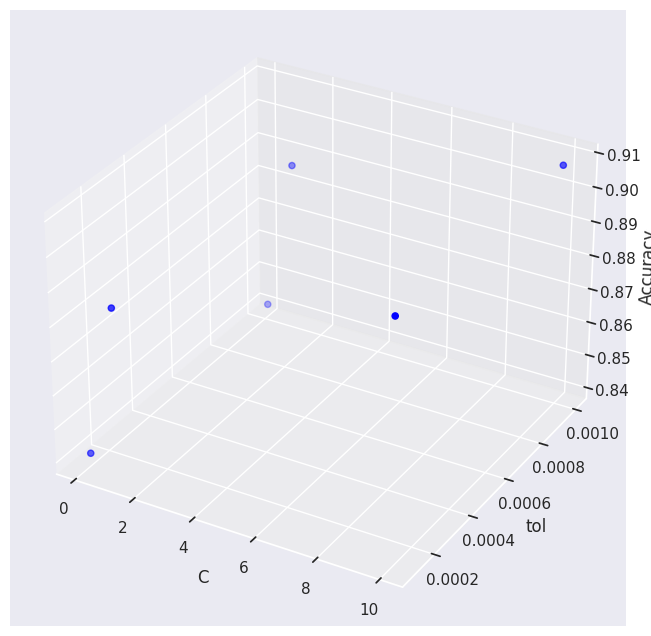

In [ ]:
# scatter plot to show hyperparameter tuning for support vector classifier
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(df_svc['C'], df_svc['tol'], df_svc['Accuracy'], c="blue")
ax.set_xlabel('C')
ax.set_ylabel('tol')
ax.set_zlabel('Accuracy')
plt.show()

In [ ]:
# new model defining and fitting
model_svc = SVC(
    C=model_svc.best_params_['C'],
    kernel=model_svc.best_params_['kernel'],
    gamma=model_svc.best_params_['gamma'],
    shrinking=model_svc.best_params_['shrinking'],
    tol=model_svc.best_params_['tol'],
    class_weight=model_svc.best_params_['class_weight'],
    random_state=42,
)
model_svc.fit(X_train, y_train)

SVC(C=10, gamma='auto', kernel='sigmoid', random_state=42, tol=0.0001)

In [ ]:
# new model prediction and validation
y_predict_svc = model_svc.predict(X_test)
print(confusion_matrix(y_test, y_predict_svc))
print(accuracy_score(y_test, y_predict_svc))

[[104   6]
 [  9  44]]
0.9079754601226994


## 2.3. Random Forest Classifier

1. RandomForestClassifier model was created
2. validation metrics were analyzed
3. 1 and 2 were repeated several times for hyperparameter tuning

In [ ]:
# model defining
model_rfc = RandomForestClassifier(random_state=42)

In [ ]:
# hyperparameter tuning
param_grid_rf = {
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

model_rfc = GridSearchCV(estimator=model_rfc, param_grid=param_grid_rf, cv=10)

In [ ]:
# model fitting
model_rfc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None]})

In [ ]:
# optimum hyperparameters
print("Best params:")
print(model_rfc.best_params_)
print("Best score:")
print(model_rfc.best_score_)

Best params:
{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
Best score:
0.9076813655761024


In [ ]:
# prepare dataset of hyperparameters
df_rfc = pd.concat([pd.DataFrame(model_rfc.cv_results_["params"]),pd.DataFrame(model_rfc.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
df_rfc = df_rfc[(df_rfc['bootstrap']==True) & (df_rfc['criterion']=='gini') & (df_rfc['max_features']=='sqrt')]
df_rfc = df_rfc[['max_depth', 'Accuracy']]
df_rfc['max_depth'].fillna(0, inplace=True)

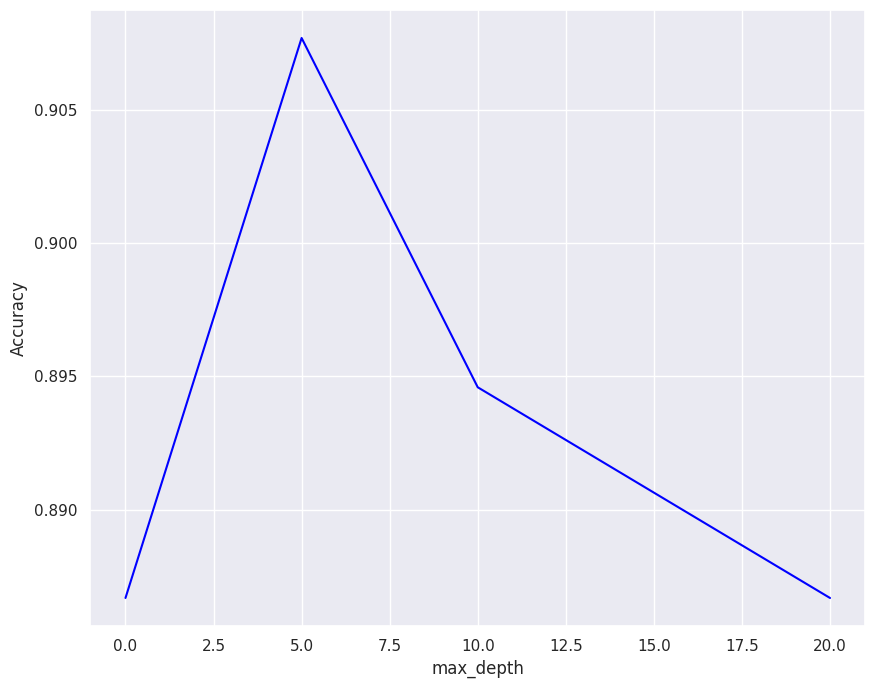

In [ ]:
# scatter plot to show hyperparameter tuning for support vector classifier
plt.figure(figsize=(10, 8))
sns.lineplot(x='max_depth', y='Accuracy', data=df_rfc, c='blue')
plt.show()

In [ ]:
# new model defining and fitting
model_rfc = RandomForestClassifier(
    max_depth=model_rfc.best_params_['max_depth'],
    max_features=model_rfc.best_params_['max_features'],
    bootstrap=model_rfc.best_params_['bootstrap'],
    criterion=model_rfc.best_params_['criterion'],
    random_state=42
)

In [ ]:
# new model defining and fitting
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# new model prediction and validation
y_predict_rfc = model_rfc.predict(X_test)
print(confusion_matrix(y_test, y_predict_rfc))
print(accuracy_score(y_test, y_predict_rfc))

[[104   6]
 [ 12  41]]
0.8895705521472392


In [ ]:
# writing excel sheets
with pd.ExcelWriter("hyperparameter_tuning.xlsx") as writer:

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    df_log.to_excel(writer, sheet_name="Logistic Regression", index=False)
    df_svc.to_excel(writer, sheet_name="Support Vector Classifier", index=False)
    df_rfc.to_excel(writer, sheet_name="Random Forest Classifier", index=False)

## 2.4. Auto ML

After training and testing data was separated,
1. TPOT Classifier was defined
2. Fitting and validation was performed

In [ ]:
# tpot classifier
from tpot import TPOTClassifier

In [ ]:
# defining TPOTClassifier
tpot = TPOTClassifier(generations=10, population_size=50, verbosity=2, scoring="accuracy",  random_state=42)

In [ ]:
# fitting and validation
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9128421052631579

Generation 2 - Current best internal CV score: 0.9128421052631579

Generation 3 - Current best internal CV score: 0.9180350877192982

Generation 4 - Current best internal CV score: 0.9180350877192982

Generation 5 - Current best internal CV score: 0.9180350877192982

Generation 6 - Current best internal CV score: 0.9180701754385966

Generation 7 - Current best internal CV score: 0.9180701754385966

Generation 8 - Current best internal CV score: 0.9180701754385966

Generation 9 - Current best internal CV score: 0.9180701754385966

Generation 10 - Current best internal CV score: 0.9180701754385966

Best pipeline: RandomForestClassifier(GaussianNB(input_matrix), bootstrap=False, criterion=entropy, max_features=0.2, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
0.8834355828220859


# **Step 5: Metrics Evaluation**

Use models created to find scores for
* accuracy
* precision
* recall
* f1 score

Use the model created from TPOTClassifier to evaluate the same.

In [ ]:
# metrics for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 1. Logistic Regression

In [ ]:
# metrics for logistic regression
print("Logistic Regression")
print("----------------------")
print(f"Accuracy score: {accuracy_score(y_test, y_predict_log)}")
print(f"Precision score: {precision_score(y_test, y_predict_log)}")
print(f"Recall score: {recall_score(y_test, y_predict_log)}")
print(f"F1 score: {f1_score(y_test, y_predict_log)}")

Logistic Regression
----------------------
Accuracy score: 0.901840490797546
Precision score: 0.8936170212765957
Recall score: 0.7924528301886793
F1 score: 0.8400000000000001


## 2. Support Vector Classifier

In [ ]:
# metrics for support vector classifier
print("Support Vector Classifier")
print("----------------------")
print(f"Accuracy score: {accuracy_score(y_test, y_predict_svc)}")
print(f"Precision score: {precision_score(y_test, y_predict_svc)}")
print(f"Recall score: {recall_score(y_test, y_predict_svc)}")
print(f"F1 score: {f1_score(y_test, y_predict_svc)}")

Support Vector Classifier
----------------------
Accuracy score: 0.9079754601226994
Precision score: 0.88
Recall score: 0.8301886792452831
F1 score: 0.8543689320388349


## 3. Random Forest Classifier

In [ ]:
# metrics for random forest classifier
print("Random Forest Classifier")
print("----------------------")
print(f"Accuracy score: {accuracy_score(y_test, y_predict_rfc)}")
print(f"Precision score: {precision_score(y_test, y_predict_rfc)}")
print(f"Recall score: {recall_score(y_test, y_predict_rfc)}")
print(f"F1 score: {f1_score(y_test, y_predict_rfc)}")

Random Forest Classifier
----------------------
Accuracy score: 0.8895705521472392
Precision score: 0.8723404255319149
Recall score: 0.7735849056603774
F1 score: 0.8200000000000001


## 4. TPOT Classifier

In [ ]:
# metrics for random forest classifier by tpot classifier
print("TPOT Classifier")
print("----------------------")
print(f"Accuracy score: {accuracy_score(y_test, tpot.predict(X_test))}")
print(f"Precision score: {precision_score(y_test, tpot.predict(X_test))}")
print(f"Recall score: {recall_score(y_test, tpot.predict(X_test))}")
print(f"F1 score: {f1_score(y_test, tpot.predict(X_test))}")

TPOT Classifier
----------------------
Accuracy score: 0.8834355828220859
Precision score: 0.925
Recall score: 0.6981132075471698
F1 score: 0.7956989247311829


# **Step 6: Model Saving and Loading**

- Save different models.
- Load different models for testing.

In [ ]:
# pickle library
import pickle

In [ ]:
# defining for saving model
def save_model(filename, model):
  pickle.dump(model, open(f"models/{filename}.sav", 'wb'))

# calling to save models
save_model("log_model", model_log)
save_model("svc_model", model_svc)
save_model("rfc_model", model_rfc)
save_model("tpot_model", tpot.fitted_pipeline_)

In [ ]:
# define load model
def load_model(filename):
  return pickle.load(open(f"models/{filename}.sav", "rb"))

# calling to load models
log_lm = load_model("log_model")
svc_lm = load_model("svc_model")
rfc_lm = load_model("rfc_model")
tpot_lm = load_model("tpot_model")

# predict using models
print("Accuracy Scores of 4 Models")
print(accuracy_score(y_test, log_lm.predict(X_test)), accuracy_score(y_test, svc_lm.predict(X_test)), accuracy_score(y_test, rfc_lm.predict(X_test)), accuracy_score(y_test, tpot_lm.predict(X_test)))

Accuracy Scores of 4 Models
0.901840490797546 0.9079754601226994 0.8895705521472392 0.8834355828220859


# **Step 7: Discussion and Conclusion**

After the process of collection, preprocessing, model training and validation using through sklearn library, the acceptable accuracy scores from cross validation was determined from Logistic Regression, Support Vector Classifier and Random Forest Classifier.

| Algorithm | Best Score | Accuracy | Precision | Recall | F1 score |
| -------- | -------- | -------- | -------- | -------- | -------- |
| Logistic Regression | 90.50% | 90.18% | 89.36% | 79.24% | 84.00% |
| Support Vector Classifier | 90.76% | 90.80% | 88.00% | 83.02% | 85.44% |
| Random Forest Classifier | 90.77% | 88.96% | 87.23% | 77.36% | 82.00% |
| TPOT Classifier | - | 88.34% | 92.50% | 69.81% | 79.57% |

- According to best scores, Random Forest Classifier was best choice.
- According to accuracy scores, Support Vector Classifier was best choice.
- According to TPOT Classifier, Random Forest Classifier with GaussianNB was best choice

***RandomForestClassifier(GaussianNB(input_matrix), bootstrap=False, criterion=entropy, max_features=0.2, min_samples_leaf=3, min_samples_split=6, n_estimators=100)***

However, the project encountered some limitations:
* standard procedure of finding data type and levels of measurement through data exploration hadn't been done
* outliers replacement was simply performed by median which was attempted multiple times until no outlier existed

## References

*   Polycystic Ovary Syndrome (PCOS). (2023). Default. https://www.wkhs.com/health-resources/wk-health-library/disease-condition-information/gynecology/polycystic-ovary-syndrome-%28pcos%29

*   Polycystic ovary syndrome (PCOS). (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos

*   Mayo Clinic. (2022, September 8). Polycystic ovary syndrome (PCOS) - Symptoms and causes. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/pcos/symptoms-causes/syc-20353439

*  “What Is Positive & Negative Correlation?” Www.tastylive.com. www.tastylive.com/concepts-strategies/correlation

*  Measures of central tendency | Australian Bureau of Statistics. (2023, February 2). Www.abs.gov.au. https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/measures-central-tendency#:~:text=The%20median%20is%20less%20affected

*  “Sklearn.linear_model.Logisticregression.” Scikit, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html.

*  Sklearn.svm.SVC. scikit. (n.d.). Retrieved March 17, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

*  sklearn.ensemble.RandomForestClassifier. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

*  “Save and Load Machine Learning Models in Python with Scikit-Learn.” Machine Learning Mastery, 7 June 2016, https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/.